#Prologue

Ethereum is a decentralized blockchain platform that enables the creation of smart contracts and decentralized applications (DApps). It has its own native cryptocurrency called Ether (ETH) that serves as the primary means of payment and settlement on the Ethereum network.

ERC20 is a technical standard for creating and issuing tokens on the Ethereum blockchain. ERC20 tokens are fungible, meaning that they are interchangeable and have the same value as one another. Many initial coin offerings (ICOs) and token sales have been launched using the ERC20 standard.

Both Ethereum and ERC20 tokens can be involved in various types of fraud, including:
* Fake ICOs: Scammers may create fraudulent ICOs, offering investors the opportunity to purchase new ERC20 tokens at a discounted price or in exchange for Ether, but then take the investors' money and disappear.
* Pump and dump schemes: Fraudsters may artificially inflate the price of an ERC20 token by promoting it heavily on social media or other channels, then sell their holdings at a profit before the price collapses.
* Token theft: Hackers may steal ERC20 tokens from users' wallets or from exchanges that hold the tokens.
* Smart contract vulnerabilities: Smart contracts on the Ethereum network can be vulnerable to bugs or flaws that allow hackers to exploit them and steal Ether or ERC20 tokens.

The purpose of this study is to perform Ether (ETH) fraud detection and analyze transactional data. By examining the patterns and characteristics of the data, we aim to determine whether or not fraudulent activity has occurred. Through this analysis, we also hope to gain insights into the nature of the transactions and identify any trends or anomalies that may be present. By combining statistical and machine learning techniques, we aim to develop an effective and accurate method for detecting fraudulent transactions and improving overall security in the financial system.







#Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

from sklearn import preprocessing
from sklearn.impute import SimpleImputer

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import collections

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import cross_val_score
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score, recall_score, precision_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

#Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load datasets
df = pd.read_csv('/content/drive/MyDrive/transaction_dataset.csv')

#Dataset Information

This study utilized 1 dataset licensed by Open Database, which contains detailed Ether (ETH) transactions information.

In [4]:
df.head()

Unnamed: 0  Index                                     Address  FLAG  \
0           0      1  0x00009277775ac7d0d59eaad8fee3d10ac6c805e8     0   
1           1      2  0x0002b44ddb1476db43c868bd494422ee4c136fed     0   
2           2      3  0x0002bda54cb772d040f779e88eb453cac0daa244     0   
3           3      4  0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e     0   
4           4      5  0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89     0   

   Avg min between sent tnx  Avg min between received tnx  \
0                    844.26                       1093.71   
1                  12709.07                       2958.44   
2                 246194.54                       2434.02   
3                  10219.60                      15785.09   
4                     36.61                      10707.77   

   Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                704785.63       721            89   
1                               1218216.73        94             8   
2                                516729.30         2            10   
3                                397555.90        25             9   
4                                382472.42      4598            20   

   Number of Created Contracts  ...   ERC20 min val sent   ERC20 max val sent  \
0                            0  ...             0.000000         1.683100e+07   
1                            0  ...             2.260809         2.260809e+00   
2                            0  ...             0.000000         0.000000e+00   
3                            0  ...           100.000000         9.029231e+03   
4                            1  ...             0.000000         4.500000e+04   

    ERC20 avg val sent   ERC20 min val sent contract  \
0        271779.920000                           0.0   
1             2.260809                           0.0   
2             0.000000                           0.0   
3          3804.076893                           0.0   
4         13726.659220                           0.0   

    ERC20 max val sent contract   ERC20 avg val sent contract  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

    ERC20 uniq sent token name   ERC20 uniq rec token name  \
0                         39.0                        57.0   
1                          1.0                         7.0   
2                          0.0                         8.0   
3                          1.0                        11.0   
4                          6.0                        27.0   

    ERC20 most sent token type   ERC20_most_rec_token_type  
0                    Cofoundit                   Numeraire  
1               Livepeer Token              Livepeer Token  
2                         None                       XENON  
3                       Raiden                       XENON  
4                StatusNetwork                         EOS  

[5 rows x 51 columns]

In [5]:
# See information (type of the dataset)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

In [6]:
# See the object columns exist
for col in df.columns:
    if df[col].dtypes == 'object':
        print(col)

Address
 ERC20 most sent token type
 ERC20_most_rec_token_type


In [7]:
# See the amount of the unique each rows (including NaN)
for col in df:
  print(f'{col}: {len(df[col].unique())}')

Unnamed: 0: 9841
Index: 4729
Address: 9816
FLAG: 2
Avg min between sent tnx: 5013
Avg min between received tnx: 6223
Time Diff between first and last (Mins): 7810
Sent tnx: 641
Received Tnx: 727
Number of Created Contracts: 20
Unique Received From Addresses: 256
Unique Sent To Addresses: 258
min value received: 4589
max value received : 6302
avg val received: 6767
min val sent: 4719
max val sent: 6647
avg val sent: 5854
min value sent to contract: 3
max val sent to contract: 4
avg value sent to contract: 4
total transactions (including tnx to create contract: 897
total Ether sent: 5868
total ether received: 6728
total ether sent contracts: 4
total ether balance: 5717
 Total ERC20 tnxs: 301
 ERC20 total Ether received: 3461
 ERC20 total ether sent: 1416
 ERC20 total Ether sent contract: 30
 ERC20 uniq sent addr: 108
 ERC20 uniq rec addr: 148
 ERC20 uniq sent addr.1: 5
 ERC20 uniq rec contract addr: 124
 ERC20 avg time between sent tnx: 2
 ERC20 avg time between rec tnx: 2
 ERC20 avg tim

In [8]:
# See the spelling of each column name
df.columns

Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 

In [9]:
for column in df.columns:
    print('='*20, column, '='*20)
    print(df[column].value_counts())
    print()

==================== Unnamed: 0 ====================
0       1
6564    1
6557    1
6558    1
6559    1
       ..
3281    1
3282    1
3283    1
3284    1
9840    1
Name: Unnamed: 0, Length: 9841, dtype: int64

==================== Index ====================
1       3
1458    3
1452    3
1453    3
1454    3
       ..
3527    1
3526    1
3525    1
3524    1
4729    1
Name: Index, Length: 4729, dtype: int64

==================== Address ====================
0x4cd526aa2db72eb1fd557b37c6b0394acd35b212    2
0x4cd3bb2110eda1805dc63abc1959a5ee2d386e9f    2
0x4c1da8781f6ca312bc11217b3f61e5dfdf428de1    2
0x4c24af967901ec87a6644eb1ef42b680f58e67f5    2
0x4c268c7b1d51b369153d6f1f28c61b15f0e17746    2
                                             ..
0x57b417366e5681ad493a03492d9b61ecd0d3d247    1
0x57bb2d6426fed243c633d0b16d4297d12bc20638    1
0x57c0cf70020f0af5073c24cb272e93e7529c6a40    1
0x57ccf2b7ffe5e4497a7e04ac174646f5f16e24ce    1
0xd624d046edbdef805c5e4140dce5fb5ec1b39a3c    1
Name: Address,

#Data Preprocessing

##Data Cleaning

###Fixing column names

In [10]:
# Fix column names that still have spaces at the beginning of the name of the each columms and change with the correct writing
df.columns = [i.strip() for i in list(df.columns)]
df.rename(columns={'total transactions (including tnx to create contract': 'total transactions (including tnx to create contract)'}, inplace=True)

###The same columns definition

After exploring what was in the dataset, we found the same column with different values in several rows.

In [11]:
# Check if the two columns have the same values
print((df['ERC20 uniq sent addr'] == df['ERC20 uniq sent addr.1']).value_counts())

True     7439
False    2402
dtype: int64


In [12]:
# Show rows where the values in the two columns are different
df[df['ERC20 uniq sent addr'] != df['ERC20 uniq sent addr.1']]

Unnamed: 0  Index                                     Address  FLAG  \
0              0      1  0x00009277775ac7d0d59eaad8fee3d10ac6c805e8     0   
1              1      2  0x0002b44ddb1476db43c868bd494422ee4c136fed     0   
3              3      4  0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e     0   
4              4      5  0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89     0   
14            14     15  0x001cf9871aeaf2acf72f144b16818b7e417b6dda     0   
...          ...    ...                                         ...   ...   
9831        9831   2170  0xfe9b7db8d9d57e9ad9341bcf51b110ba5d27b48b     1   
9833        9833   2172  0xff0e20e3a7575d823302bbb27e233c23f2c3070b     1   
9834        9834   2173  0xff2f6c6fbd71a078f1c1781855467d30897b5a33     1   
9835        9835   2174  0xff35866acb80ce4b169d1460cd48108955c1c445     1   
9839        9839   2178  0xffde23396d57e10abf58bd929bb1e856c7718218     1   

      Avg min between sent tnx  Avg min between received tnx  \
0                       844.26                       1093.71   
1                     12709.07                       2958.44   
3                     10219.60                      15785.09   
4                        36.61                      10707.77   
14                    14106.66                       3742.82   
...                        ...                           ...   
9831                    193.09                         81.82   
9833                      0.00                          0.00   
9834                      0.00                         49.51   
9835                      0.00                          0.00   
9839                      0.00                          0.00   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                   704785.63       721            89   
1                                  1218216.73        94             8   
3                                   397555.90        25             9   
4                                   382472.42      4598            20   
14                                  540061.90        32            24   
...                                       ...       ...           ...   
9831                                  1485.80         6             4   
9833                                     0.00         0             0   
9834                                 12643.85         1            15   
9835                                  8427.92         0             1   
9839                                     0.00         0             1   

      Number of Created Contracts  ...  ERC20 min val sent  \
0                               0  ...            0.000000   
1                               0  ...            2.260809   
3                               0  ...          100.000000   
4                               1  ...            0.000000   
14                              0  ...            0.000001   
...                           ...  ...                 ...   
9831                            0  ...                 NaN   
9833                            0  ...                 NaN   
9834                            0  ...                 NaN   
9835                            1  ...                 NaN   
9839                            0  ...                 NaN   

      ERC20 max val sent  ERC20 avg val sent  ERC20 min val sent contract  \
0           1.683100e+07       271779.920000                          0.0   
1           2.260809e+00            2.260809                          0.0   
3           9.029231e+03         3804.076893                          0.0   
4           4.500000e+04        13726.659220                          0.0   
14          1.183245e+05        26617.300000                          0.0   
...                  ...                 ...                          ...   
9831                 NaN                 NaN                          NaN   
9833                 NaN                 NaN                          NaN 

Considerating to keep both columns, they have much different values each rows.

In [13]:
# Check duplicates data
df.duplicated().sum()

0

Nice! There's no duplicate data!

###Dropping redundant features

In [14]:
# Turn object variables into 'category' dtype for more computation efficiency
categories = df.select_dtypes('O').columns.astype('category')
df[categories]

Address ERC20 most sent token type  \
0     0x00009277775ac7d0d59eaad8fee3d10ac6c805e8                  Cofoundit   
1     0x0002b44ddb1476db43c868bd494422ee4c136fed             Livepeer Token   
2     0x0002bda54cb772d040f779e88eb453cac0daa244                       None   
3     0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e                     Raiden   
4     0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89              StatusNetwork   
...                                          ...                        ...   
9836  0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2                              
9837  0xff718805bb9199ebf024ab6acd333e603ad77c85                              
9838  0xff8e6af02d41a576a0c82f7835535193e1a6bccc                              
9839  0xffde23396d57e10abf58bd929bb1e856c7718218                        NaN   
9840  0xd624d046edbdef805c5e4140dce5fb5ec1b39a3c                              

             ERC20_most_rec_token_type  
0                            Numeraire  
1                       Livepeer Token  
2                                XENON  
3                                XENON  
4                                  EOS  
...                                ...  
9836                        GSENetwork  
9837             Blockwell say NOTSAFU  
9838  Free BOB Tokens - BobsRepair.com  
9839                               NaN  
9840                        INS Promo1  

[9841 rows x 3 columns]

In [15]:
# See the information of object columns
df[categories].describe()

Address ERC20 most sent token type  \
count                                         9841                       9000   
unique                                        9816                        305   
top     0x4cd526aa2db72eb1fd557b37c6b0394acd35b212                          0   
freq                                             2                       4399   

       ERC20_most_rec_token_type  
count                       8990  
unique                       467  
top                            0  
freq                        4399

With the categorical data we have looked at, we are not looking into detailed information. Most tokens occur only once, so they seem irrelevant in fraud detection. Also, we can see that we have a value called 'NaN' and 0 as one of the top values of the column, so we should take it into account when modeling.

Hence, we will take it out.
1. ERC20 most sent token type
2. ERC20_most_rec_token_type

Other columns are redundant and have much unique per row and only the index number of a row. So, we will also remove the variables below.
1. Unnamed: 0
2. Index
3. Address

In [16]:
df.drop(columns=['ERC20 most sent token type', 'ERC20_most_rec_token_type', 'Unnamed: 0', 'Index', 'Address'], inplace=True)

In [17]:
# Check duplicates again
df.duplicated().sum()

553

We will delete duplicates rows after missing value handling.

In [18]:
# Check rows duplicated
df[df.duplicated()]

FLAG  Avg min between sent tnx  Avg min between received tnx  \
2933     0                   5980.35                      18633.46   
2934     0                   7042.64                       2694.86   
2935     0                   3098.05                       4755.44   
2936     0                      0.00                          0.00   
2937     0                      0.00                          0.00   
...    ...                       ...                           ...   
9814     1                      0.00                          0.00   
9818     1                      0.00                          0.00   
9823     1                      0.00                          0.00   
9833     1                      0.00                          0.00   
9837     1                      0.00                          0.00   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
2933                                498256.47        21            20   
2934                                 80594.87         8             9   
2935                                382590.08        36            57   
2936                                     0.00         0             1   
2937                                     0.00         0             1   
...                                       ...       ...           ...   
9814                                     0.00         0             0   
9818                                     0.00         0             0   
9823                                     0.00         0             0   
9833                                     0.00         0             0   
9837                                     0.00         0             0   

      Number of Created Contracts  Unique Received From Addresses  \
2933                            0                               2   
2934                            0                               8   
2935                            0                               2   
2936                            0                               1   
2937                            0                               1   
...                           ...                             ...   
9814                            0                               0   
9818                            0                               0   
9823                            1                               0   
9833                            0                               0   
9837                            0                               0   

      Unique Sent To Addresses  min value received  ...  ERC20 max val rec  \
2933                        18            1.990000  ...           0.000000   
2934                         7            0.001000  ...         140.102687   
2935                         2            0.098677  ...         205.045342   
2936                         0            0.250303  ...          64.921895   
2937                         0            0.804725  ...         171.588208   
...                        ...                 ...  ...                ...   
9814                         0            0.000000  ...           1.337000   
9818                         0            0.000000  ...          13.370000   
9823                         0            0.000000  ...                NaN   
9833                         0            0.000000  ...                NaN   
9837                         0            0.000000  ...          13.370000   

      ERC20 avg val rec  ERC20 min val sent  ERC20 max val sent  \
2933           0.000000            0.000000            0.000000   
2934          70.200930          140.102687          140.102687   
2935          75.180566            0.000000            0.000000   
2936          14.443795            0.000000            0.000000   
2937          38.011146            0.000000            0.000000   
...                 ...                 ...                 ...   
9814           1.337000            0.000000          

Here, we know that the duplicate exists after deleting unique columns.

###Missing value checking

In [19]:
# Counts the number of missing values in each column
missing_values = df.isna().sum()

# Calculate the percentage of missing values in each column
percent_missing = (missing_values / len(df)) * 100

# Combine both Series into a DataFrame
missing_df = pd.concat([missing_values, percent_missing], axis=1, keys=['Total Missing Values', 'Percentage'])

missing_columns = missing_df.loc[missing_df['Total Missing Values'] > 0]

# Show DataFrame
missing_columns

Total Missing Values  Percentage
Total ERC20 tnxs                                      829    8.423941
ERC20 total Ether received                            829    8.423941
ERC20 total ether sent                                829    8.423941
ERC20 total Ether sent contract                       829    8.423941
ERC20 uniq sent addr                                  829    8.423941
ERC20 uniq rec addr                                   829    8.423941
ERC20 uniq sent addr.1                                829    8.423941
ERC20 uniq rec contract addr                          829    8.423941
ERC20 avg time between sent tnx                       829    8.423941
ERC20 avg time between rec tnx                        829    8.423941
ERC20 avg time between rec 2 tnx                      829    8.423941
ERC20 avg time between contract tnx                   829    8.423941
ERC20 min val rec                                     829    8.423941
ERC20 max val rec                                     829    8.423941
ERC20 avg val rec                                     829    8.423941
ERC20 min val sent                                    829    8.423941
ERC20 max val sent                                    829    8.423941
ERC20 avg val sent                                    829    8.423941
ERC20 min val sent contract                           829    8.423941
ERC20 max val sent contract                           829    8.423941
ERC20 avg val sent contract                           829    8.423941
ERC20 uniq sent token name                            829    8.423941
ERC20 uniq rec token name                             829    8.423941

#####Missing values handling

We will drop the independent feature set with a variance of 0 (values of these variables are all 0s), as zero variance indicates constant or near-constant behavior in the variables. This limitation prevents any additional explanatory power for analysis.

The columns are:
1. ERC20 avg time between sent tnx
2. ERC20 avg time between rec tnx
3. ERC20 avg time between rec 2 tnx
4. ERC20 avg time between contract tnx
5. ERC20 min val sent contract
6. ERC20 max val sent contract
7. ERC20 avg val sent contract


In [20]:
# Check values of the columns we will drop
cols=['ERC20 avg time between sent tnx', 'ERC20 avg time between rec tnx',
                 'ERC20 avg time between rec 2 tnx', 'ERC20 avg time between contract tnx',
                 'ERC20 min val sent contract','ERC20 max val sent contract', 'ERC20 avg val sent contract']
for column in cols:
    print('='*20, column, '='*20)
    print(df[column].value_counts())
    print()

==================== ERC20 avg time between sent tnx ====================
0.0    9012
Name: ERC20 avg time between sent tnx, dtype: int64

==================== ERC20 avg time between rec tnx ====================
0.0    9012
Name: ERC20 avg time between rec tnx, dtype: int64

==================== ERC20 avg time between rec 2 tnx ====================
0.0    9012
Name: ERC20 avg time between rec 2 tnx, dtype: int64

==================== ERC20 avg time between contract tnx ====================
0.0    9012
Name: ERC20 avg time between contract tnx, dtype: int64

==================== ERC20 min val sent contract ====================
0.0    9012
Name: ERC20 min val sent contract, dtype: int64

==================== ERC20 max val sent contract ====================
0.0    9012
Name: ERC20 max val sent contract, dtype: int64

==================== ERC20 avg val sent contract ====================
0.0    9012
Name: ERC20 avg val sent contract, dtype: int64



In [21]:
# Drop features
df.drop(columns=['ERC20 avg time between sent tnx', 'ERC20 avg time between rec tnx',
                 'ERC20 avg time between rec 2 tnx', 'ERC20 avg time between contract tnx',
                 'ERC20 min val sent contract','ERC20 max val sent contract', 'ERC20 avg val sent contract'], inplace=True)

In [22]:
# Check again the missing values

# Counts the number of missing values in each column
missing_values = df.isna().sum()

# Calculate the percentage of missing values in each column
percent_missing = (missing_values / len(df)) * 100

# Combine both Series into a DataFrame
missing_df = pd.concat([missing_values, percent_missing], axis=1, keys=['Total Missing Values', 'Percentage'])

missing_columns = missing_df.loc[missing_df['Total Missing Values'] > 0]

# Show DataFrame
missing_columns

Total Missing Values  Percentage
Total ERC20 tnxs                                  829    8.423941
ERC20 total Ether received                        829    8.423941
ERC20 total ether sent                            829    8.423941
ERC20 total Ether sent contract                   829    8.423941
ERC20 uniq sent addr                              829    8.423941
ERC20 uniq rec addr                               829    8.423941
ERC20 uniq sent addr.1                            829    8.423941
ERC20 uniq rec contract addr                      829    8.423941
ERC20 min val rec                                 829    8.423941
ERC20 max val rec                                 829    8.423941
ERC20 avg val rec                                 829    8.423941
ERC20 min val sent                                829    8.423941
ERC20 max val sent                                829    8.423941
ERC20 avg val sent                                829    8.423941
ERC20 uniq sent token name                        829    8.423941
ERC20 uniq rec token name                         829    8.423941

In [23]:
# Check the descriptive statistics of the columns with missing values
missing_cols = df.columns[df.isnull().any()].tolist()
df[missing_cols].describe()

Total ERC20 tnxs  ERC20 total Ether received  ERC20 total ether sent  \
count       9012.000000                9.012000e+03            9.012000e+03   
mean          36.255659                1.296207e+08            1.386849e+07   
std          447.528908                1.053858e+10            1.180390e+09   
min            0.000000                0.000000e+00            0.000000e+00   
25%            0.000000                0.000000e+00            0.000000e+00   
50%            1.000000                1.000000e-12            0.000000e+00   
75%            3.000000                1.003370e+02            0.000000e+00   
max        10001.000000                1.000020e+12            1.120000e+11   

       ERC20 total Ether sent contract  ERC20 uniq sent addr  \
count                      9012.000000           9012.000000   
mean                        110.939207              5.638038   
std                        6128.634953            105.252500   
min                           0.000000              0.000000   
25%                           0.000000              0.000000   
50%                           0.000000              0.000000   
75%                           0.000000              0.000000   
max                      416000.000000           6582.000000   

       ERC20 uniq rec addr  ERC20 uniq sent addr.1  \
count          9012.000000             9012.000000   
mean              7.598535                0.003440   
std              81.818470                0.065698   
min               0.000000                0.000000   
25%               0.000000                0.000000   
50%               1.000000                0.000000   
75%               2.000000                0.000000   
max            4293.000000                3.000000   

       ERC20 uniq rec contract addr  ERC20 min val rec  ERC20 max val rec  \
count                   9012.000000        9012.000000       9.012000e+03   
mean                       4.901909         485.614688       1.252524e+08   
std                       17.246576       16883.278712       1.053741e+10   
min                        0.000000           0.000000       0.000000e+00   
25%                        0.000000           0.000000       0.000000e+00   
50%                        1.000000           0.000000       0.000000e+00   
75%                        2.000000           0.001523       9.900000e+01   
max                      782.000000      990000.000000       1.000000e+12   

       ERC20 avg val rec  ERC20 min val sent  ERC20 max val sent  \
count       9.012000e+03        9.012000e+03        9.012000e+03   
mean        4.346203e+06        1.174126e+04        1.303594e+07   
std         2.141192e+08        1.053567e+06        1.179905e+09   
min         0.000000e+00        0.000000e+00        0.000000e+00   
25%         0.000000e+00        0.000000e+00        0.000000e+00   
50%         0.000000e+00        0.000000e+00        0.000000e+00   
75%         2.946467e+01        0.000000e+00        0.000000e+00   
max         1.724181e+10        1.000000e+08        1.120000e+11   

       ERC20 avg val sent  ERC20 uniq sent token name  \
count        9.012000e+03                 9012.000000   
mean         6.318389e+06                    1.384931   
std          5.914764e+08                    6.735121   
min          0.000000e+00                    0.000000   
25%          0.000000e+00                    0.000000   
50%          0.000000e+00                    0.000000   
75%          0.000000e+00                    0.000000   
max          5.614756e+10                  213.000000   

       ERC20 uniq rec token name  
count                9012.000000  
mean                    4.826676  
std                    16.678607  
min                     0.000000  
25%                     0.000000  
50%                     1.000000  
75%                     2.000000  
max                   737.000000

As we can see, the columns containing missing values above tend to have a skewed distribution. One possible solution for handling it is using imputation with the median.

In [24]:
# Replace missings of numerical variables with median
df.fillna(df.median(), inplace=True)

In [25]:
# Check again the missing value
df.isna().sum().any()

False

Nice! There's no missing value anymore!

###Duplicates data

In [26]:
df.duplicated().sum()

553

In [27]:
# Random check duplivcate rows from 'Avg min between sent tnx' column
df[df['Avg min between sent tnx']==3098.05]

FLAG  Avg min between sent tnx  Avg min between received tnx  \
2910     0                   3098.05                       4755.44   
2935     0                   3098.05                       4755.44   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
2910                                382590.08        36            57   
2935                                382590.08        36            57   

      Number of Created Contracts  Unique Received From Addresses  \
2910                            0                               2   
2935                            0                               2   

      Unique Sent To Addresses  min value received  ...  \
2910                         2            0.098677  ...   
2935                         2            0.098677  ...   

      ERC20 uniq sent addr.1  ERC20 uniq rec contract addr  ERC20 min val rec  \
2910                     0.0                           3.0                0.0   
2935                     0.0                           3.0                0.0   

      ERC20 max val rec  ERC20 avg val rec  ERC20 min val sent  \
2910         205.045342          75.180566                 0.0   
2935         205.045342          75.180566                 0.0   

      ERC20 max val sent  ERC20 avg val sent  ERC20 uniq sent token name  \
2910                 0.0                 0.0                         0.0   
2935                 0.0                 0.0                         0.0   

      ERC20 uniq rec token name  
2910                        3.0  
2935                        3.0  

[2 rows x 39 columns]

Of course, we should delete duplicates as they can interfere with data analysis and result in inaccurate information.

In [28]:
# Drop duplicates
df = df.drop_duplicates()

In [29]:
# Check again the duplicate
df.duplicated().sum().any()

False

Nice! There's no duplicate data anymore!

In [30]:
# How many columns and rows now?
row = df.shape[0]
col = df.shape[1]
print('The number of rows within the dataset are {} and the number of columns is {}'.format(row,col))

The number of rows within the dataset are 9288 and the number of columns is 39


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9288 entries, 0 to 9840
Data columns (total 39 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   FLAG                                                   9288 non-null   int64  
 1   Avg min between sent tnx                               9288 non-null   float64
 2   Avg min between received tnx                           9288 non-null   float64
 3   Time Diff between first and last (Mins)                9288 non-null   float64
 4   Sent tnx                                               9288 non-null   int64  
 5   Received Tnx                                           9288 non-null   int64  
 6   Number of Created Contracts                            9288 non-null   int64  
 7   Unique Received From Addresses                         9288 non-null   int64  
 8   Unique Sent To Addresses                        

In [32]:
# Copy the original dataset after cleaning for later analysis of modelling
import copy

df_clean_ori = copy.deepcopy(df)

##Statistical Summary

In [33]:
# See all the features distribution
df.describe().style.background_gradient(cmap='Greens')

The larger the value, the more intense the green color displayed in the cell.

##KDE Plot

To see the visualization of the data distribution

CPU times: user 25.7 s, sys: 2.42 s, total: 28.1 s
Wall time: 34 s


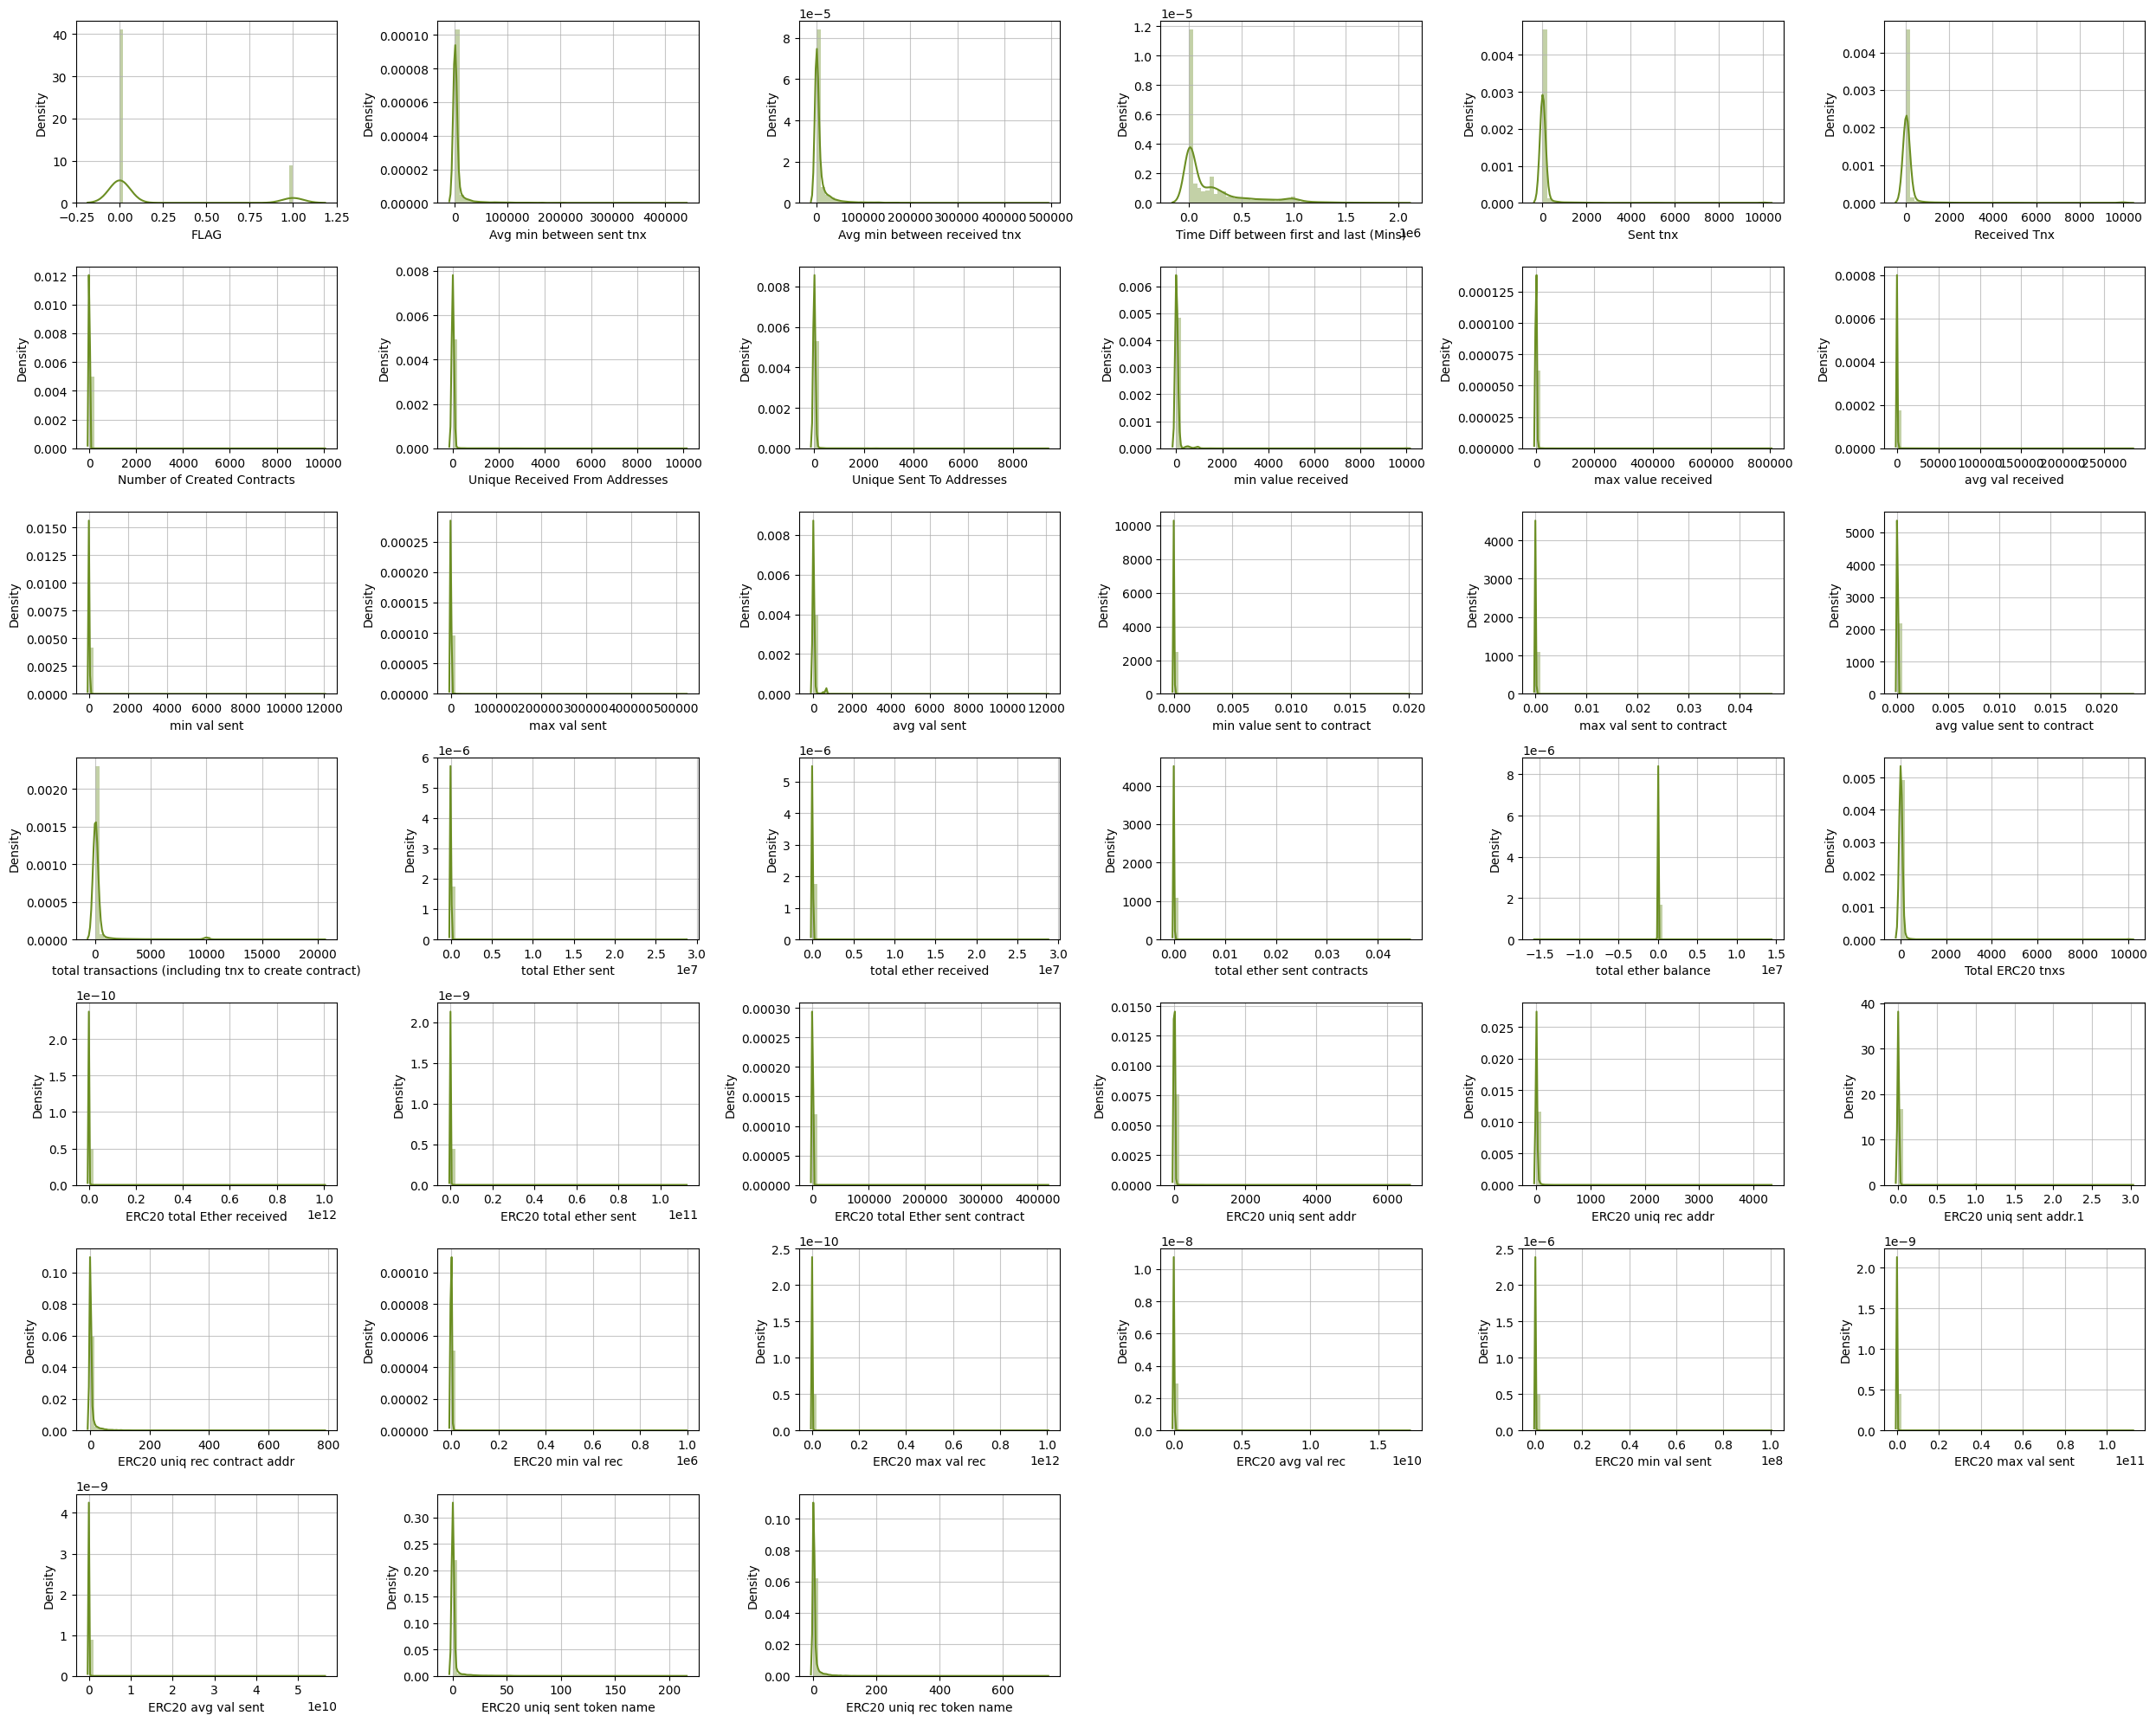

In [34]:
# Adjust the figure size for better readability

%%time
feats = (list(df.loc[:, 'FLAG':'ERC20 uniq rec token name']))

fig = plt.figure(figsize=(25, 20))
rows, cols = 7, 6

for i in range(0, len(feats)):
    ax = fig.add_subplot(rows, cols, i+1)
    ax.grid(alpha = 0.7, axis ='both')
    sns.distplot(x=df[feats[i]], color='olivedrab')
    plt.xlabel(feats[i])
    plt.tight_layout()

##Outlier

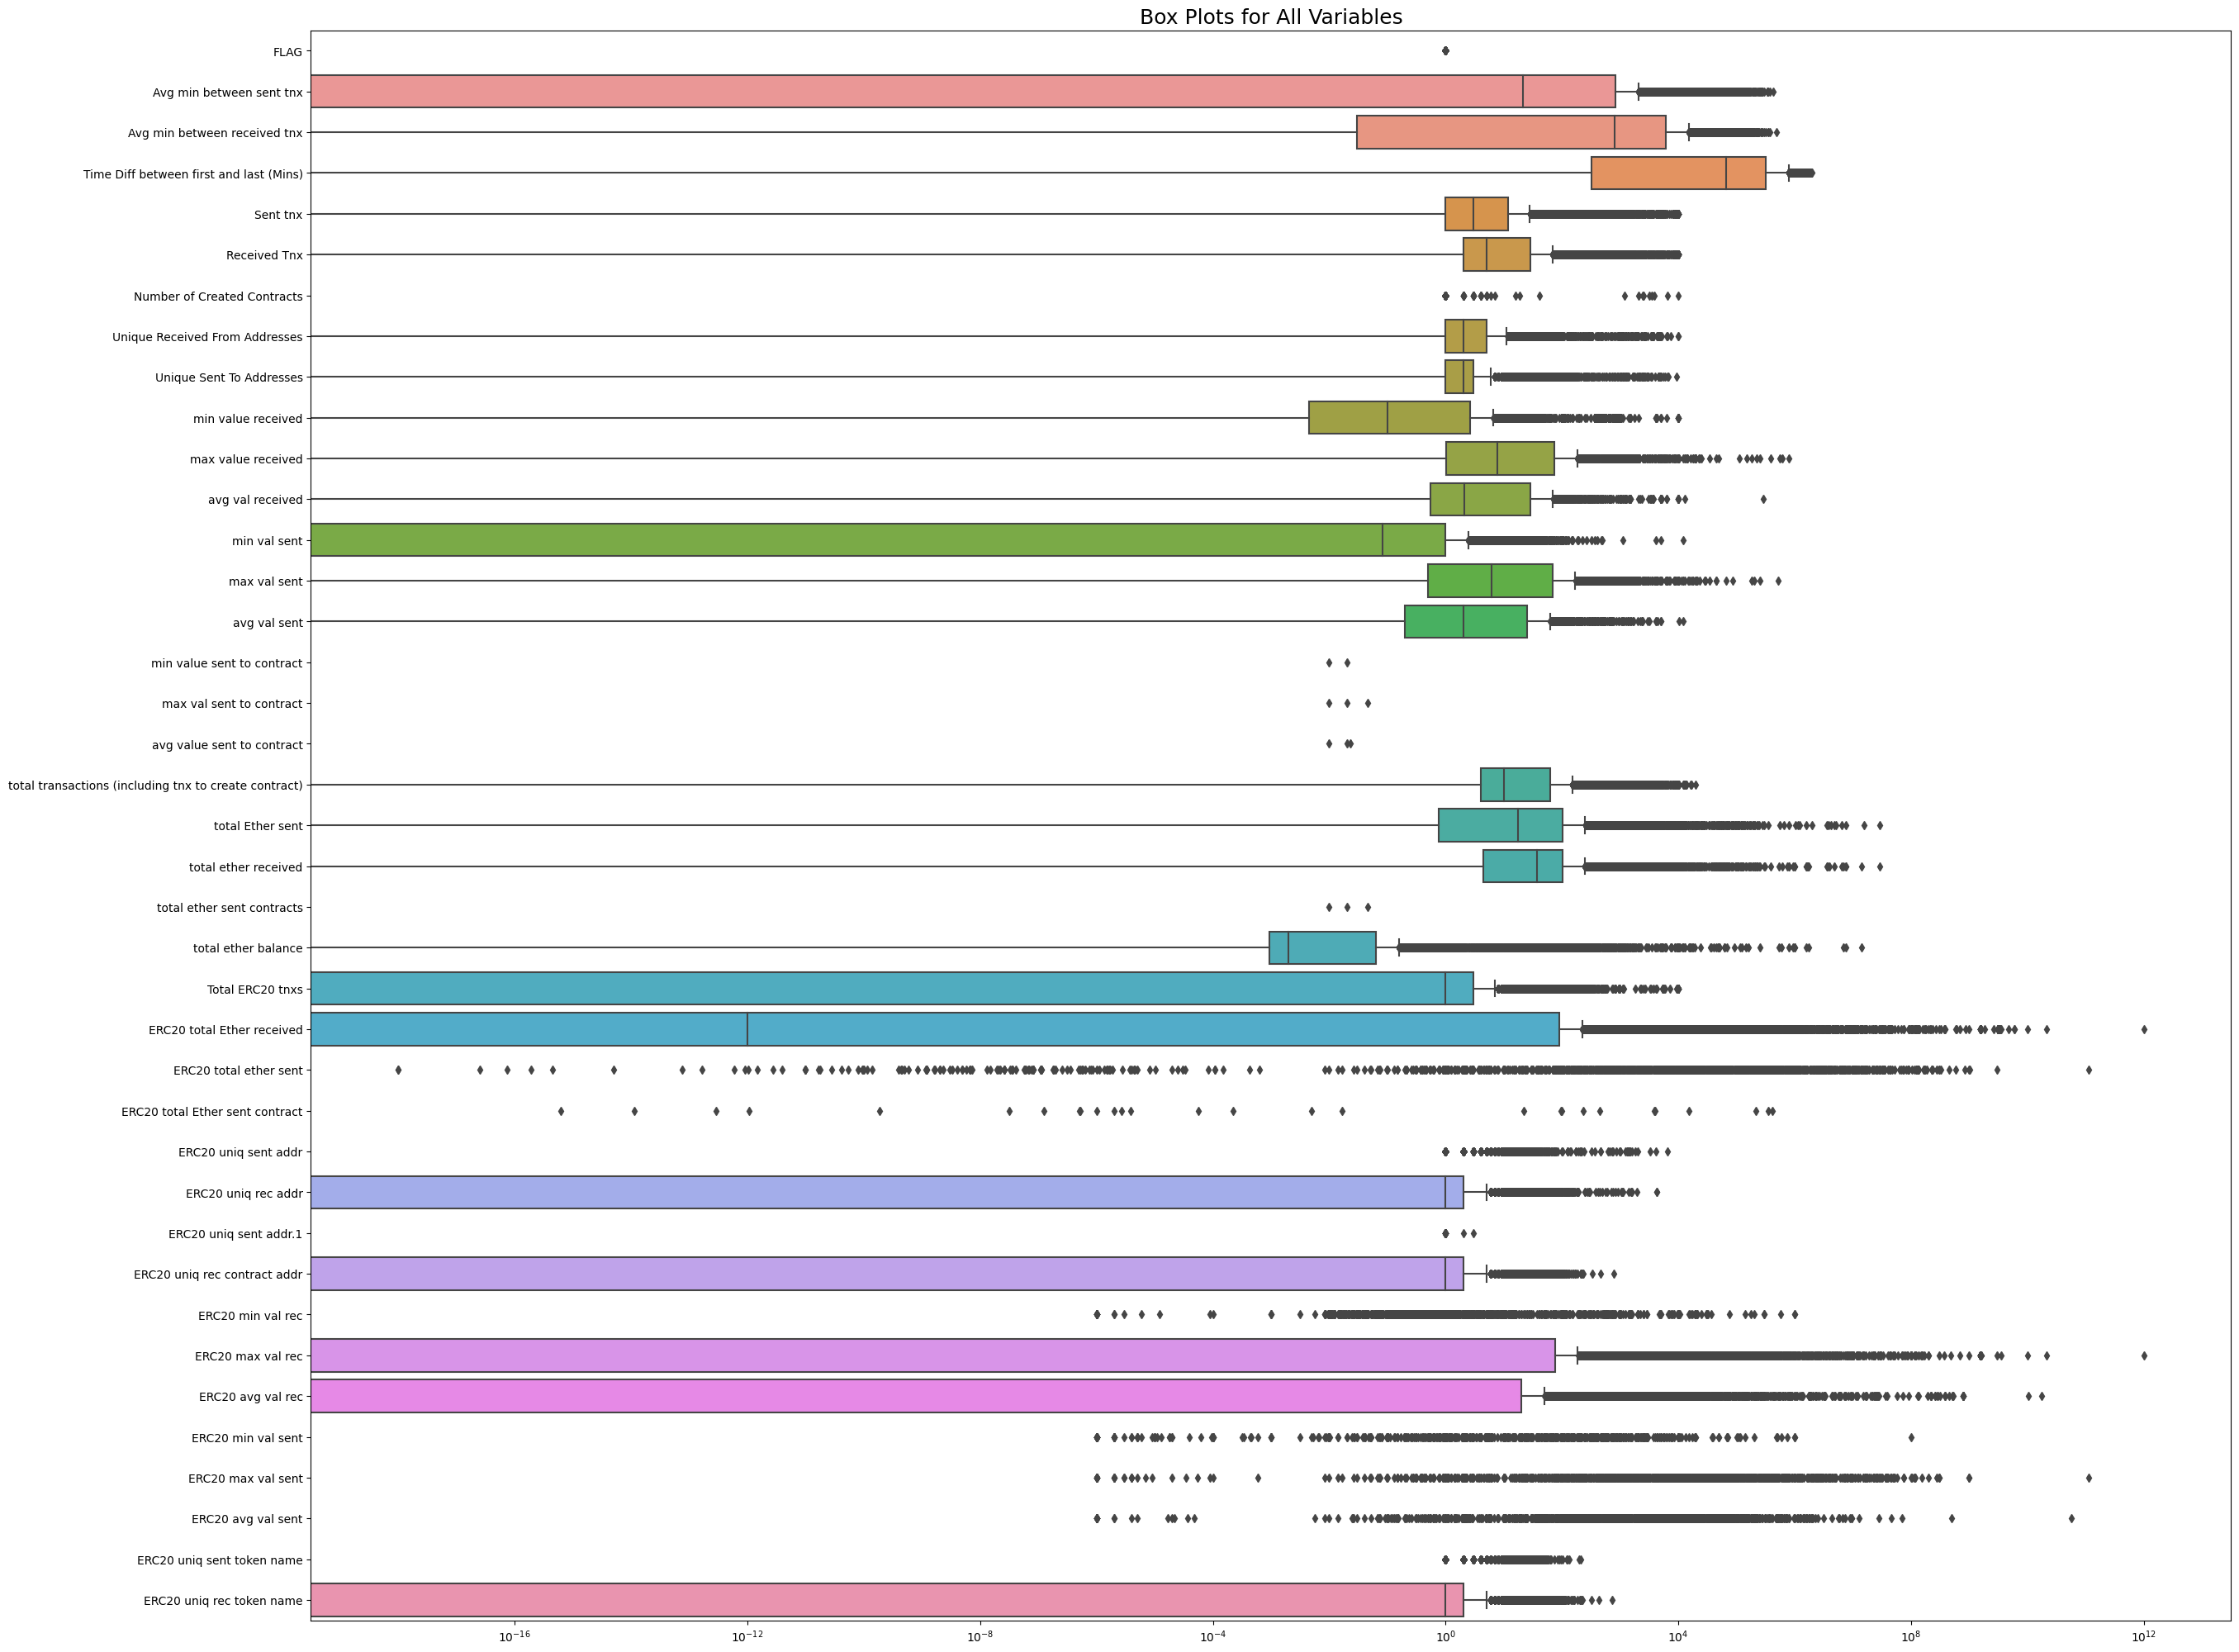

In [35]:
# Plotting Boxplots of the features

plt.figure(figsize = (30,25))
ax =sns.boxplot(data = df, orient='h')
ax.set_title('Box Plots for All Variables', fontsize = 18)
ax.set(xscale='log')
plt.show()

The features all lie in different ranges. The data needs to be normalized before modeling because later modeling will use logistic regression and KNN because both methods are sensitive to the variable scale and data distribution. If the skew data is not normalized, it is possible that there will be a bias in the model, then the model performance will decrease. We will use Box Cox for data normalization because the the features contain much 0s.

Later modeling will also use tree-based, so we need to allow features that have not been normalized and then copy them for logistic regression and KNN modeling.

##Data Normalization

In [36]:
# Copy dataframe
df_normalization = copy.deepcopy(df)

In [37]:
# Box Cox
from scipy.stats import boxcox

for column in df_normalization.columns:
    if column != 'total ether balance' and column != 'FLAG':
        df_normalization[column] = np.where(df_normalization[column] <= 0, 0.0001, df_normalization[column])  # to handle zero
        df_normalization[column], fitted_lambda = boxcox(df_normalization[column])

In [38]:
# Winsorization
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in df:
        if i > q3 or i < q1:
            out.append(i)
    print('Outliers:',out)
Winsorization_outliers(df_normalization['total ether balance'])

Outliers: [-854.6463028999998, -1422.982347, -2891.354427, -629.3501786, -3743.443847, -1633.635915, -752576.9329, -3500.466893, 115572.2429, -853.4735278999998, 2084.272476, 4847.505426, 798646.2797, -703.0326143999998, -751.4255472, 17354.95106, -15605352.04, 1871.462317, 12204.12006, -157323.68, -471878.5607, 1667.370629, -544.2589907, 48074.08233000001, 3092.452215, -3660.064314, 1614.975, 6182.058684000001, -25853.35742, 540520.9891, 24046.47337, 1753.1454620000004, 10786.17705, -3395545.789, -111818.7023, -570.6188552, 1594944.257, 5977.543531, -2071.299285, 1587.8892, 35029.547999999995, -1051.682337, 17897.04971, -1965.68779, -1024.974975, 7578.275097, -30705.94223, 1437.5282, -641.2776848999998, 2823.302301, -1979429.81, 12795.71923, -5484.555448, -4353.437711, -1079.871486, 5303.391356, -1578.607211, 2219.375387, -832.2276694, -49314.73694, -7118.327247, -2913.001071, 16233.03779, -72358.28283, 1441.209369, 1675.645092, -867.2674385, 6009.989207, -636.5351088, -10172.99228, 3

Because the `total ether balance` column has a relatively high negative value, the Winsorization method is used. This method involves replacing extreme values with certain upper or lower-bound values. In this way, values that are very far from the mean no longer affect the overall statistics.

CPU times: user 20.9 s, sys: 3.94 s, total: 24.8 s
Wall time: 20.7 s


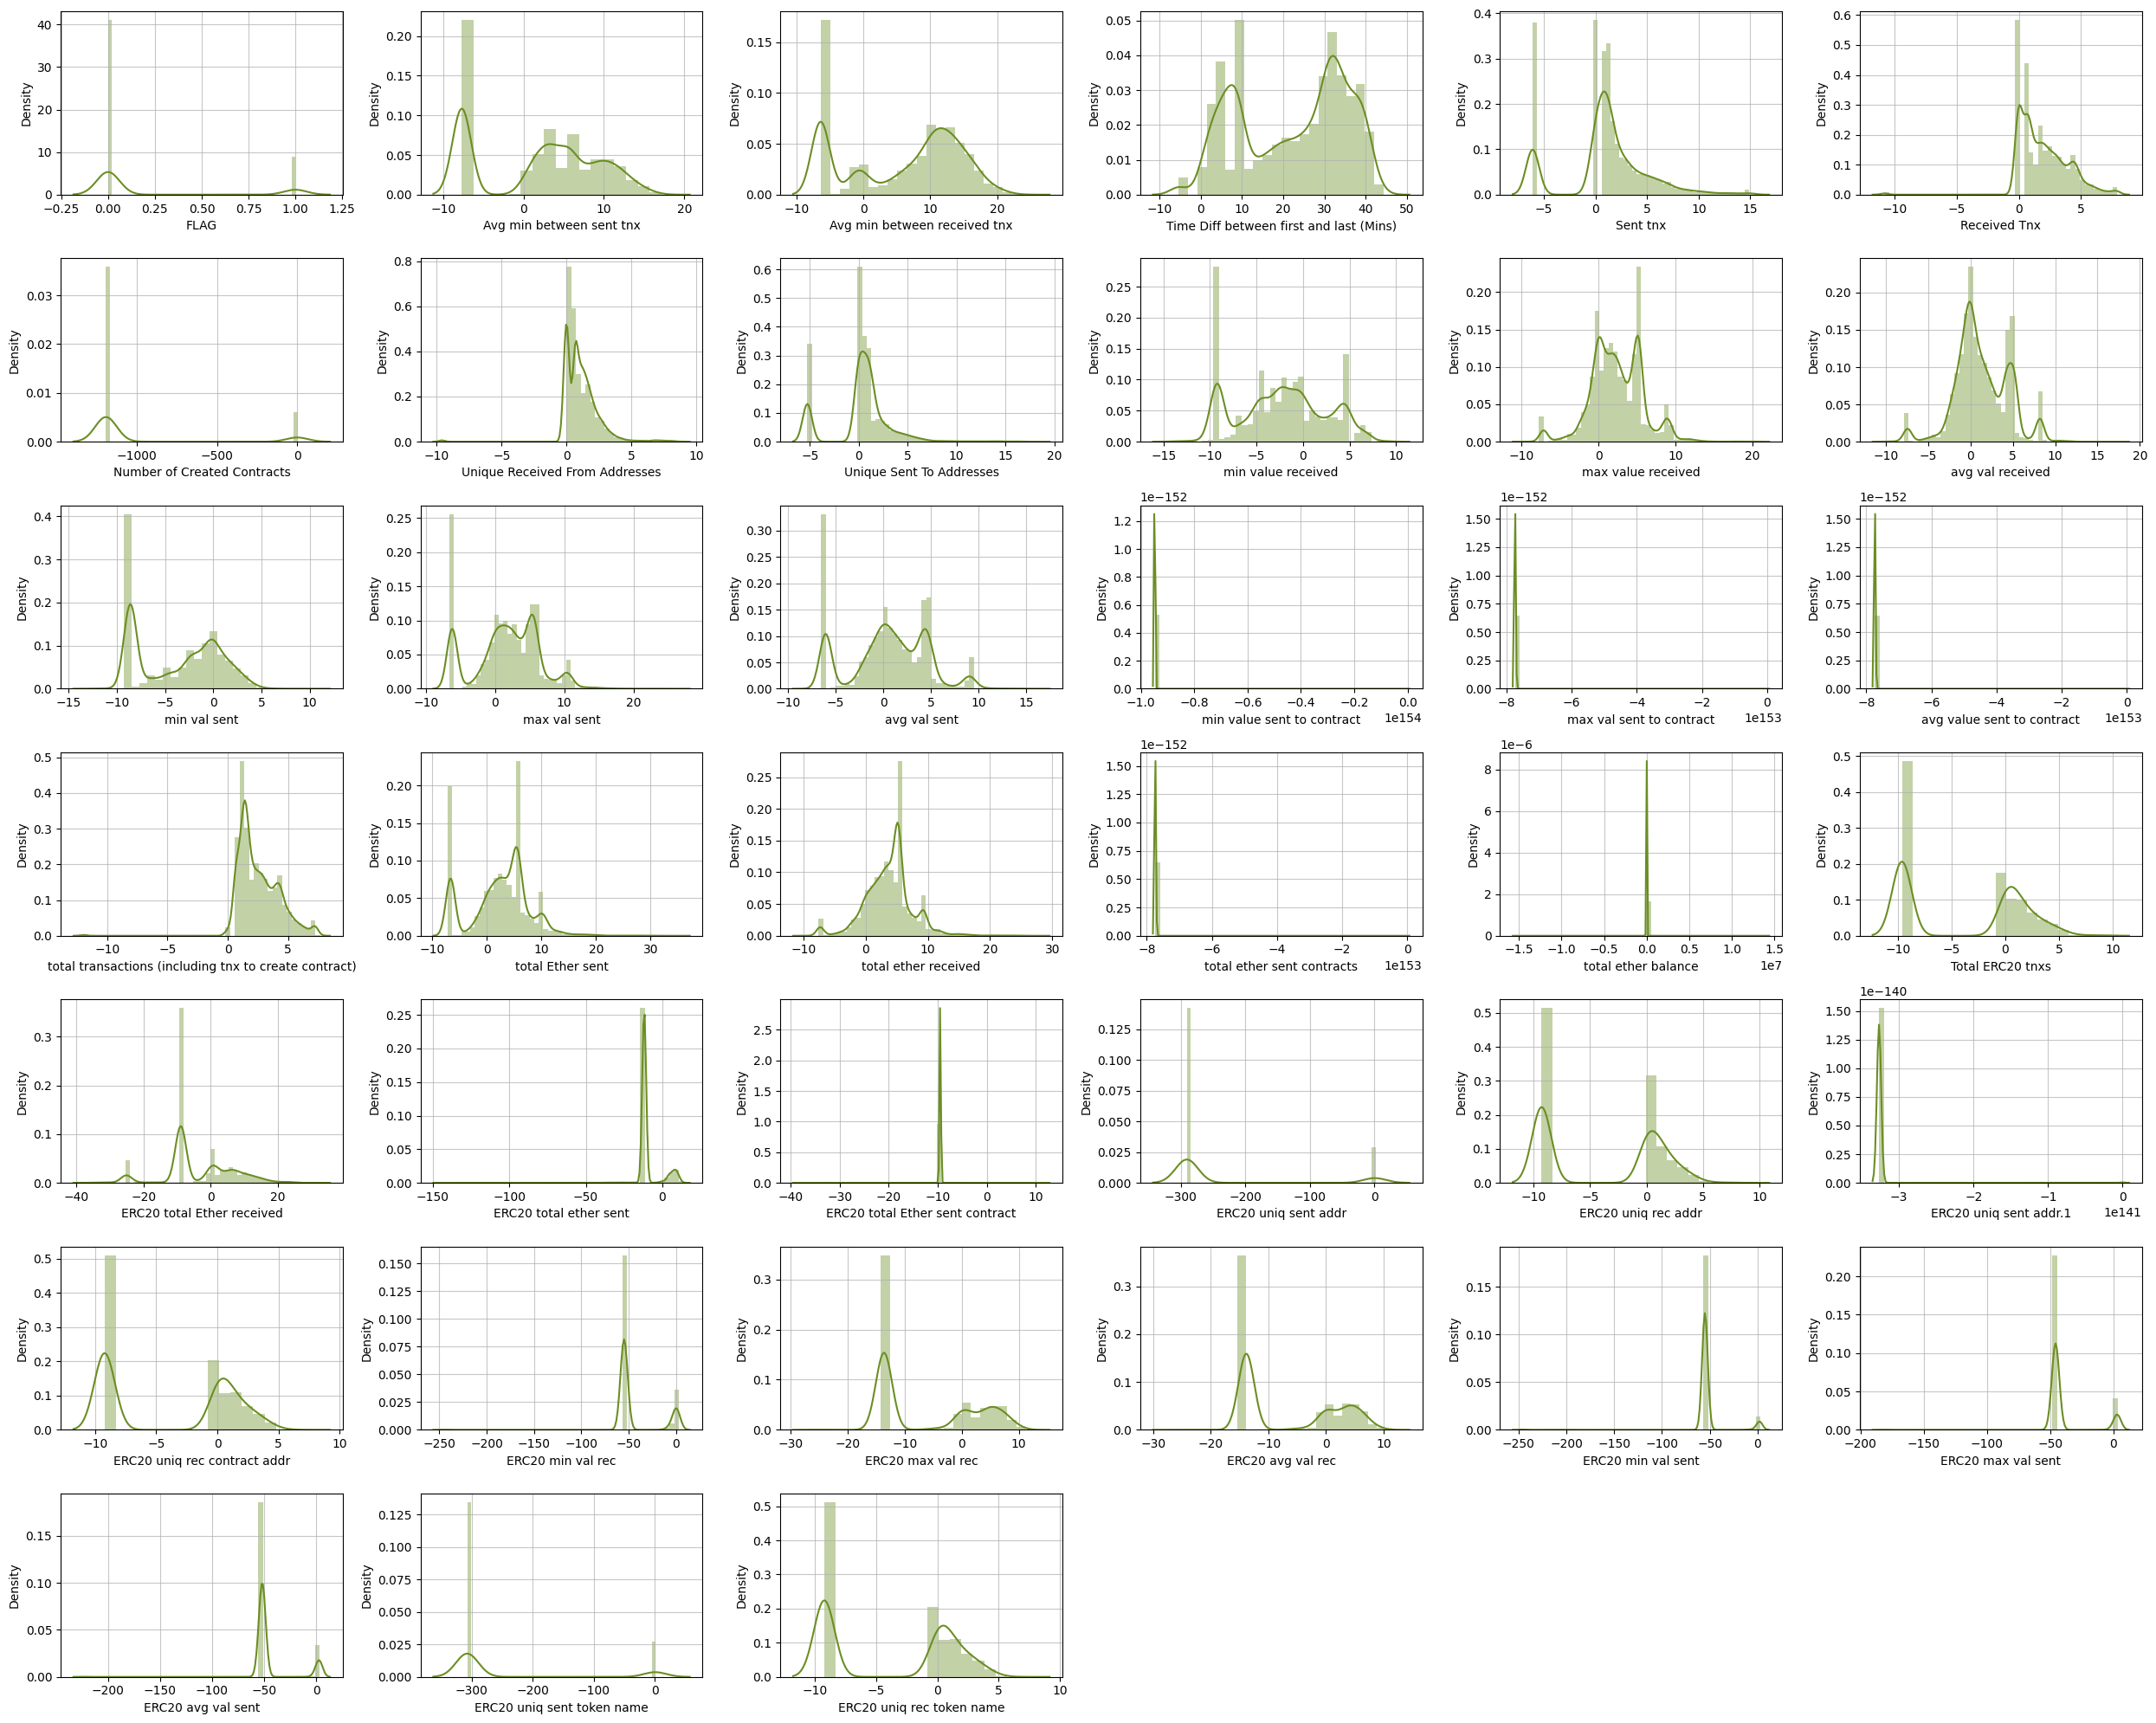

In [39]:
# Adjust the figure size for better readability

%%time
feats = (list(df_normalization.loc[:, 'FLAG':'ERC20 uniq rec token name']))

fig = plt.figure(figsize=(25, 20))
rows, cols = 7, 6

for i in range(0, len(feats)):
    ax = fig.add_subplot(rows, cols, i+1)
    ax.grid(alpha = 0.7, axis ='both')
    sns.distplot(x=df_normalization[feats[i]], color='olivedrab')
    plt.xlabel(feats[i])
    plt.tight_layout()

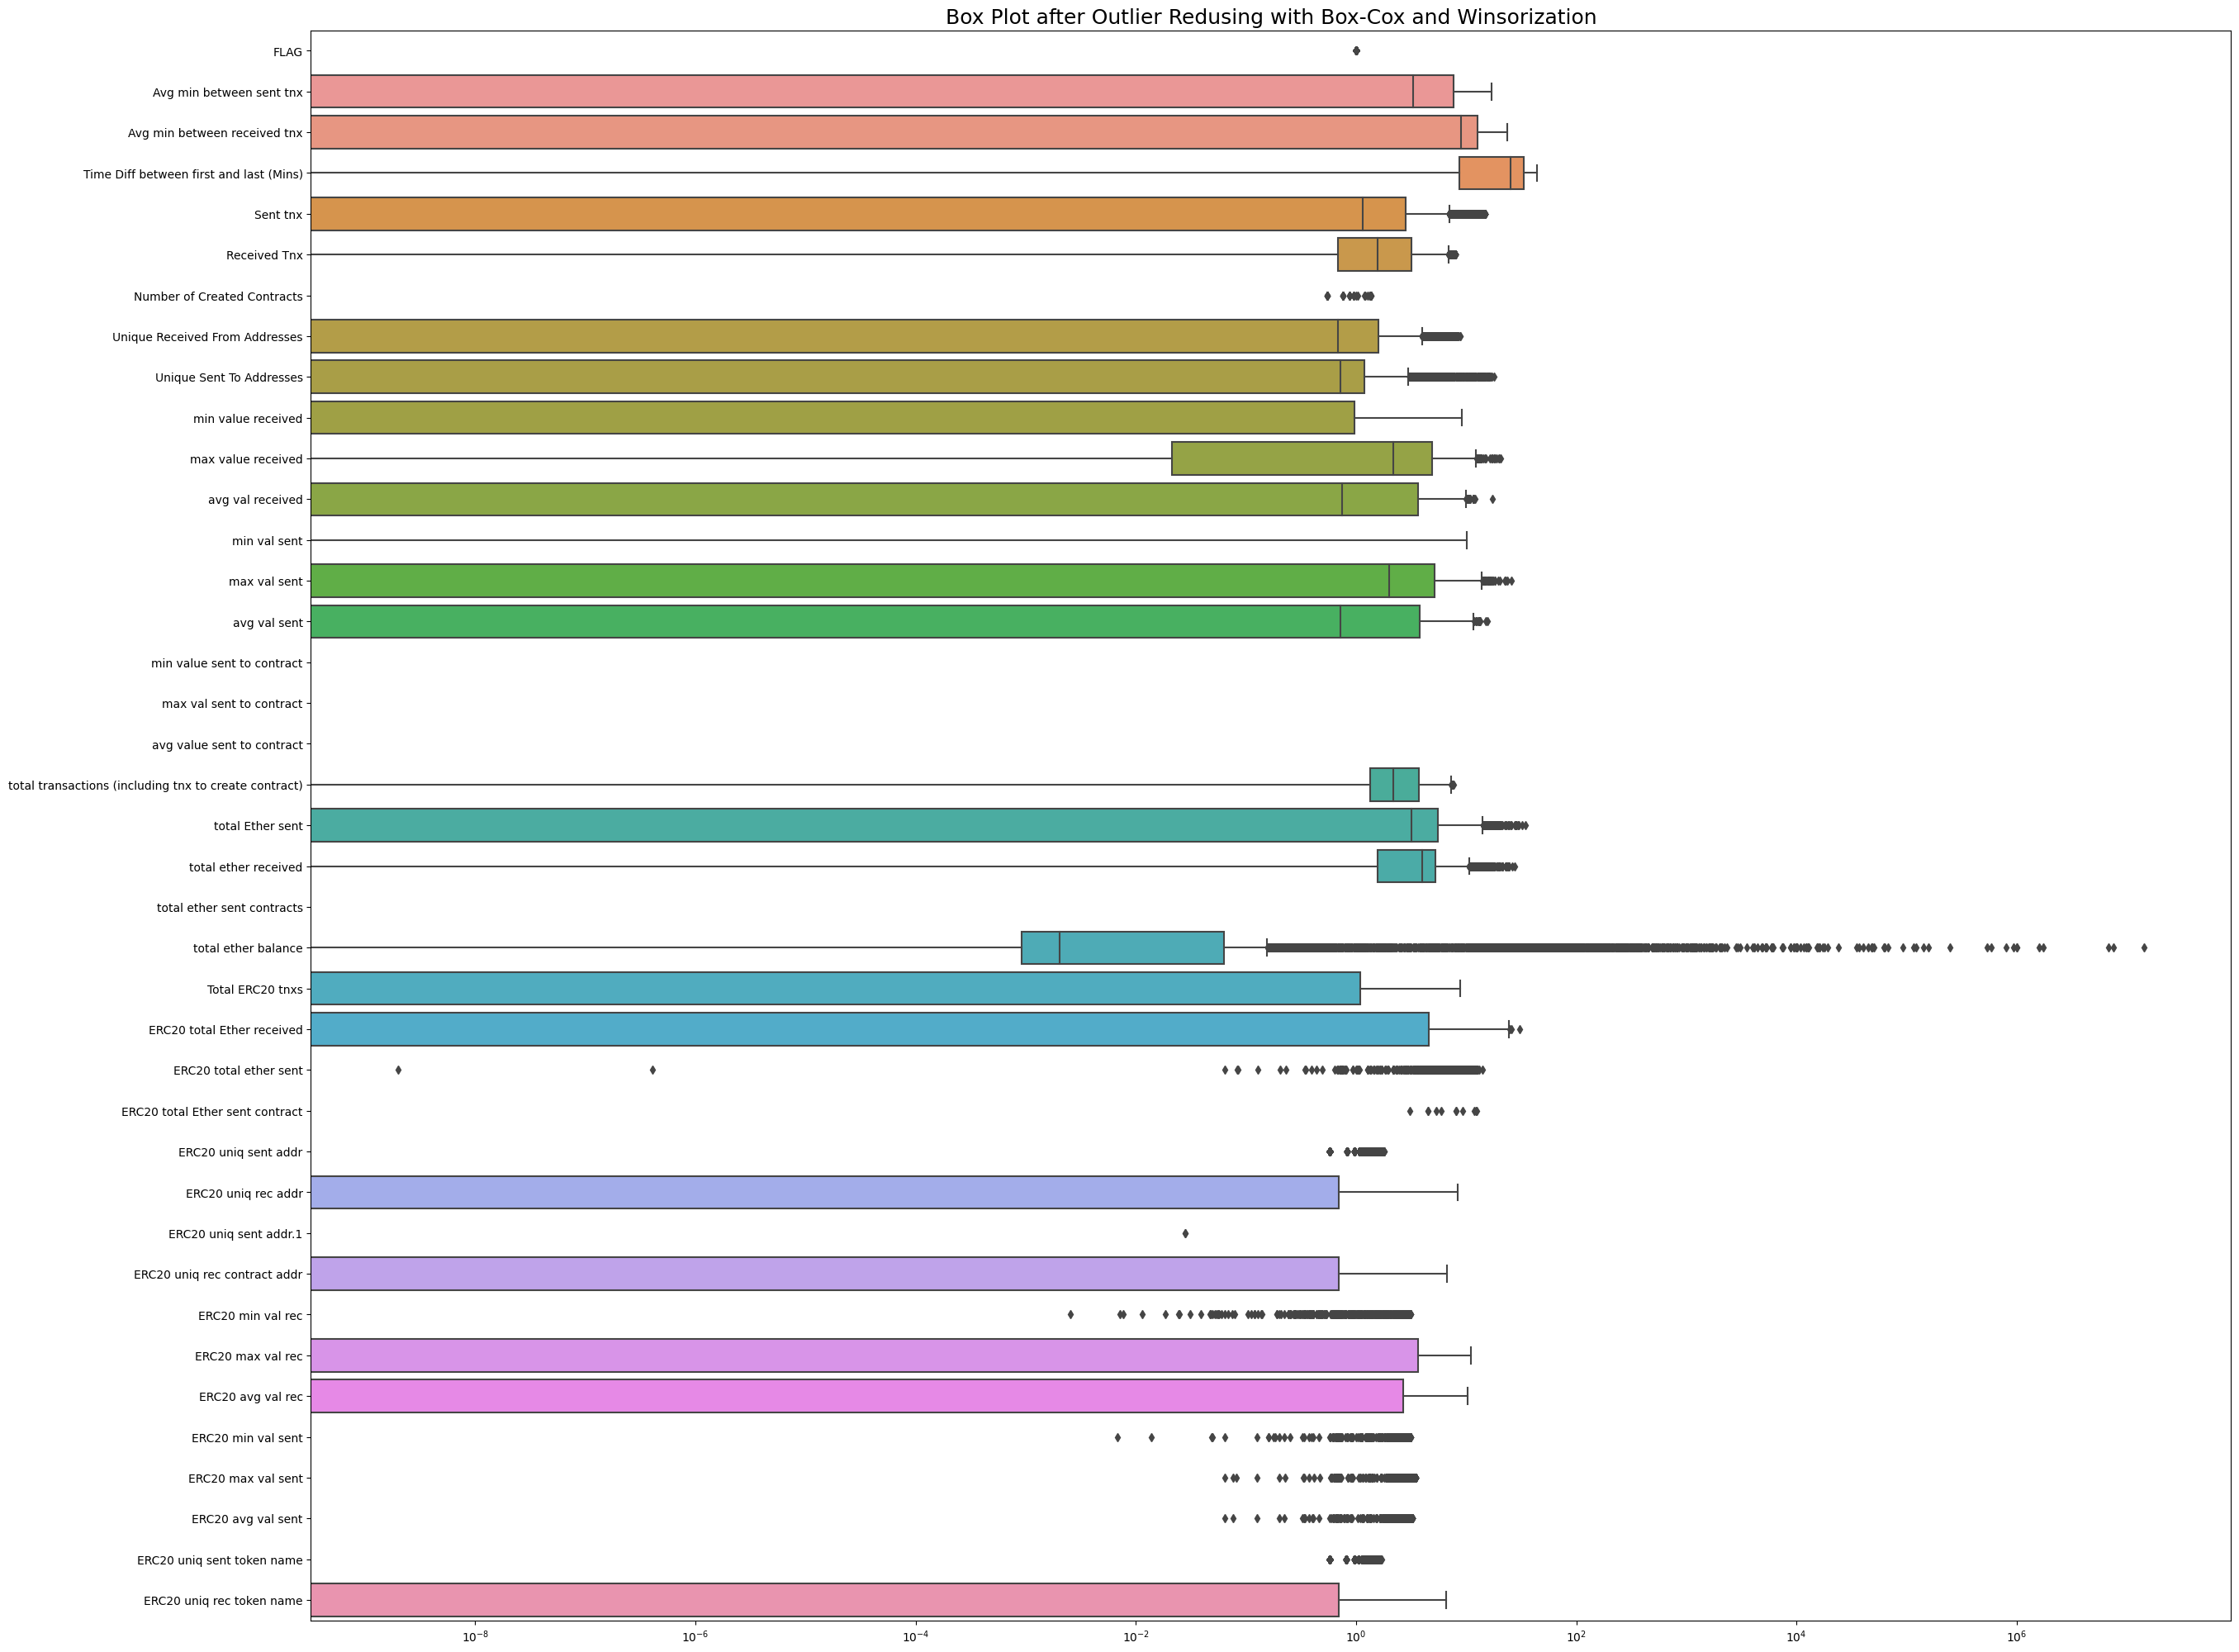

In [40]:
# Box plot for each column
plt.figure(figsize = (30,25))
ax =sns.boxplot(data = df_normalization, orient='h')
ax.set_title('Box Plot after Outlier Redusing with Box-Cox and Winsorization', fontsize = 18)
ax.set(xscale='log')
plt.show()

In [41]:
# Check dataframe
df_normalization

FLAG  Avg min between sent tnx  Avg min between received tnx  \
0        0                  7.764836                      9.503483   
1        0                 11.549569                     11.363912   
2        0                 16.198893                     10.986839   
3        0                 11.229438                     14.865091   
4        0                  3.880549                     14.009496   
...    ...                       ...                           ...   
9835     1                 -7.666727                     -6.427084   
9836     1                 11.540960                      8.540603   
9838     1                  9.229267                     10.784612   
9839     1                 -7.666727                     -6.427084   
9840     1                 13.171019                      6.216379   

      Time Diff between first and last (Mins)   Sent tnx  Received Tnx  \
0                                   37.728063   9.223505      4.164190   
1                                   41.155910   5.715118      2.007926   
2                                   35.892414   0.717087      2.215116   
3                                   34.399967   3.780756      2.117483   
4                                   34.184181  13.078550      2.848811   
...                                       ...        ...           ...   
9835                                17.550058  -6.079969      0.000000   
9836                                24.961279   1.484270      2.456728   
9838                                32.123304   5.196586      3.531559   
9839                                -5.299739  -6.079969      0.000000   
9840                                37.430801   3.338369      1.078431   

      Number of Created Contracts  Unique Received From Addresses  \
0                    -1192.221386                        3.628464   
1                    -1192.221386                        1.597866   
2                    -1192.221386                        2.278948   
3                    -1192.221386                        1.929011   
4                        0.000000                        1.929011   
...                           ...                             ...   
9835                     0.000000                        0.000000   
9836                 -1192.221386                        2.372269   
9838                 -1192.221386                        3.381593   
9839                 -1192.221386                        0.000000   
9840                 -1192.221386                        0.000000   

      Unique Sent To Addresses  min value received  ...  \
0                     6.705576           -9.239575  ...   
1                     3.172371           -9.239575  ...   
2                     0.726730           -2.180949  ...   
3                     3.066948           -9.239575  ...   
4                     3.618137           -9.239575  ...   
...                        ...                 ...  ...   
9835                 -5.262260           -9.239575  ...   
9836                  1.525000           -5.511589  ...   
9838                  4.943394           -6.848728  ...   
9839                 -5.262260           -0.693312  ...   
9840                  1.798349           -0.229138  ...   

      ERC20 uniq sent addr.1  ERC20 uniq rec contract addr  ERC20 min val rec  \
0             -3.267596e+141                      4.058023         -54.821291   
1             -3.267596e+141                      1.945354         -54.821291   
2             -3.267596e+141                      2.078807         -54.821291   
3             -3.267596e+141                      2.397051         -54.821291   
4             -3.267596e+141                      3.294242         -54.821291   
...                      ...                           ...                ...   
9835          -3.267596e+141                      0.000000         -54.821291   
9836          -3.267596e+141                      0.693077         -54.821291   
9838     

In [42]:
# Let's check the information of the data normalization
df_normalization.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9288 entries, 0 to 9840
Data columns (total 39 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   FLAG                                                   9288 non-null   int64  
 1   Avg min between sent tnx                               9288 non-null   float64
 2   Avg min between received tnx                           9288 non-null   float64
 3   Time Diff between first and last (Mins)                9288 non-null   float64
 4   Sent tnx                                               9288 non-null   float64
 5   Received Tnx                                           9288 non-null   float64
 6   Number of Created Contracts                            9288 non-null   float64
 7   Unique Received From Addresses                         9288 non-null   float64
 8   Unique Sent To Addresses                        

##Multicollinearity

###Dataframe without normalization

<Axes: >

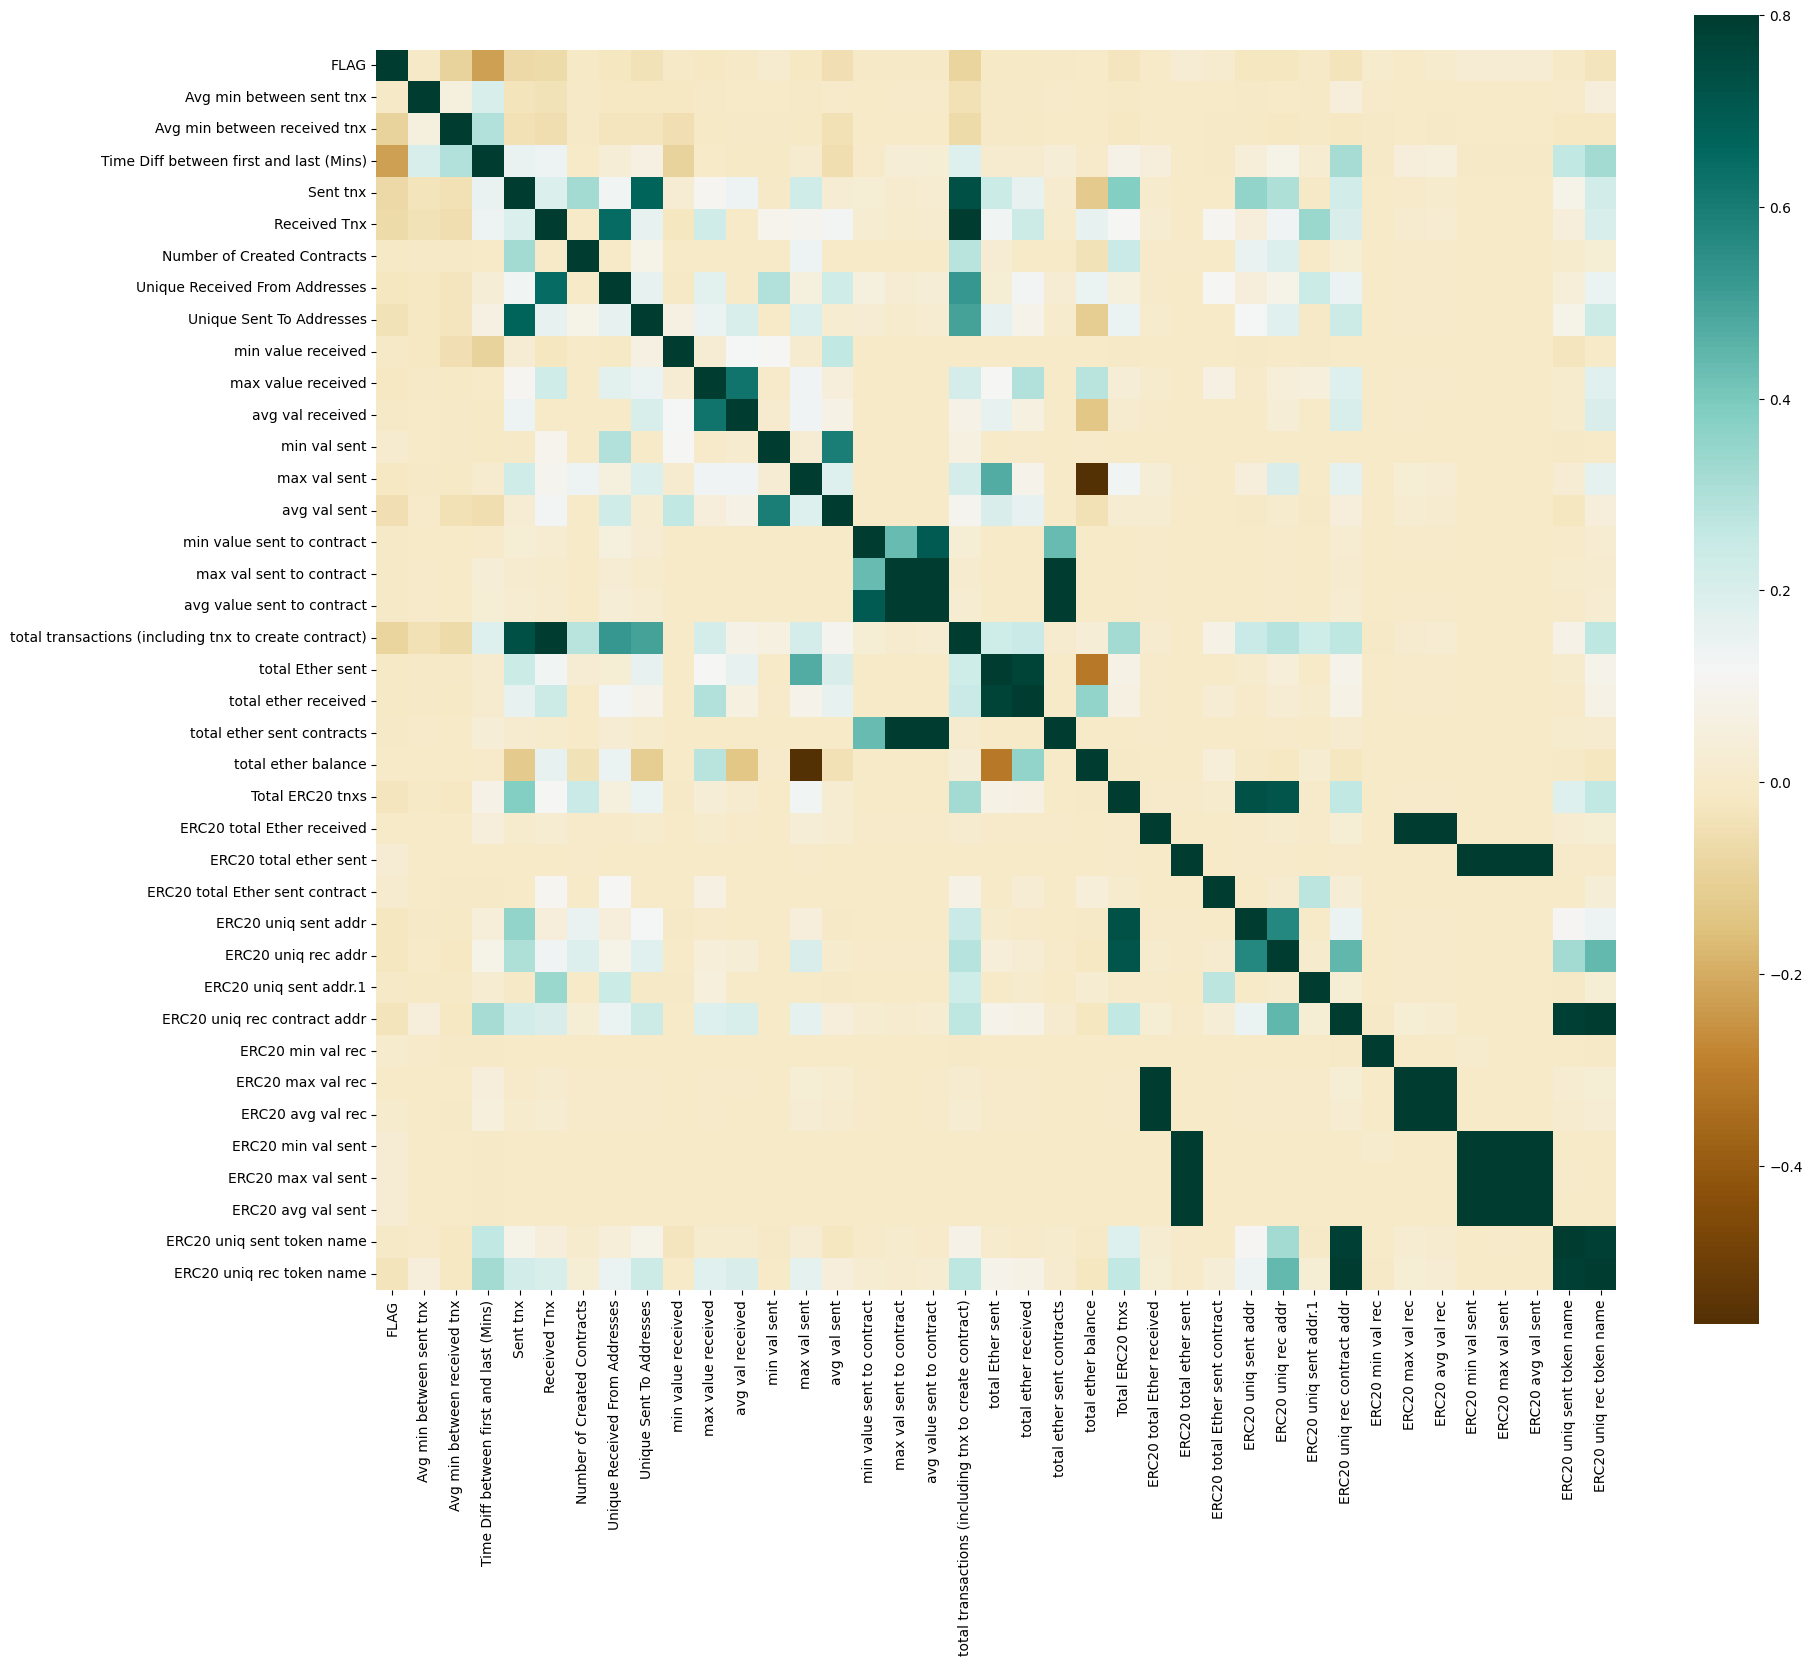

In [43]:
# Correlation matrix visualization
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 17))
sns.heatmap(corrmat, vmax=.8, square=True, cmap=sns.color_palette('BrBG', as_cmap=True))

In [44]:
# See the number of correlation
cor_matrix = df.corr()
cor_matrix.style.background_gradient(sns.light_palette('green', as_cmap=True))

In [45]:
# Make function to summarise the correlated data above 0.8
def display_high_corr_features(df, threshold=0.8):
    # Compute correlation matrix
    corr_matrix = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find features with correlation above threshold
    high_corr_features = set()
    for feature in upper_tri.columns:
        correlated_features = upper_tri.index[upper_tri[feature] > threshold].tolist()
        if len(correlated_features) > 0:
            correlated_features.append(feature)
            corr_values = [corr_matrix.loc[feature, f] for f in correlated_features]
            high_corr_features.add((tuple(sorted(correlated_features)), tuple(corr_values)))

    # Print results
    if len(high_corr_features) > 0:
        print('Features with correlation above %.2f:' % threshold)
        for features, corr_values in high_corr_features:
            print('%s: %s' % (str(features), str(corr_values)))
    else:
        print('No features with correlation above %.2f' % threshold)

In [46]:
display_high_corr_features(df)

Features with correlation above 0.80:
('avg value sent to contract', 'max val sent to contract', 'total ether sent contracts'): (0.999999999996996, 0.9496069523345684, 1.0)
('ERC20 avg val sent', 'ERC20 max val sent', 'ERC20 min val sent', 'ERC20 total ether sent'): (0.9995659084485637, 0.9997854901195159, 0.9999517463494083, 1.0)
('ERC20 max val sent', 'ERC20 min val sent', 'ERC20 total ether sent'): (0.9996492219254902, 0.999729255296052, 1.0)
('Received Tnx', 'total transactions (including tnx to create contract)'): (0.8060128941767909, 1.0)
('ERC20 uniq rec contract addr', 'ERC20 uniq rec token name'): (0.9996418770221989, 1.0)
('ERC20 min val sent', 'ERC20 total ether sent'): (0.9993107684290566, 1.0)
('ERC20 max val rec', 'ERC20 total Ether received'): (0.9999665866907113, 1.0)
('ERC20 avg val rec', 'ERC20 max val rec', 'ERC20 total Ether received'): (0.8598226947682354, 0.8597656282798843, 1.0)
('avg value sent to contract', 'max val sent to contract'): (0.9496061841126036, 1.0)

In [47]:
corr_matrix = df.corr().abs()
high_corr_var_pairs = (corr_matrix.where(np.triu(corr_matrix > 0.8, k=1))
                      .stack().reset_index().rename(columns={0: 'correlation'}))
high_corr_var_pairs = high_corr_var_pairs[high_corr_var_pairs['correlation'] > 0.8]
high_corr_var_pairs

level_0  \
0                   Received Tnx   
1       max val sent to contract   
2       max val sent to contract   
3     avg value sent to contract   
4     ERC20 total Ether received   
5     ERC20 total Ether received   
6         ERC20 total ether sent   
7         ERC20 total ether sent   
8         ERC20 total ether sent   
9   ERC20 uniq rec contract addr   
10             ERC20 max val rec   
11            ERC20 min val sent   
12            ERC20 min val sent   
13            ERC20 max val sent   

                                              level_1  correlation  
0   total transactions (including tnx to create co...     0.806013  
1                          avg value sent to contract     0.949606  
2                          total ether sent contracts     1.000000  
3                          total ether sent contracts     0.949607  
4                                   ERC20 max val rec     0.999967  
5                                   ERC20 avg val rec     0.859823  
6                                  ERC20 min val sent     0.999311  
7                                  ERC20 max val sent     0.999649  
8                                  ERC20 avg val sent     0.999566  
9                           ERC20 uniq rec token name     0.999642  
10                                  ERC20 avg val rec     0.859766  
11                                 ERC20 max val sent     0.999729  
12                                 ERC20 avg val sent     0.999785  
13                                 ERC20 avg val sent     0.999952

After observing, here are the features that correlate with the threshold value of 0.8.
1. avg value sent to contract
2. total transactions (including tnx to create contract)
3. total ether sent contracts
4. ERC20 max val rec
5. ERC20 avg val rec
6. ERC20 min val sent
7. ERC20 max val sent
8. ERC20 avg val sent
9. ERC20 uniq rec token name

We need to drop these columns, except `total transactions (including tnx to create contract)` because has the most highly correlated with `FLAG`.

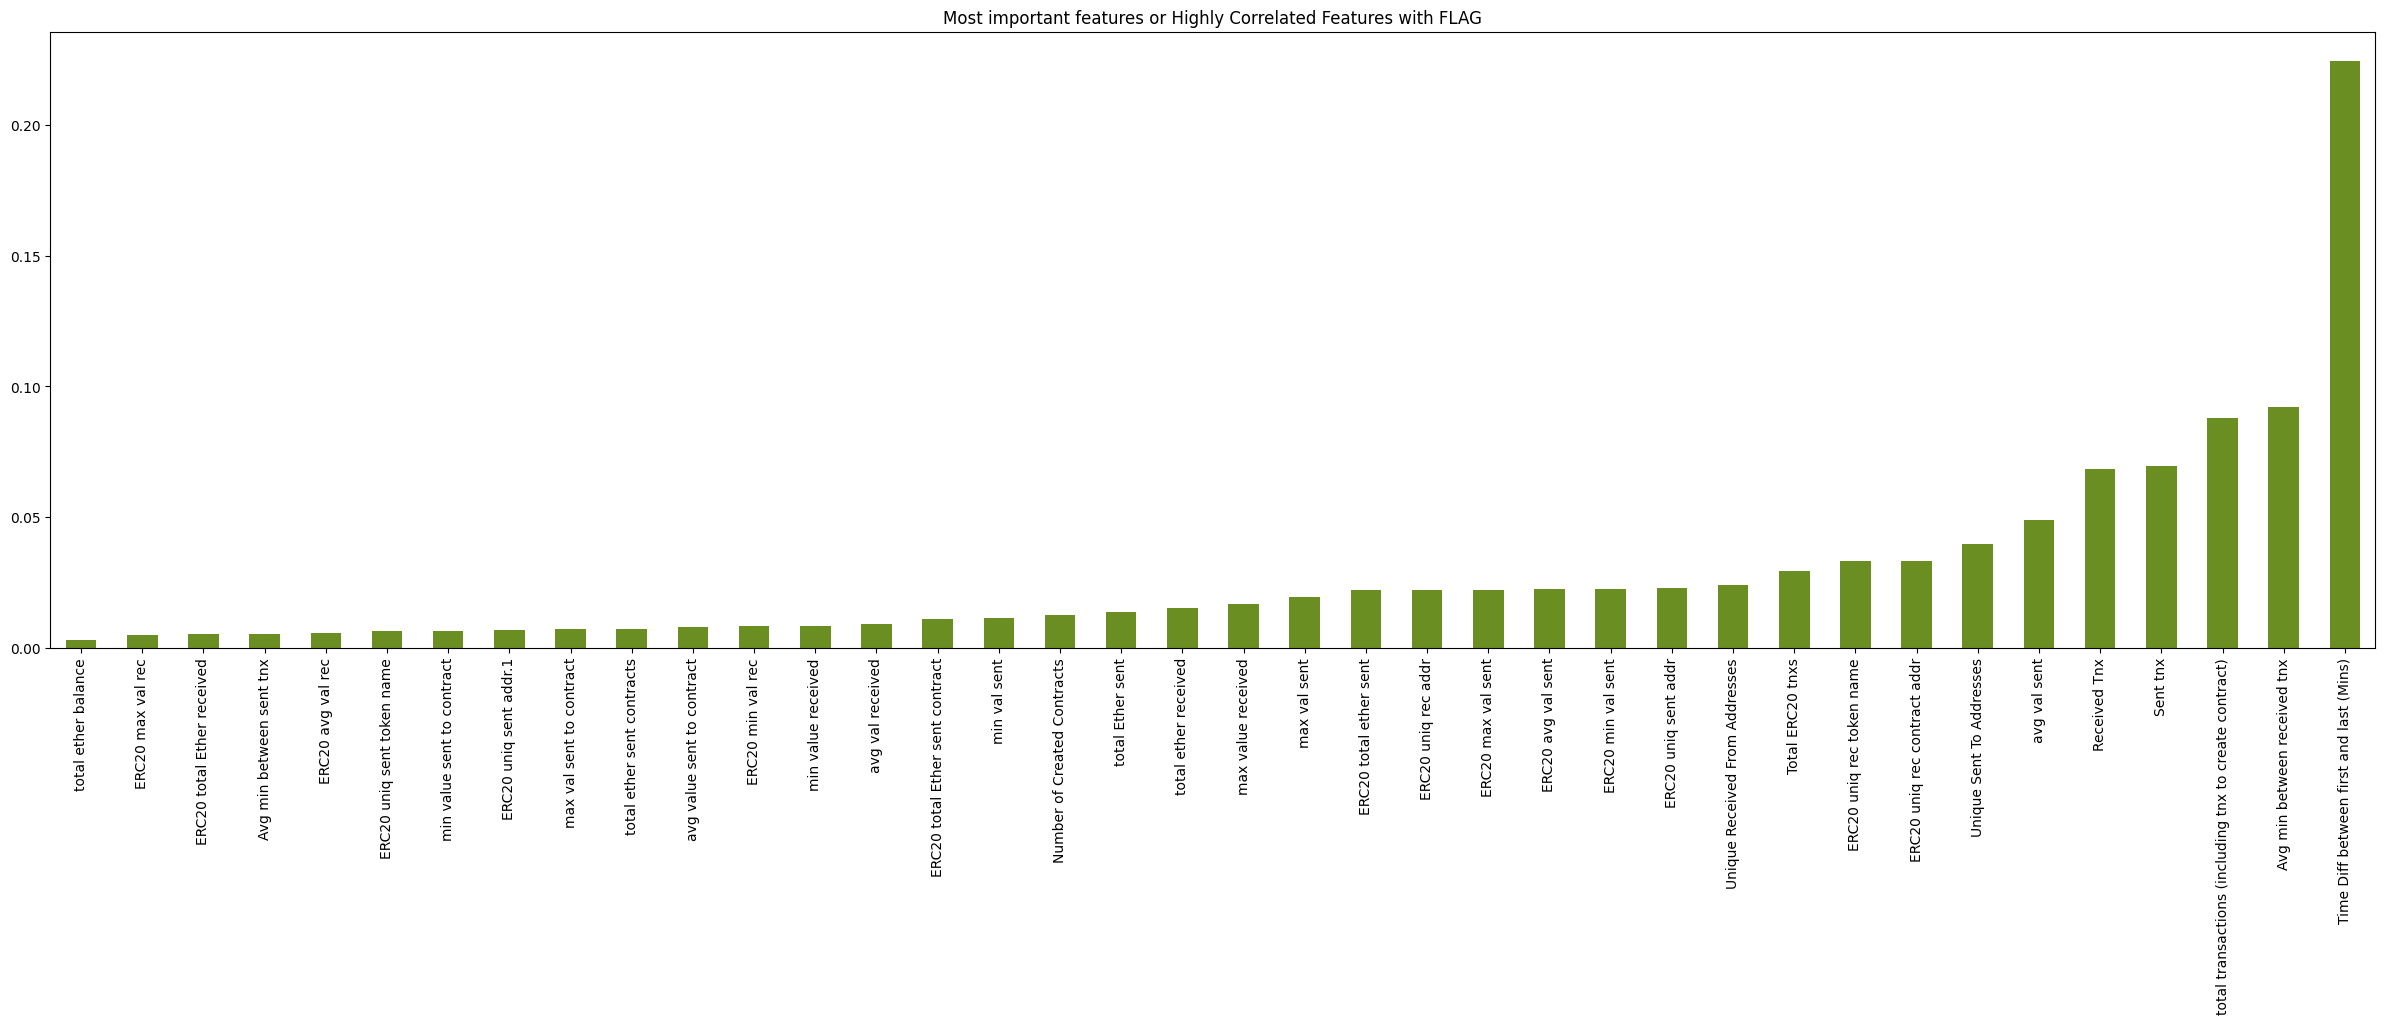

In [48]:
# Barchart to visualize
plt.figure(figsize=(30,8))
d = df.corr()['FLAG'][1:].abs().sort_values().plot(kind='bar', color='olivedrab', title='Most important features or Highly Correlated Features with FLAG')
plt.show()

In [49]:
# Show the high value correlated with FLAG
c = df.corr()['FLAG'][1:].sort_values()
c

Time Diff between first and last (Mins)                 -0.224568
Avg min between received tnx                            -0.092056
total transactions (including tnx to create contract)   -0.087738
Sent tnx                                                -0.069343
Received Tnx                                            -0.068402
avg val sent                                            -0.048857
Unique Sent To Addresses                                -0.039511
ERC20 uniq rec contract addr                            -0.033244
ERC20 uniq rec token name                               -0.033037
Total ERC20 tnxs                                        -0.029336
Unique Received From Addresses                          -0.023857
ERC20 uniq sent addr                                    -0.022791
ERC20 uniq rec addr                                     -0.021960
max val sent                                            -0.019490
max value received                                      -0.016824
total ethe

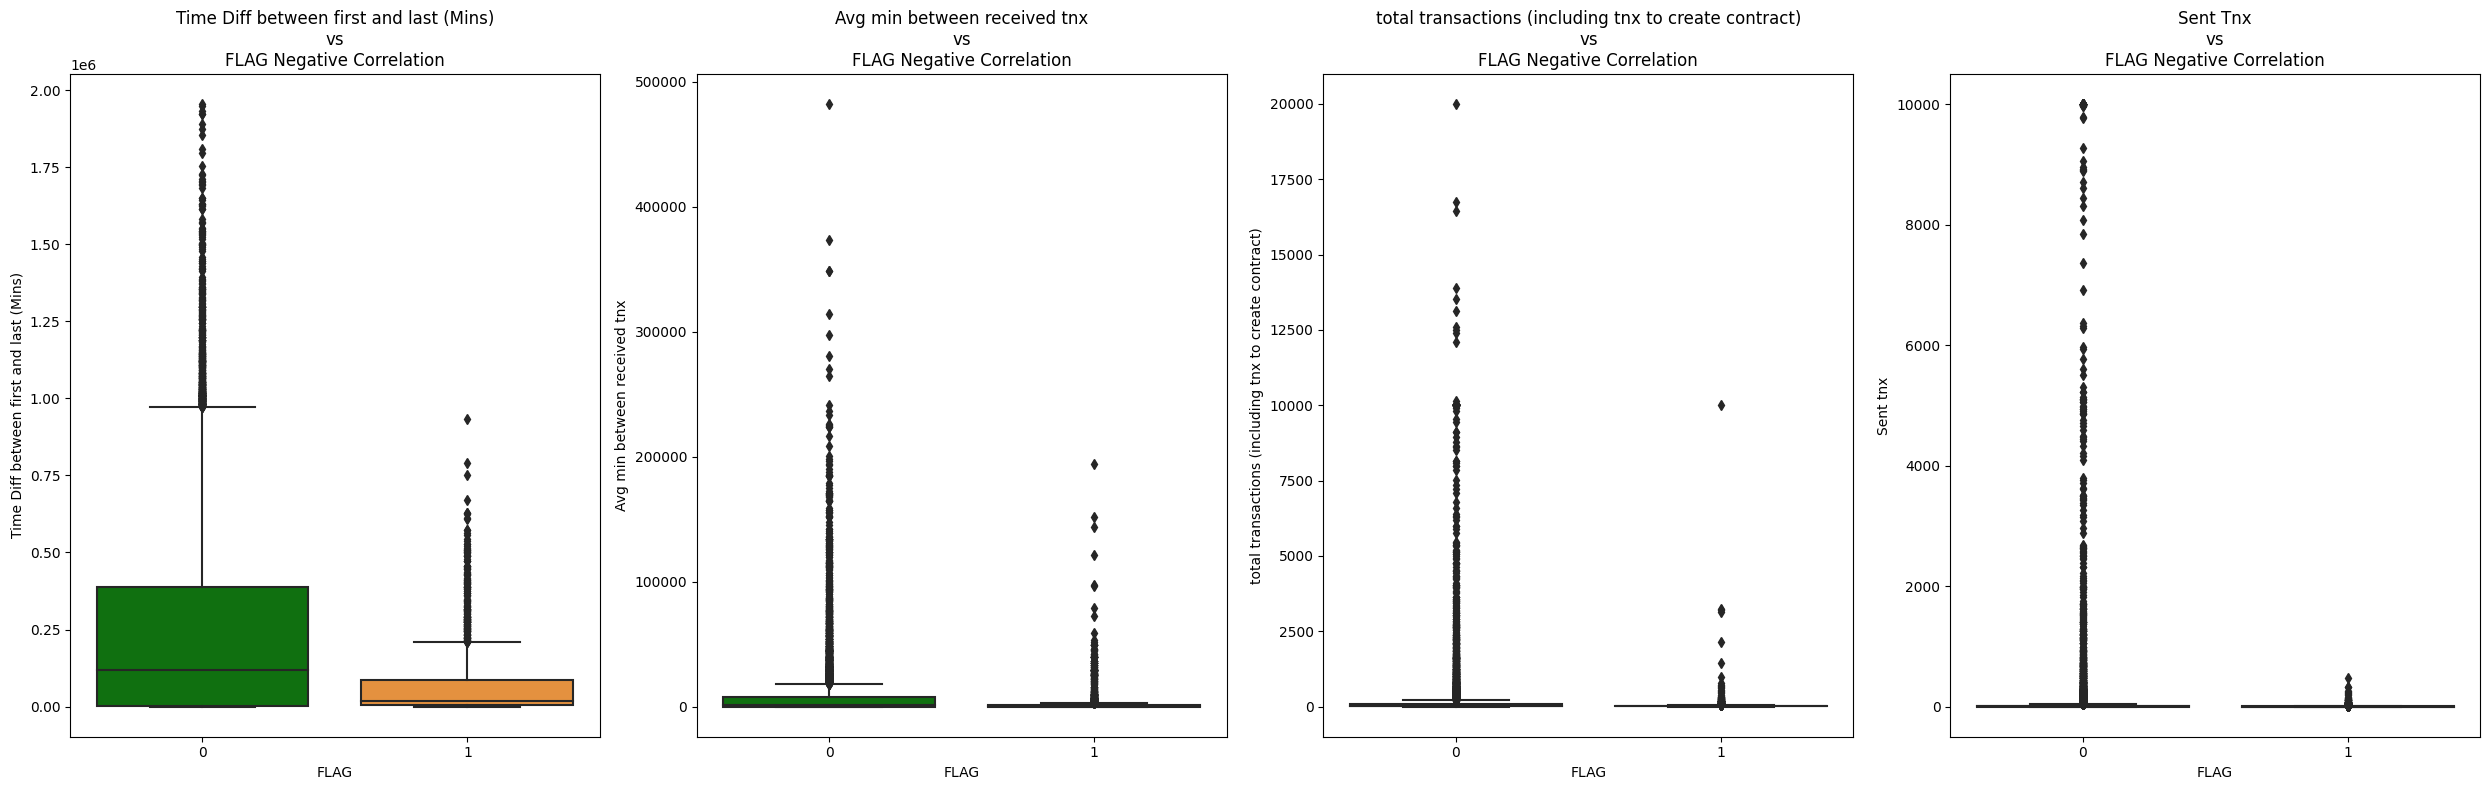

In [50]:
colors = ['#008000','#ff9124']

f, axes = plt.subplots(ncols=4, figsize=(25,8))

# Negative Correlations with our FLAG (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x='FLAG', y='Time Diff between first and last (Mins)', data=df, palette=colors, ax=axes[0])
axes[0].set_title('Time Diff between first and last (Mins)\nvs\nFLAG Negative Correlation')

sns.boxplot(x='FLAG', y='Avg min between received tnx', data=df, palette=colors, ax=axes[1])
axes[1].set_title('Avg min between received tnx\nvs\nFLAG Negative Correlation')

sns.boxplot(x='FLAG', y='total transactions (including tnx to create contract)', data=df, palette=colors, ax=axes[2])
axes[2].set_title('total transactions (including tnx to create contract)\nvs\nFLAG Negative Correlation')

sns.boxplot(x='FLAG', y='Sent tnx', data=df, palette=colors, ax=axes[3])
axes[3].set_title('Sent Tnx\nvs\nFLAG Negative Correlation')

plt.tight_layout()
plt.show()

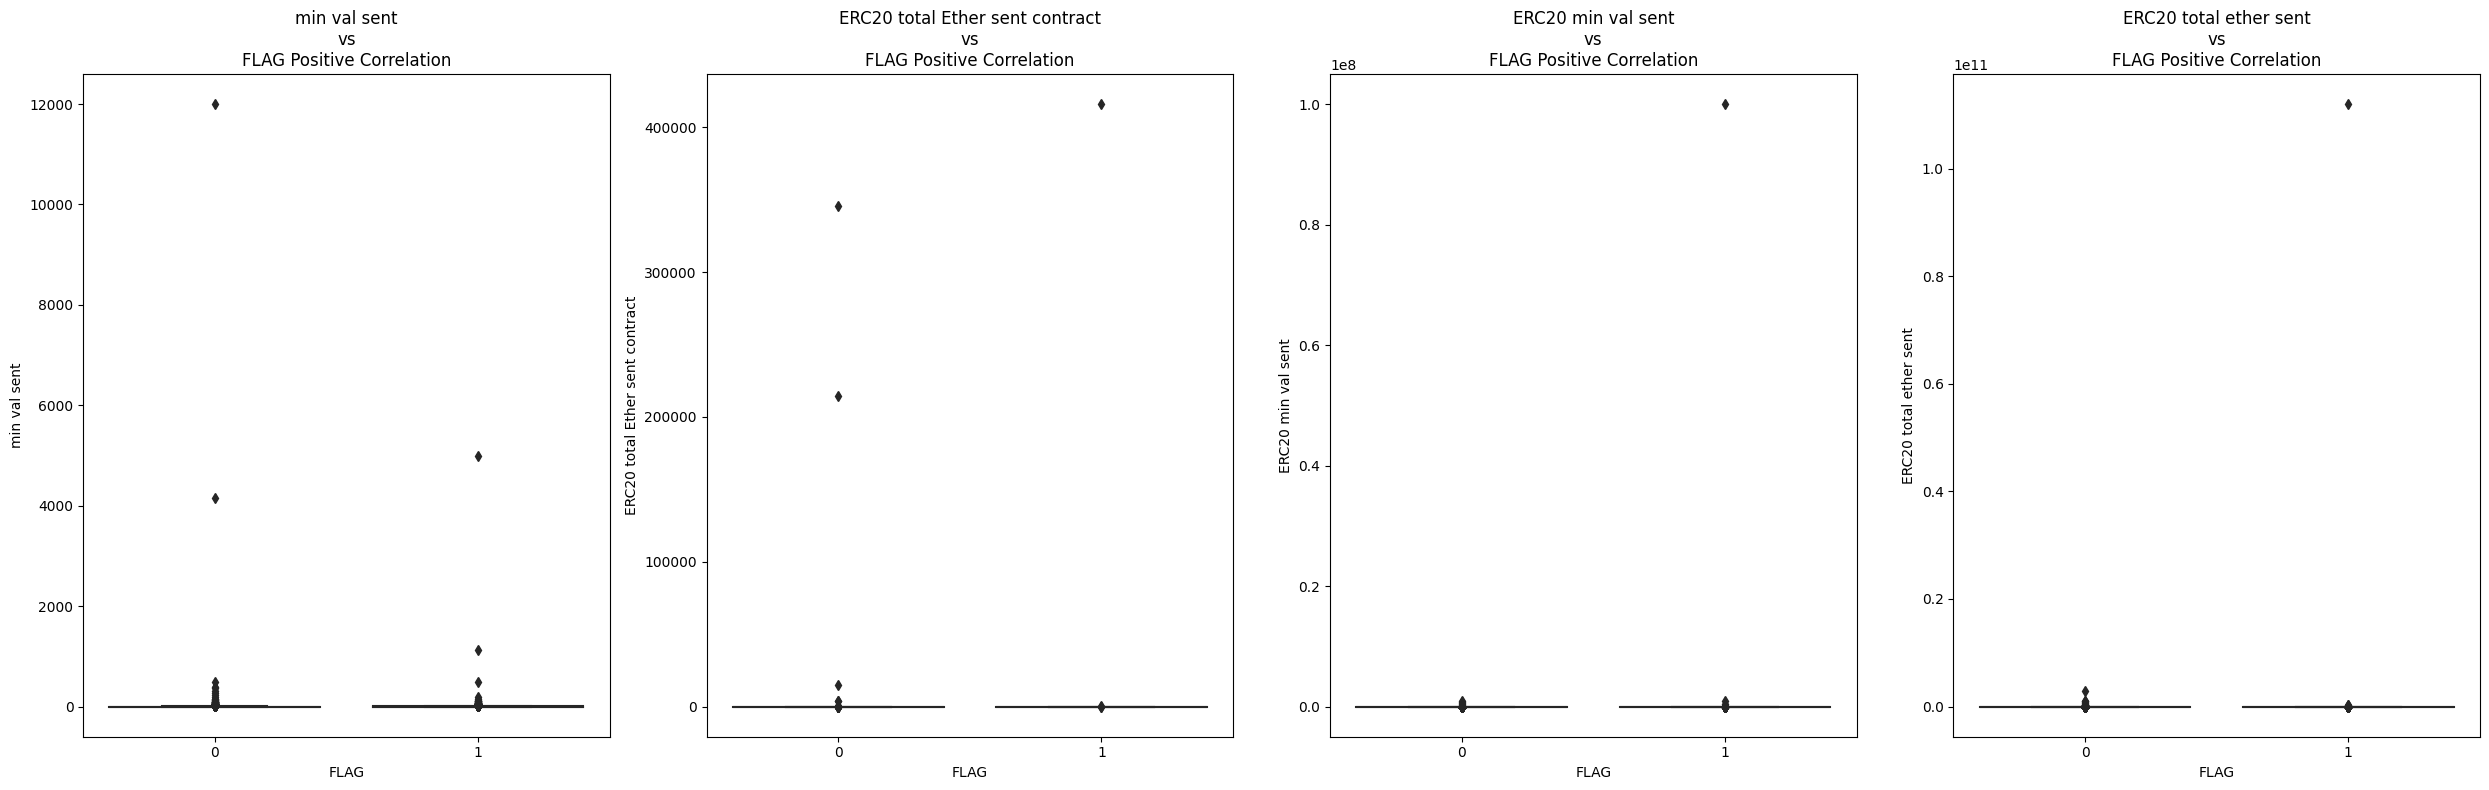

In [51]:
colors = ['#008000','#ff9124']

f, axes = plt.subplots(ncols=4, figsize=(25,8))

# Negative Correlations with our FLAG (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x='FLAG', y='min val sent', data=df, palette=colors, ax=axes[0])
axes[0].set_title('min val sent\nvs\nFLAG Positive Correlation')

sns.boxplot(x='FLAG', y='ERC20 total Ether sent contract', data=df, palette=colors, ax=axes[1])
axes[1].set_title('ERC20 total Ether sent contract\nvs\nFLAG Positive Correlation')

sns.boxplot(x='FLAG', y='ERC20 min val sent', data=df, palette=colors, ax=axes[2])
axes[2].set_title('ERC20 min val sent\nvs\nFLAG Positive Correlation')

sns.boxplot(x='FLAG', y='ERC20 total ether sent', data=df, palette=colors, ax=axes[3])
axes[3].set_title('ERC20 total ether sent\nvs\nFLAG Positive Correlation')

plt.tight_layout()
plt.show()

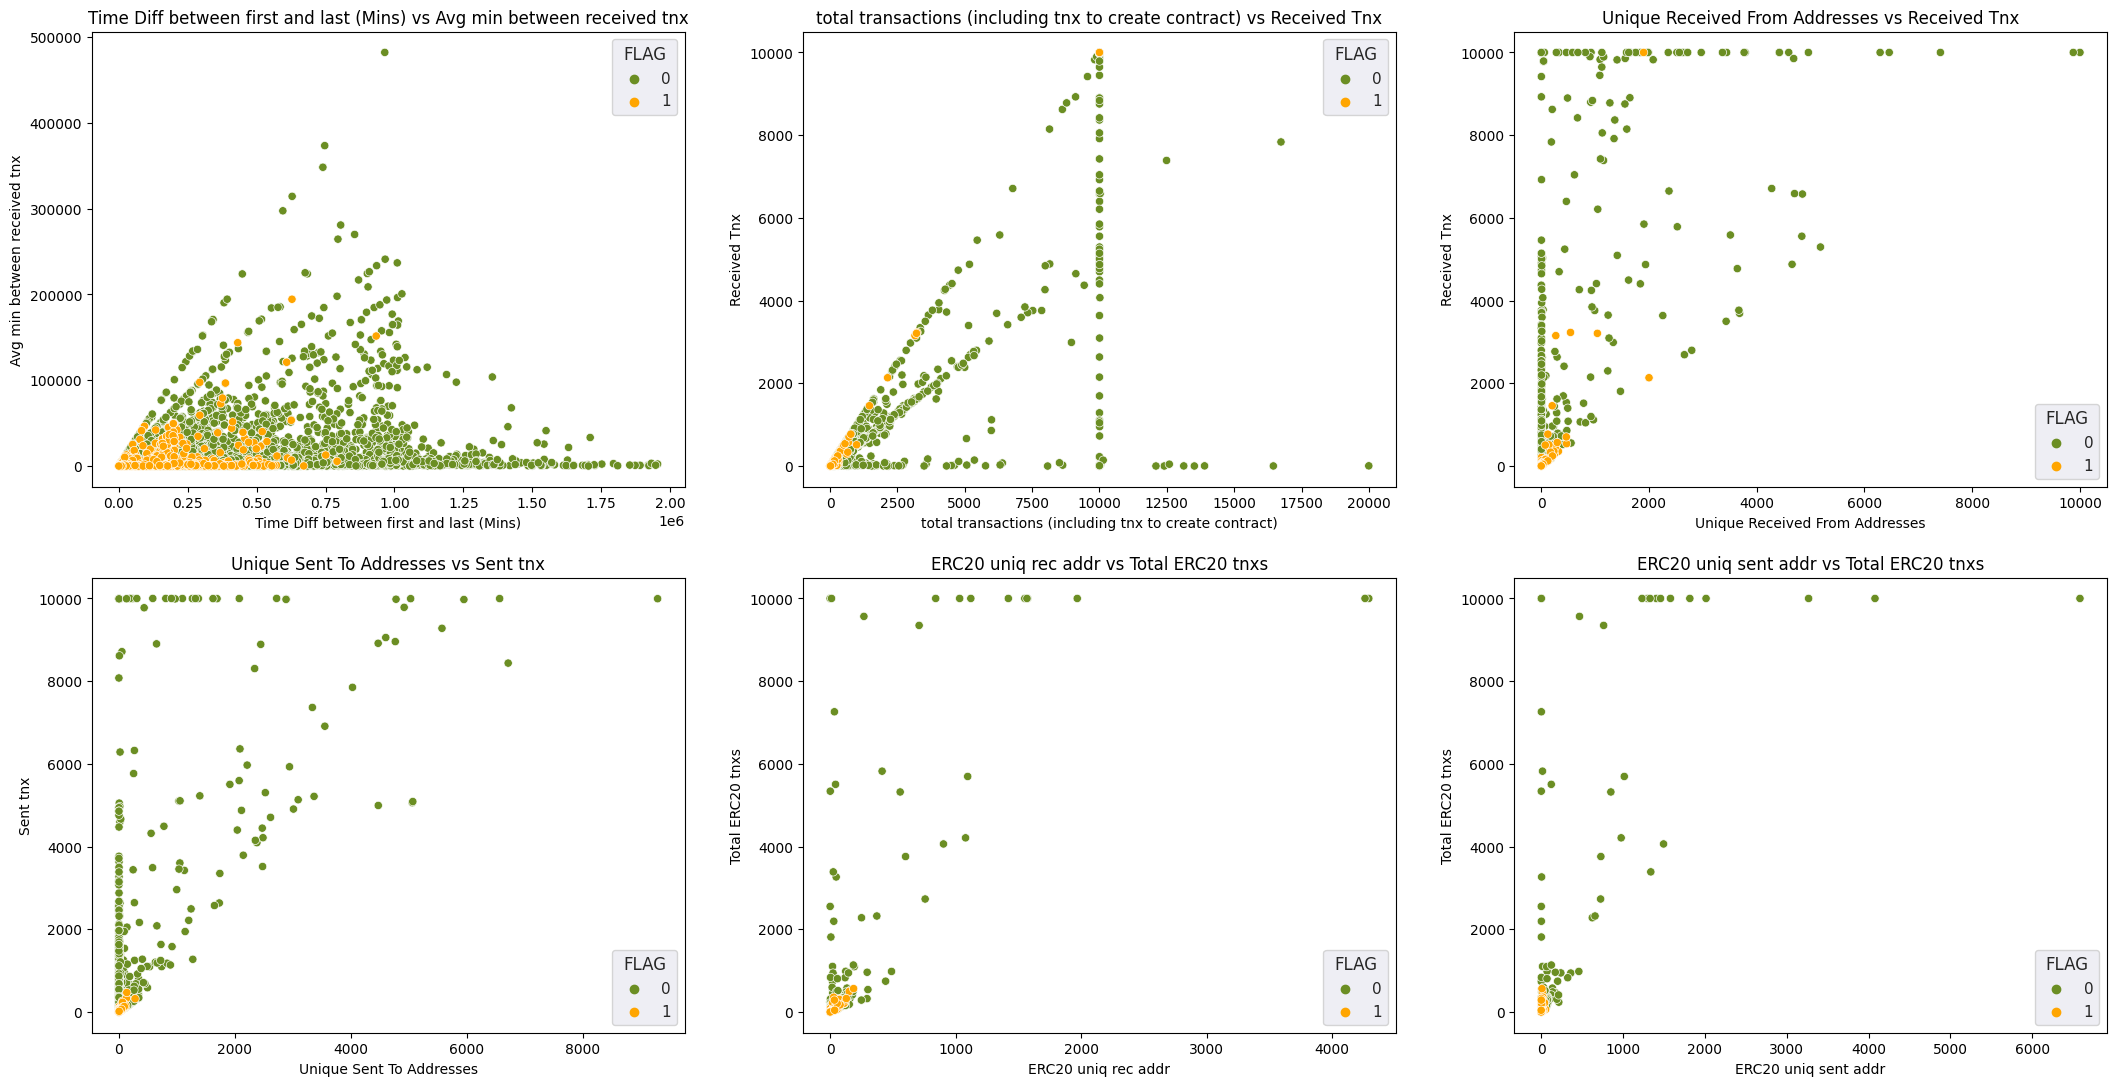

In [52]:
# set the figure size
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(26, 13))

# set the style
sns.set(style='darkgrid')
palette = {0:'olivedrab', 1:'orange'}

# create a list of the columns to use
columns = [('Time Diff between first and last (Mins)', 'Avg min between received tnx'),
           ('total transactions (including tnx to create contract)', 'Received Tnx'),
           ('Unique Received From Addresses', 'Received Tnx'),
           ('Unique Sent To Addresses', 'Sent tnx'),
           ('ERC20 uniq rec addr', 'Total ERC20 tnxs'),
           ('ERC20 uniq sent addr', 'Total ERC20 tnxs')]

# loop through the rows and columns
for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        # get the column names for this axis
        x_col, y_col = columns[i*3+j]
        # create the scatterplot
        sns.scatterplot(data=df, x=x_col, y=y_col, hue='FLAG', hue_order=[0,1], palette=palette, ax=ax)
        # set the title
        ax.set_title(f'{x_col} vs {y_col}')
        
# display the plots
plt.show()

In [53]:
# Dropping correlated data above 0.8

cor_matrix = df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
dropped_cols = set()

for feature in upper_tri.columns:
    if any(upper_tri[feature] > 0.8) and feature != 'total transactions (including tnx to create contract)':
        dropped_cols.add(feature)

print('There are %d dropped columns' %len(dropped_cols))
df = df.drop(dropped_cols,axis=1)
df.head()

There are 8 dropped columns


FLAG  Avg min between sent tnx  Avg min between received tnx  \
0     0                    844.26                       1093.71   
1     0                  12709.07                       2958.44   
2     0                 246194.54                       2434.02   
3     0                  10219.60                      15785.09   
4     0                     36.61                      10707.77   

   Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                704785.63       721            89   
1                               1218216.73        94             8   
2                                516729.30         2            10   
3                                397555.90        25             9   
4                                382472.42      4598            20   

   Number of Created Contracts  Unique Received From Addresses  \
0                            0                              40   
1                            0                               5   
2                            0                              10   
3                            0                               7   
4                            1                               7   

   Unique Sent To Addresses  min value received  ...  Total ERC20 tnxs  \
0                       118            0.000000  ...             265.0   
1                        14            0.000000  ...               8.0   
2                         2            0.113119  ...               8.0   
3                        13            0.000000  ...              14.0   
4                        19            0.000000  ...              42.0   

   ERC20 total Ether received  ERC20 total ether sent  \
0                3.558854e+07            3.560317e+07   
1                4.034283e+02            2.260809e+00   
2                5.215121e+02            0.000000e+00   
3                1.711105e+04            1.141223e+04   
4                1.628297e+05            1.235399e+05   

   ERC20 total Ether sent contract  ERC20 uniq sent addr  ERC20 uniq rec addr  \
0                              0.0                  30.0                 54.0   
1                              0.0                   1.0                  5.0   
2                              0.0                   0.0                  7.0   
3                              0.0                   2.0                 11.0   
4                              0.0                   4.0                 23.0   

   ERC20 uniq sent addr.1  ERC20 uniq rec contract addr  ERC20 min val rec  \
0                     0.0                          58.0                0.0   
1                     0.0                           7.0                0.0   
2                     0.0                           8.0                0.0   
3                     0.0                          11.0                0.0   
4                     0.0                          27.0                0.0   

   ERC20 uniq sent token name  
0                        39.0  
1                         1.0  
2                         0.0  
3                         1.0  
4                         6.0  

[5 rows x 31 columns]

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9288 entries, 0 to 9840
Data columns (total 31 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   FLAG                                                   9288 non-null   int64  
 1   Avg min between sent tnx                               9288 non-null   float64
 2   Avg min between received tnx                           9288 non-null   float64
 3   Time Diff between first and last (Mins)                9288 non-null   float64
 4   Sent tnx                                               9288 non-null   int64  
 5   Received Tnx                                           9288 non-null   int64  
 6   Number of Created Contracts                            9288 non-null   int64  
 7   Unique Received From Addresses                         9288 non-null   int64  
 8   Unique Sent To Addresses                        

In [55]:
# Copy dataframe. It will be useful for later analysis
df_feat_clean = copy.deepcopy(df)

###Dataframe after normalization

<Axes: >

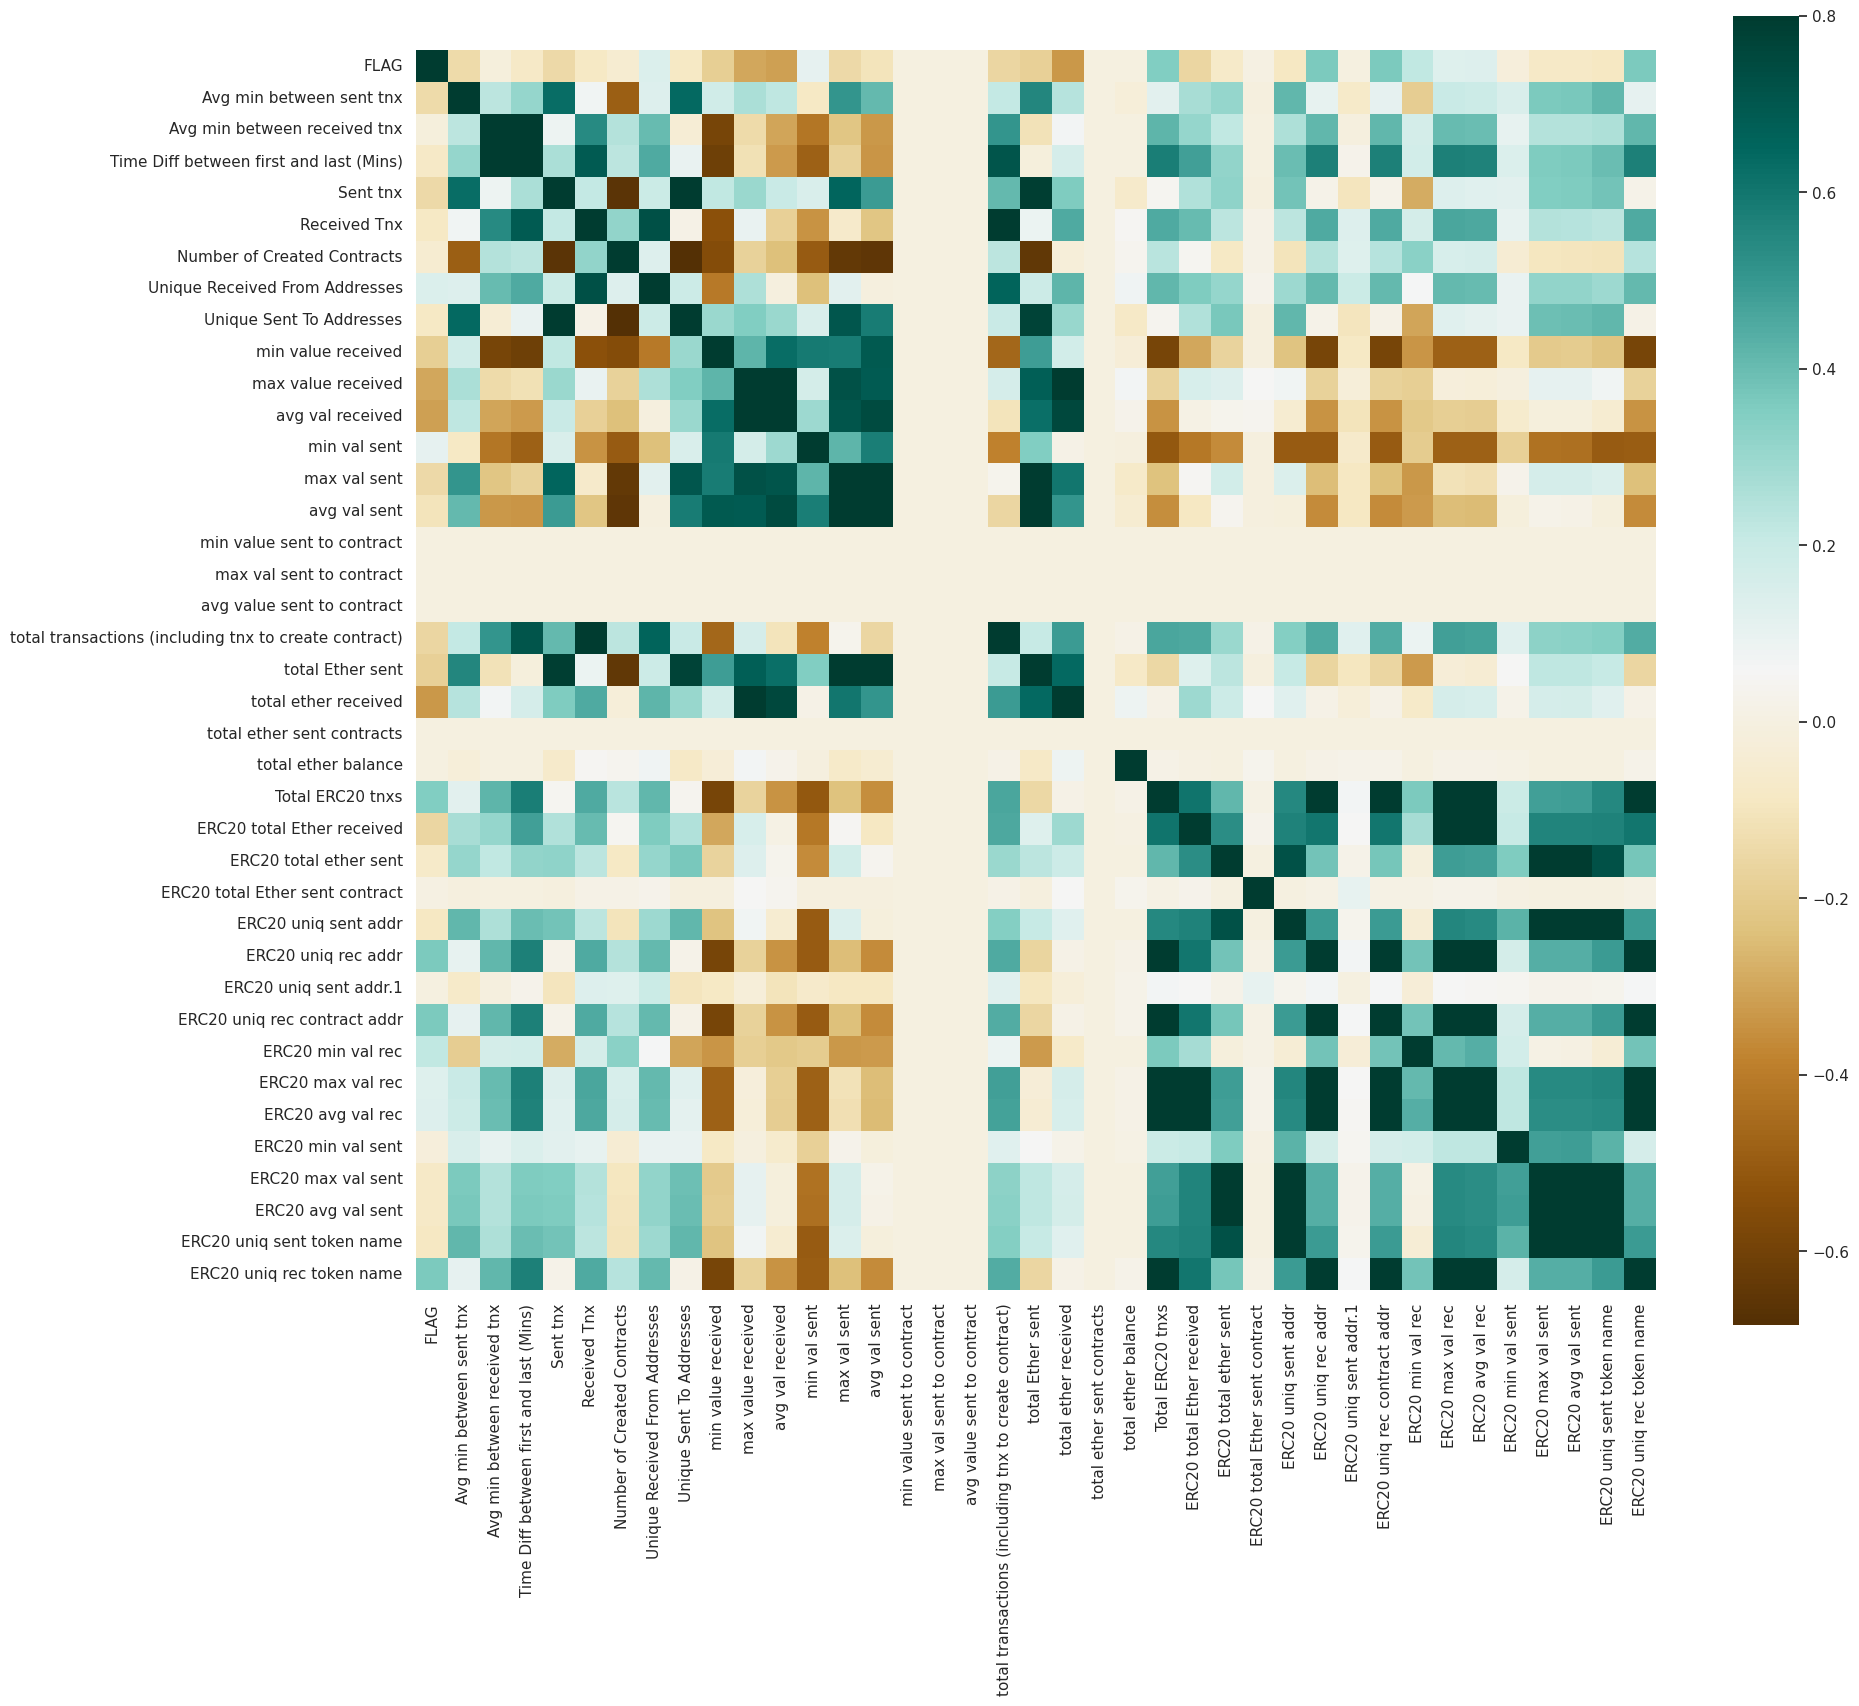

In [56]:
# Correlation matrix visualization
corrmat = df_normalization.corr()
f, ax = plt.subplots(figsize=(20, 17))
sns.heatmap(corrmat, vmax=.8, square=True, cmap=sns.color_palette('BrBG', as_cmap=True))

In [57]:
# See the number of correlation
cor_matrix = df_normalization.corr()
cor_matrix.style.background_gradient(sns.light_palette('green', as_cmap=True))

In [58]:
# Make function to summarise the correlated data above 0.8
def display_high_corr_features(df, threshold=0.8):
    # Compute correlation matrix
    corr_matrix = df_normalization.corr().abs()

    # Select upper triangle of correlation matrix
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find features with correlation above threshold
    high_corr_features = set()
    for feature in upper_tri.columns:
        correlated_features = upper_tri.index[upper_tri[feature] > threshold].tolist()
        if len(correlated_features) > 0:
            correlated_features.append(feature)
            corr_values = [corr_matrix.loc[feature, f] for f in correlated_features]
            high_corr_features.add((tuple(sorted(correlated_features)), tuple(corr_values)))

    # Print results
    if len(high_corr_features) > 0:
        print('Features with correlation above %.2f:' % threshold)
        for features, corr_values in high_corr_features:
            print('%s: %s' % (str(features), str(corr_values)))
    else:
        print('No features with correlation above %.2f' % threshold)

In [59]:
display_high_corr_features(df_normalization)

Features with correlation above 0.80:
('ERC20 max val rec', 'ERC20 total Ether received', 'ERC20 uniq rec addr', 'ERC20 uniq rec contract addr', 'Total ERC20 tnxs'): (0.8726684798407086, 0.8955135442208682, 0.8747027465647076, 0.8766078887111535, 1.0)
('ERC20 avg val sent', 'ERC20 max val sent', 'ERC20 uniq sent addr', 'ERC20 uniq sent token name'): (0.999999100516072, 0.871827475697683, 0.8749147594391292, 1.0)
('Received Tnx', 'total transactions (including tnx to create contract)'): (0.9170071156570537, 1.0)
('ERC20 uniq rec addr', 'Total ERC20 tnxs'): (0.9907182492971603, 1.0)
('Avg min between received tnx', 'Time Diff between first and last (Mins)'): (0.8121020114467067, 1.0)
('ERC20 avg val rec', 'ERC20 max val rec', 'ERC20 uniq rec addr', 'ERC20 uniq rec contract addr', 'ERC20 uniq rec token name', 'Total ERC20 tnxs'): (0.9892122351986614, 0.9985725686652559, 0.9999935579407255, 0.8765280079365622, 0.8758673564600277, 1.0)
('ERC20 avg val sent', 'ERC20 max val sent', 'ERC20 tot

In [60]:
corr_matrix = df_normalization.corr().abs()
high_corr_var_pairs = (corr_matrix.where(np.triu(corr_matrix > 0.8, k=1))
                      .stack().reset_index().rename(columns={0: 'correlation'}))
high_corr_var_pairs = high_corr_var_pairs[high_corr_var_pairs['correlation'] > 0.8]
high_corr_var_pairs

level_0  \
0   Avg min between received tnx   
1                       Sent tnx   
2                   Received Tnx   
3             max value received   
4             max value received   
5                   max val sent   
6                   max val sent   
7                   avg val sent   
8               Total ERC20 tnxs   
9               Total ERC20 tnxs   
10              Total ERC20 tnxs   
11              Total ERC20 tnxs   
12              Total ERC20 tnxs   
13    ERC20 total Ether received   
14    ERC20 total Ether received   
15        ERC20 total ether sent   
16        ERC20 total ether sent   
17          ERC20 uniq sent addr   
18          ERC20 uniq sent addr   
19          ERC20 uniq sent addr   
20           ERC20 uniq rec addr   
21           ERC20 uniq rec addr   
22           ERC20 uniq rec addr   
23           ERC20 uniq rec addr   
24  ERC20 uniq rec contract addr   
25  ERC20 uniq rec contract addr   
26  ERC20 uniq rec contract addr   
27             ERC20 max val rec   
28             ERC20 max val rec   
29             ERC20 avg val rec   
30            ERC20 max val sent   
31            ERC20 max val sent   
32            ERC20 avg val sent   

                                              level_1  correlation  
0             Time Diff between first and last (Mins)     0.812102  
1                            Unique Sent To Addresses     0.869477  
2   total transactions (including tnx to create co...     0.917007  
3                                    avg val received     0.922999  
4                                total ether received     0.893374  
5                                        avg val sent     0.954365  
6                                    total Ether sent     0.959252  
7                                    total Ether sent     0.878379  
8                                 ERC20 uniq rec addr     0.990718  
9                        ERC20 uniq rec contract addr     0.989246  
10                                  ERC20 max val rec     0.872668  
11                                  ERC20 avg val rec     0.870865  
12                          ERC20 uniq rec token name     0.989212  
13                                  ERC20 max val rec     0.895514  
14                                  ERC20 avg val rec     0.891525  
15                                 ERC20 max val sent     0.836152  
16                                 ERC20 avg val sent     0.831889  
17                                 ERC20 max val sent     0.871739  
18                                 ERC20 avg val sent     0.874849  
19                         ERC20 uniq sent token name     0.999999  
20                       ERC20 uniq rec contract addr     0.998573  
21                                  ERC20 max val rec     0.874703  
22                                  ERC20 avg val rec     0.873742  
23                          ERC20 uniq rec token name     0.998573  
24                                  ERC20 max val rec     0.876608  
25                                  ERC20 avg val rec     0.875928  
26                          ERC20 uniq rec token name     0.999994  
27                                  ERC20 avg val rec     0.998753  
28                          ERC20 uniq rec token name     0.876528  
29                          ERC20 uniq rec token name     0.875867  
30                                 ERC20 avg val sent     0.973860  
31                         ERC20 uniq sent token name     0.871827  
32                         ERC20 uniq sent token name     0.874915

After observing, here are the features that correlate with the threshold value of 0.8.

* Time Diff between first and last (Mins)
* Unique Sent To Addresses
* avg val received
* avg val sent
* total transactions (including tnx to create contract)
* total Ether sent
* total ether received
* ERC20 uniq rec addr
* ERC20 uniq rec contract addr
* ERC20 avg val rec
* ERC20 min val sent
* ERC20 max val sent
* ERC20 avg val sent
* ERC20 uniq sent token name
* ERC20 uniq rec token name

We need to drop these columns, except `ERC20 uniq rec addr` because has the most highly correlated with `FLAG`.

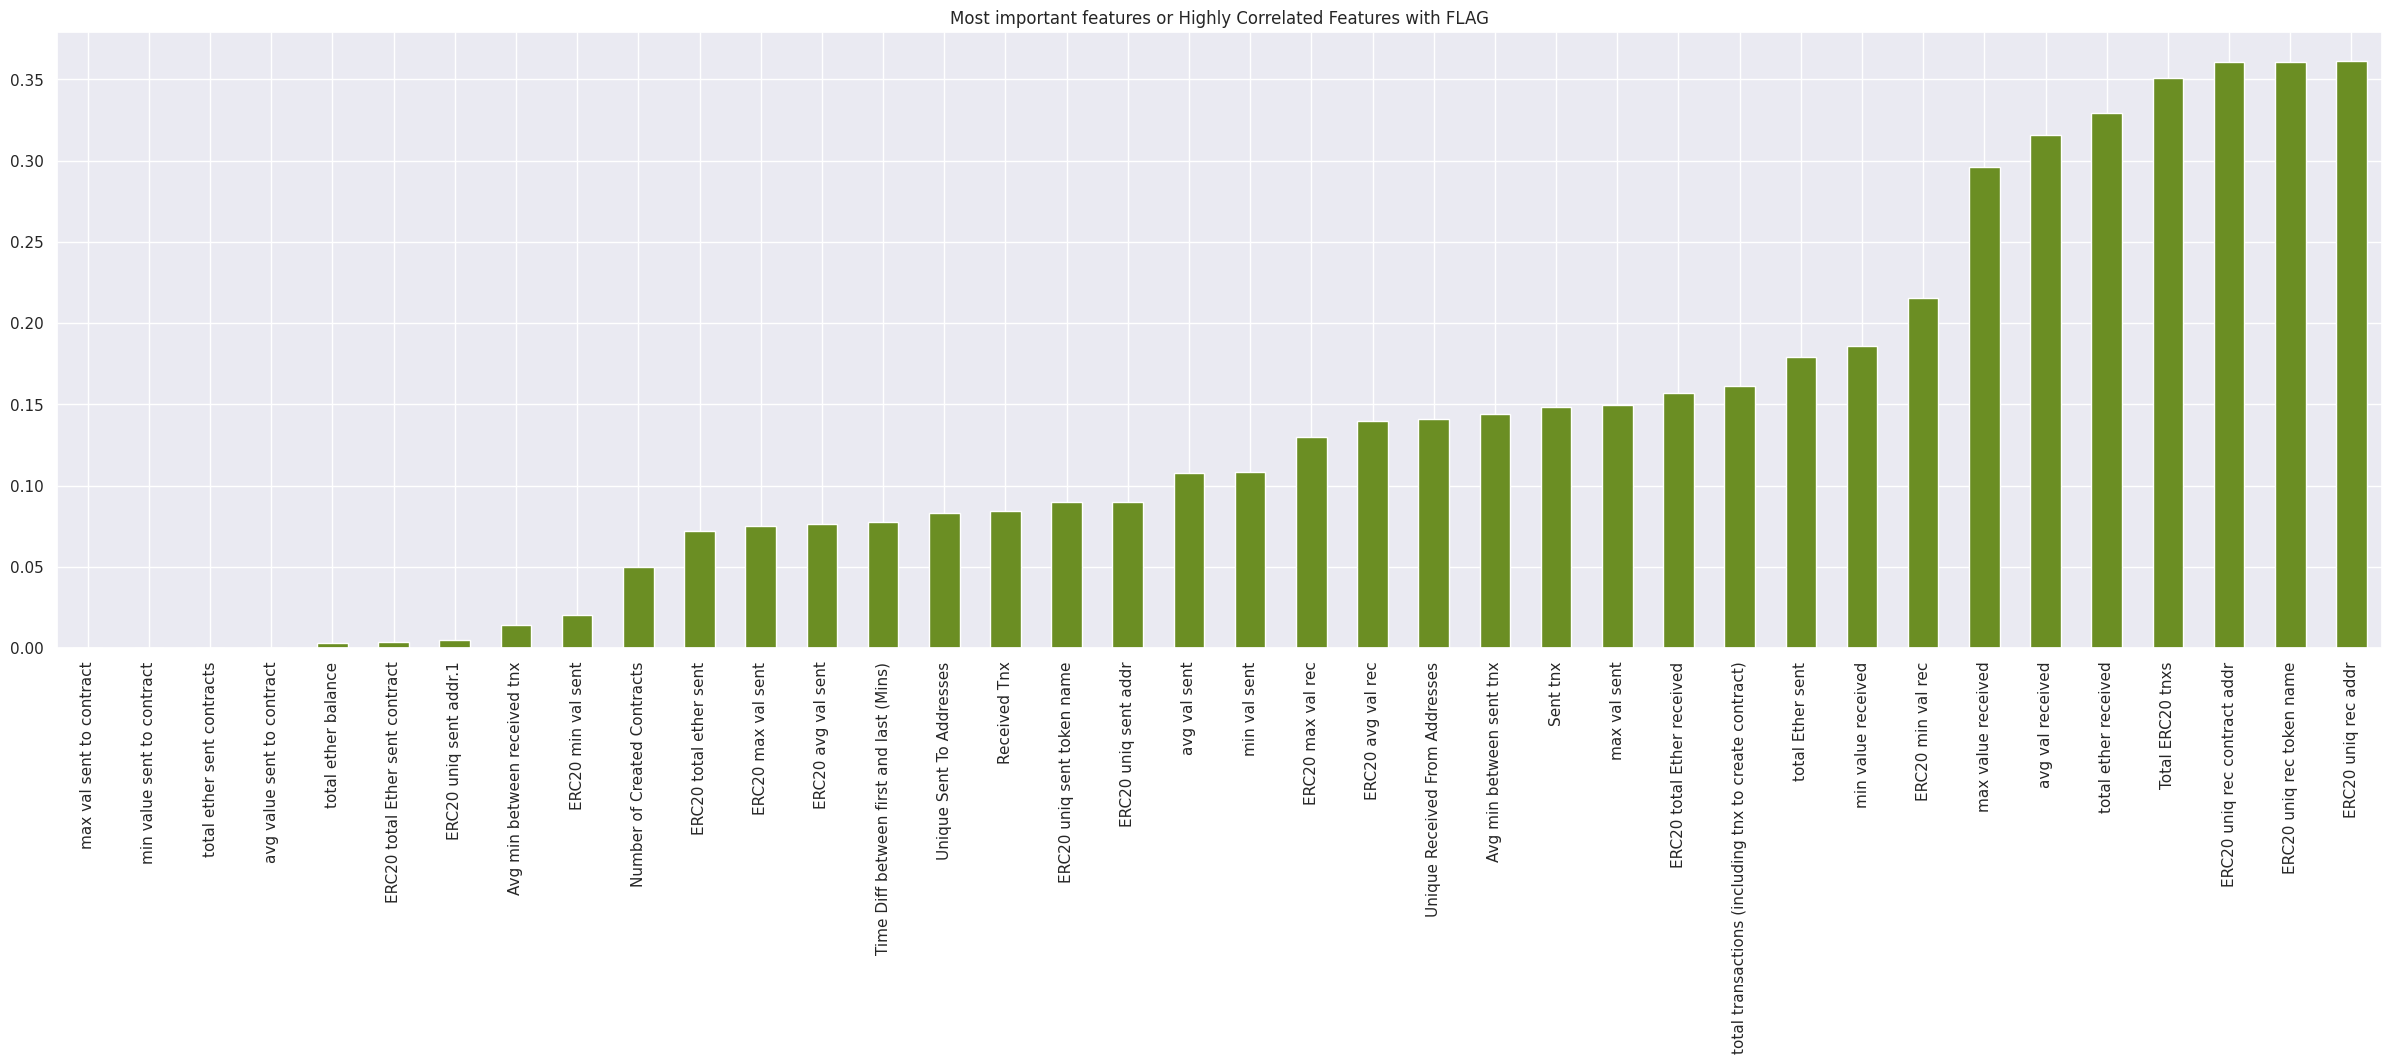

In [61]:
# Barchart to visualize
plt.figure(figsize=(30,8))
d = df_normalization.corr()['FLAG'][1:].abs().sort_values().plot(kind='bar', color='olivedrab', title='Most important features or Highly Correlated Features with FLAG')
plt.show()

In [62]:
# Show the high value correlated with FLAG
c = df_normalization.corr()['FLAG'][1:].sort_values()
c

total ether received                                    -0.329628
avg val received                                        -0.316095
max value received                                      -0.296267
min value received                                      -0.185913
total Ether sent                                        -0.179116
total transactions (including tnx to create contract)   -0.161199
ERC20 total Ether received                              -0.156980
max val sent                                            -0.149507
Sent tnx                                                -0.148596
Avg min between sent tnx                                -0.143778
avg val sent                                            -0.107648
ERC20 uniq sent addr                                    -0.089752
ERC20 uniq sent token name                              -0.089676
Received Tnx                                            -0.084527
Unique Sent To Addresses                                -0.083271
Time Diff 

In [63]:
# Dropping correlated data above 0.8

cor_matrix = df_normalization.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
dropped_cols = set()

for feature in upper_tri.columns:
    if any(upper_tri[feature] > 0.8) and feature != 'ERC20 uniq rec addr':
        dropped_cols.add(feature)

print('There are %d dropped columns' %len(dropped_cols))
df_normalization = df_normalization.drop(dropped_cols,axis=1)
df_normalization.head()

There are 14 dropped columns


FLAG  Avg min between sent tnx  Avg min between received tnx   Sent tnx  \
0     0                  7.764836                      9.503483   9.223505   
1     0                 11.549569                     11.363912   5.715118   
2     0                 16.198893                     10.986839   0.717087   
3     0                 11.229438                     14.865091   3.780756   
4     0                  3.880549                     14.009496  13.078550   

   Received Tnx  Number of Created Contracts  Unique Received From Addresses  \
0      4.164190                 -1192.221386                        3.628464   
1      2.007926                 -1192.221386                        1.597866   
2      2.215116                 -1192.221386                        2.278948   
3      2.117483                 -1192.221386                        1.929011   
4      2.848811                     0.000000                        1.929011   

   min value received  max value received  min val sent  ...  \
0           -9.239575            4.274912     -8.606606  ...   
1           -9.239575            0.987478     -8.606606  ...   
2           -2.180949            0.153782     -2.929891  ...   
3           -9.239575            7.462344     -8.606606  ...   
4           -9.239575            2.744896     -8.606606  ...   

   total ether balance  Total ERC20 tnxs  ERC20 total Ether received  \
0          -279.224419          5.429996                   18.501959   
1            -0.001819          2.058408                    6.129137   
2             0.000441          2.058408                    6.397244   
3          -854.646303          2.605241                   10.091363   
4           -50.896986          3.670079                   12.524492   

   ERC20 total ether sent  ERC20 total Ether sent contract  \
0               11.461934                        -9.478785   
1                0.798730                        -9.478785   
2              -11.802646                        -9.478785   
3                7.406458                        -9.478785   
4                8.787628                        -9.478785   

   ERC20 uniq sent addr  ERC20 uniq rec addr  ERC20 uniq sent addr.1  \
0              1.534612             3.976726          -3.267596e+141   
1              0.000000             1.607440          -3.267596e+141   
2           -290.465350             1.942990          -3.267596e+141   
3              0.575969             2.393462          -3.267596e+141   
4              0.968844             3.127917          -3.267596e+141   

   ERC20 min val rec  ERC20 min val sent  
0         -54.821291          -55.120637  
1         -54.821291            0.718940  
2         -54.821291          -55.120637  
3         -54.821291            2.424150  
4         -54.821291          -55.120637  

[5 rows x 25 columns]

In [64]:
df_normalization.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9288 entries, 0 to 9840
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   FLAG                             9288 non-null   int64  
 1   Avg min between sent tnx         9288 non-null   float64
 2   Avg min between received tnx     9288 non-null   float64
 3   Sent tnx                         9288 non-null   float64
 4   Received Tnx                     9288 non-null   float64
 5   Number of Created Contracts      9288 non-null   float64
 6   Unique Received From Addresses   9288 non-null   float64
 7   min value received               9288 non-null   float64
 8   max value received               9288 non-null   float64
 9   min val sent                     9288 non-null   float64
 10  max val sent                     9288 non-null   float64
 11  min value sent to contract       9288 non-null   float64
 12  max val sent to cont

#Imbalanced Data Handling

In [65]:
# Cross Validation
# Set the number of folds for StratifiedKFold
n_splits = 10

# Create a StratifiedKFold object
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

In [66]:
# Make function to see the result after modelling
def evaluate(MODEL, X_TEST, Y_TEST, X_TRAIN, Y_TRAIN):
    y_pred_train = MODEL.predict(X_TRAIN)
    print('======= Data Train =======')
    print('\033[1m\033[92mAccuracy Data Train:\033[0m', accuracy_score(Y_TRAIN, y_pred_train))
    print('\033[1m\033[92mAUC Data Train:\033[0m', roc_auc_score(Y_TRAIN, y_pred_train))
    print('------')
    print('Confusion Matrix Data Train:')
    print()
    print(classification_report(Y_TRAIN, y_pred_train))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(Y_TRAIN, y_pred_train).ravel()
    print('Assuming 1 as positive, we get for Data Train:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('\033[1m\033[92mPrecision Data Train:\033[0m', precision)
    print('\033[1m\033[92mRecall Data Train:\033[0m', recall)
    print('\033[1m\033[92mF1-Score Data Train:\033[0m', 2 * (precision * recall)/(precision + recall))
    
    y_pred = MODEL.predict(X_TEST)
    print('\n======= Data Test =======')
    print('\033[1m\033[92mAccuracy Data Test:\033[0m', accuracy_score(Y_TEST, y_pred))
    print('\033[1m\033[92mAUC Data Test:\033[0m', roc_auc_score(Y_TEST, y_pred))
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(Y_TEST, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(Y_TEST, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('\033[1m\033[92mPrecision Data Test:\033[0m', precision)
    print('\033[1m\033[92mRecall Data Test:\033[0m', recall)
    print('\033[1m\033[92mF1-Score Data Test:\033[0m', 2 * (precision * recall)/(precision + recall))

##Random Undersampling

Use dataframe after df_feat_clean feature engineering.

In [67]:
# See the frequency of the target (FLAG)
target = df_feat_clean['FLAG'].value_counts().reset_index()
target.rename(columns={'index':'FLAG','FLAG':'freq'}, inplace=True)
target['percentage'] = round((target['freq']/target['freq'].sum())*100,3)
target

FLAG  freq  percentage
0     0  7632      82.171
1     1  1656      17.829

###Without normalization

In [68]:
# X and y are dataset and target variables
X_under = df_feat_clean.drop('FLAG', axis=1)
y_under = df_feat_clean['FLAG']

from sklearn.model_selection import train_test_split

# Split data into training data and test data with a ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

In [69]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (7430, 30)
Number transactions y_train dataset:  (7430,)
Number transactions X_test dataset:  (1858, 30)
Number transactions y_test dataset:  (1858,)


In [70]:
print("Before UnderSampling, counts of label Fraud: {}".format(sum(y_train==1)))
print("Before UnderSampling, counts of label Not Fraud: {} \n".format(sum(y_train==0)))

from imblearn.under_sampling import RandomUnderSampler

# Apply random undersampling to the training data
rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

print('After UnderSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After UnderSampling, counts of label Fraud: {}".format(sum(y_train_res==1)))
print("After UnderSampling, counts of label Not Fraud: {}".format(sum(y_train_res==0)))

Before UnderSampling, counts of label '1': 1326
Before UnderSampling, counts of label '0': 6104 

After UnderSampling, the shape of train_X: (2652, 30)
After UnderSampling, the shape of train_y: (2652,) 

After UnderSampling, counts of label '1': 1326
After UnderSampling, counts of label '0': 1326


###After normalization

Use dataset df_normalization.

In [71]:
# X and y are dataset and target variables
X_under_normal = df_normalization.drop('FLAG', axis=1)
y_under_normal = df_normalization['FLAG']

from sklearn.model_selection import train_test_split

# Split data into training data and test data with a ratio of 80:20
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_under_normal, y_under_normal, test_size=0.2, random_state=42)

In [72]:
print("Number transactions X_train_normal dataset: ", X_train_normal.shape)
print("Number transactions y_train_normal dataset: ", y_train_normal.shape)
print("Number transactions X_test_normal dataset: ", X_test_normal.shape)
print("Number transactions y_test_normal dataset: ", y_test_normal.shape)

Number transactions X_train_normal dataset:  (7430, 24)
Number transactions y_train_normal dataset:  (7430,)
Number transactions X_test_normal dataset:  (1858, 24)
Number transactions y_test_normal dataset:  (1858,)


In [73]:
print("Before UnderSampling, counts of label Fraud: {}".format(sum(y_train_normal==1)))
print("Before UnderSampling, counts of label Not Fraud: {} \n".format(sum(y_train_normal==0)))

from imblearn.under_sampling import RandomUnderSampler

# Apply random undersampling to the training data
rus = RandomUnderSampler(random_state=42)
X_train_res_normal, y_train_res_normal = rus.fit_resample(X_train_normal, y_train_normal)

print('After UnderSampling, the shape of train_X: {}'.format(X_train_res_normal.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_res_normal.shape))

print("After UnderSampling, counts of label Fraud: {}".format(sum(y_train_res_normal==1)))
print("After UnderSampling, counts of label Not Fraud: {}".format(sum(y_train_res_normal==0)))

Before UnderSampling, counts of label '1': 1326
Before UnderSampling, counts of label '0': 6104 

After UnderSampling, the shape of train_X: (2652, 24)
After UnderSampling, the shape of train_y: (2652,) 

After UnderSampling, counts of label '1': 1326
After UnderSampling, counts of label '0': 1326


By balancing the dataframe, we have ensured that the model will not be biased towards a particular FLAG and will be able to learn equally from both FLAGs, which will lead to better results during analysis and data preprocessing.

###Modelling

In [74]:
# Install catboost
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
from catboost import CatBoostClassifier

In [76]:
# Let's implement the classifiers

classifiers = {
    "Logisitic Regression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "XGBoost Classifier": XGBClassifier(),
    "Light GBM Classifier": LGBMClassifier(),
    "Cat Boost Classifier": CatBoostClassifier(verbose=False),
}

In [77]:
# Let's implement the classifiers

classifiers_normal = {
    "Logisitic Regression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
}

In [78]:
# Wow our scores are getting even high scores even when applying cross validation (dataset without normalization)

for key, classifier in classifiers.items():
    classifier.fit(X_train_res, y_train_res)
    training_score = cross_val_score(classifier, X_train_res, y_train_res, cv=skf)
    print("Classifier:", classifier.__class__.__name__, "has a training score of", round(training_score.mean(), 6) * 100, "% accuracy score")

Classifier: LogisticRegression has a training score of 52.412800000000004 % accuracy score
Classifier: KNeighborsClassifier has a training score of 81.8635 % accuracy score
Classifier: XGBClassifier has a training score of 96.5317 % accuracy score
Classifier: DecisionTreeClassifier has a training score of 93.8161 % accuracy score
Classifier: RandomForestClassifier has a training score of 96.4186 % accuracy score
Classifier: GradientBoostingClassifier has a training score of 96.90910000000001 % accuracy score
Classifier: LGBMClassifier has a training score of 97.0217 % accuracy score
Classifier: CatBoostClassifier has a training score of 97.3233 % accuracy score


In [79]:
# Evaluation

for key, classifier in classifiers.items():
    classifier.fit(X_train_res, y_train_res)
    y_pred = classifier.predict(X_test)
    test_score = accuracy_score(y_test, y_pred)
    print("Classifier:", classifier.__class__.__name__, "has a test score of", round(test_score, 6) * 100, "% accuracy score")

Classifier: LogisticRegression has a test score of 82.23899999999999 % accuracy score
Classifier: KNeighborsClassifier has a test score of 80.7858 % accuracy score
Classifier: XGBClassifier has a test score of 97.52420000000001 % accuracy score
Classifier: DecisionTreeClassifier has a test score of 94.2411 % accuracy score
Classifier: RandomForestClassifier has a test score of 96.17869999999999 % accuracy score
Classifier: GradientBoostingClassifier has a test score of 96.6631 % accuracy score
Classifier: LGBMClassifier has a test score of 97.4704 % accuracy score
Classifier: CatBoostClassifier has a test score of 97.7933 % accuracy score


In [80]:
# Applying cross validation (dataset after normalization)

for key, classifier in classifiers_normal.items():
    classifier.fit(X_train_res_normal, y_train_res_normal)
    training_score = cross_val_score(classifier, X_train_res_normal, y_train_res_normal, cv=skf)
    print("Classifier:", classifier.__class__.__name__, "has a training score of", round(training_score.mean(), 6) * 100, "% accuracy score")

Classifier: LogisticRegression has a training score of 50.0 % accuracy score
Classifier: KNeighborsClassifier has a training score of 50.0 % accuracy score


In [81]:
# Evaluation

for key, classifier in classifiers_normal.items():
    classifier.fit(X_train_res_normal, y_train_res_normal)
    y_pred = classifier.predict(X_test_normal)
    test_score = accuracy_score(y_test_normal, y_pred)
    print("Classifier:", classifier.__class__.__name__, "has a test score of", round(test_score, 6) * 100, "% accuracy score")

Classifier: LogisticRegression has a test score of 82.23899999999999 % accuracy score
Classifier: KNeighborsClassifier has a test score of 82.23899999999999 % accuracy score


GridSearchCV is a powerful tool for finding the optimal combination of hyperparameters that can maximize the performance of a machine learning model. Let's try for each model!

In [82]:
from sklearn.model_selection import GridSearchCV

####Without normalization

#####Logistic Regression

In [83]:
# Define the estimator/model (Logistic Regression) with parameters tuning
log_reg_params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params, cv=skf)

# Fit and train the classifier and get the training history on training data that has been randomly undersampled
grid_log_reg.fit(X_train_res, y_train_res)

# We automatically get the logistic regression with the best parameters
log_reg = grid_log_reg.best_estimator_

# Instantiate the models
log_reg_score = cross_val_score(log_reg, X_under, y_under, cv=skf,)

# Print the cross-validation scores (overfitting case)
print('Logistic Regression cross-validation scores:', log_reg_score)
print('Mean score:', np.mean(log_reg_score))

# Evaluate the model on the test data
score = log_reg.score(X_test, y_test)
print(f'Score: {score:.4f}')


Logistic Regression cross-validation scores: [0.82238967 0.82238967 0.82131324 0.82238967 0.82454252 0.82131324
 0.82131324 0.82131324 0.82219828 0.82219828]
Mean score: 0.82213610296574
Score: 0.8229


In [84]:
evaluate(grid_log_reg, X_TEST = X_test, Y_TEST = y_test, X_TRAIN = X_train_res, Y_TRAIN = y_train_res)

======= Data Train =======
Accuracy Data Train: 0.5086726998491704
AUC Data Train: 0.5086726998491704
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1326
           1       1.00      0.02      0.03      1326

    accuracy                           0.51      2652
   macro avg       0.75      0.51      0.35      2652
weighted avg       0.75      0.51      0.35      2652

------
Assuming 1 as positive, we get for Data Train:

True Positive: 23
True Negative: 1326
False Positive: 0
False Negative: 1303

Precision Data Train: 1.0
Recall Data Train: 0.017345399698340876
F1-Score Data Train: 0.03409933283914011

======= Data Test =======
Accuracy Data Test: 0.8229278794402584
AUC Data Test: 0.5062668570521973
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1528
           1       0.56      0.02      0.03       330

    

#####K-NN

In [85]:
# Define the estimator/model (K-NN) with parameters tuning
knears_params = {'n_neighbors': list(range(2,8,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params, cv=skf)

# Fit and train the classifier and get the training history
grid_knears.fit(X_train_res, y_train_res)

# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Instantiate the models
knn_score = cross_val_score(knears_neighbors, X_under, y_under, cv=skf)

# Print the cross-validation scores (overfitting case)
print('K-NN cross-validation scores:', knn_score)
print('Mean score:', np.mean(knn_score))

# Evaluate the model on the test data
score = knears_neighbors.score(X_test, y_test)
print(f'Score: {score:.4f}')

K-NN cross-validation scores: [0.88051668 0.89881593 0.89020452 0.88697524 0.88266954 0.87944026
 0.87621098 0.87944026 0.88577586 0.89655172]
Mean score: 0.8856600998478156
Score: 0.8089


In [86]:
evaluate(grid_knears, X_TEST = X_test, Y_TEST = y_test, X_TRAIN = X_train_res, Y_TRAIN = y_train_res)

======= Data Train =======
Accuracy Data Train: 0.861236802413273
AUC Data Train: 0.8612368024132729
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1326
           1       0.86      0.87      0.86      1326

    accuracy                           0.86      2652
   macro avg       0.86      0.86      0.86      2652
weighted avg       0.86      0.86      0.86      2652

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1151
True Negative: 1133
False Positive: 193
False Negative: 175

Precision Data Train: 0.8563988095238095
Recall Data Train: 0.8680241327300151
F1-Score Data Train: 0.8621722846441947

======= Data Test =======
Accuracy Data Test: 0.8089343379978472
AUC Data Test: 0.8232508329366968
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.96      0.80      0.87      1528
           1       0.48      0.85      0.61  

#####Decision Tree Classifier

In [87]:
# Define the estimator/model (Decision Tree Classifier) with parameters tuning
tree_params = {'criterion': ['gini', 'entropy'], 'max_depth': list(range(2,4,1)), 
              'min_samples_leaf': list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=skf)

# Fit and train the classifier and get the training history
grid_tree.fit(X_train_res, y_train_res)

# Decision Tree best estimator
dt_clf = grid_tree.best_estimator_

# Instantiate the models
dt_score = cross_val_score(dt_clf, X_under, y_under, cv=skf)

# Print the cross-validation scores (overfitting case)
print('Decision Tree Classifier cross-validation scores:', dt_score)
print('Mean score:', np.mean(dt_score))

# Evaluate the model on the test data
score = dt_clf.score(X_test, y_test)
print(f'Score: {score:.4f}')

Decision Tree Classifier cross-validation scores: [0.94187298 0.92465016 0.93649085 0.92142088 0.9386437  0.93326157
 0.93649085 0.92249731 0.94935345 0.94073276]
Mean score: 0.9345414516907317
Score: 0.9064


In [88]:
evaluate(dt_clf, X_test, y_test, X_train_res, y_train_res)

======= Data Train =======
Accuracy Data Train: 0.9110105580693816
AUC Data Train: 0.9110105580693815
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1326
           1       0.90      0.92      0.91      1326

    accuracy                           0.91      2652
   macro avg       0.91      0.91      0.91      2652
weighted avg       0.91      0.91      0.91      2652

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1219
True Negative: 1197
False Positive: 129
False Negative: 107

Precision Data Train: 0.9043026706231454
Recall Data Train: 0.9193061840120663
F1-Score Data Train: 0.9117427075542258

======= Data Test =======
Accuracy Data Test: 0.9063509149623251
AUC Data Test: 0.9086129620815484
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1528
           1       0.67      0.91      0.78 

#####Random Forest Classifier

In [89]:
# Define the estimator/model (Decision Tree Classifier) with parameters tuning
rf_params = {'criterion': ['gini', 'entropy'], 'max_depth': list(range(2,4,1)), 
              'min_samples_leaf': list(range(5,7,1))}
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params, cv=skf)

# Fit and train the classifier and get the training history
grid_rf.fit(X_train_res, y_train_res)

# RandomForest best estimator
rf_clf = grid_rf.best_estimator_

# Instantiate the models
rf_score = cross_val_score(rf_clf, X_under, y_under, cv=skf)

# Print the cross-validation scores (overfitting case)
print('Random Forest cross-validation scores:', rf_score)
print('Mean score:', np.mean(rf_score))

# Evaluate the model on the test data
score = rf_clf.score(X_test, y_test)
print(f'Score: {score:.4f}')

Random Forest cross-validation scores: [0.93649085 0.93972013 0.93756728 0.93972013 0.94079656 0.93218515
 0.94187298 0.93003229 0.93211207 0.93857759]
Mean score: 0.9369075015775212
Score: 0.8994


In [90]:
evaluate(rf_clf, X_test, y_test, X_train_res, y_train_res)

======= Data Train =======
Accuracy Data Train: 0.9291101055806938
AUC Data Train: 0.929110105580694
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1326
           1       0.91      0.96      0.93      1326

    accuracy                           0.93      2652
   macro avg       0.93      0.93      0.93      2652
weighted avg       0.93      0.93      0.93      2652

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1267
True Negative: 1197
False Positive: 129
False Negative: 59

Precision Data Train: 0.9075931232091691
Recall Data Train: 0.9555052790346908
F1-Score Data Train: 0.9309331373989713

======= Data Test =======
Accuracy Data Test: 0.8993541442411195
AUC Data Test: 0.9162382992225924
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1528
           1       0.65      0.94      0.77   

#####Gradient Boosting Classifier

In [91]:
# Define the estimator/model (Gradient Boosting Classifier) with parameters tuning
gbt_params = {'loss': ['deviance', 'exponential'], 'max_depth': list(range(2,4,1)), 
              'min_samples_leaf': list(range(5,7,1))}
grid_gbt = GridSearchCV(GradientBoostingClassifier(), gbt_params, cv=skf)

# Fit and train the classifier and get the training history
grid_gbt.fit(X_train_res, y_train_res)

# GBT best estimator
gbt_clf = grid_gbt.best_estimator_

# Instantiate the models
gbt_score = cross_val_score(gbt_clf, X_under, y_under, cv=skf)

# Print the cross-validation scores (overfitting case)
print('Gradient Boosting cross-validation scores:', gbt_score)
print('Mean score:', np.mean(gbt_score))

# Evaluate the model on the test data
score = gbt_clf.score(X_test, y_test)
print(f'Score: {score:.4f}')

Gradient Boosting cross-validation scores: [0.99031216 0.98170075 0.98277718 0.97739505 0.9752422  0.98385361
 0.98600646 0.9795479  0.98814655 0.97413793]
Mean score: 0.9819119789540105
Score: 0.9661


In [92]:
evaluate(gbt_clf, X_test, y_test, X_train_res, y_train_res)

======= Data Train =======
Accuracy Data Train: 0.9879336349924586
AUC Data Train: 0.9879336349924586
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1326
           1       0.98      0.99      0.99      1326

    accuracy                           0.99      2652
   macro avg       0.99      0.99      0.99      2652
weighted avg       0.99      0.99      0.99      2652

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1316
True Negative: 1304
False Positive: 22
False Negative: 10

Precision Data Train: 0.9835575485799701
Recall Data Train: 0.9924585218702866
F1-Score Data Train: 0.987987987987988

======= Data Test =======
Accuracy Data Test: 0.9660925726587729
AUC Data Test: 0.9734451848326193
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1528
           1       0.85      0.98      0.91    

#####XGBoost Classifier

In [93]:
# Define the estimator/model (XGBoost (Extreme Gradient Boosting) Classifier) with parameters tuning
xgb_params = {'objective': ['binary:logistic'], 'max_depth': list(range(2,4,1))}
grid_xgb = GridSearchCV(XGBClassifier(), xgb_params, cv=skf)

# Fit and train the classifier and get the training history
grid_xgb.fit(X_train_res, y_train_res, early_stopping_rounds=10, eval_set=[(X_train_res, y_train_res), (X_test, y_test)], eval_metric='logloss', verbose=False)

# XGBoost best estimator
xgb_clf = grid_xgb.best_estimator_

# Instantiate the models
xgb_score = cross_val_score(xgb_clf, X_under, y_under, cv=skf)

# Print the cross-validation scores (overfitting case)
print('XGBoost Classifier cross-validation scores:', xgb_score)
print('Mean score:', np.mean(xgb_score))

# Evaluate the model on the test data
score = xgb_clf.score(X_test, y_test)
print(f'Score: {score:.4f}')

XGBoost Classifier cross-validation scores: [0.98815931 0.98815931 0.98385361 0.98277718 0.98062433 0.98385361
 0.98600646 0.98815931 0.98383621 0.9762931 ]
Mean score: 0.9841722421216733
Score: 0.9693


In [94]:
evaluate(xgb_clf, X_test, y_test, X_train_res, y_train_res)

======= Data Train =======
Accuracy Data Train: 0.9939668174962293
AUC Data Train: 0.9939668174962293
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1326
           1       0.99      1.00      0.99      1326

    accuracy                           0.99      2652
   macro avg       0.99      0.99      0.99      2652
weighted avg       0.99      0.99      0.99      2652

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1321
True Negative: 1315
False Positive: 11
False Negative: 5

Precision Data Train: 0.9917417417417418
Recall Data Train: 0.9962292609351433
F1-Score Data Train: 0.9939804364183596

======= Data Test =======
Accuracy Data Test: 0.9693218514531755
AUC Data Test: 0.9742206092336982
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1528
           1       0.86      0.98      0.92    

#####LightGBM Classifier

In [95]:
%%time
# Define the estimator/model ((Light Gradient Boosting Machine) Classifier) with parameters tuning
lgbm_params = {'num_leaves': list(range(20, 50, 5)), 'learning_rate': [0.01, 0.1, 1.0], 
               'max_depth': [-1, 5, 10], 'n_estimators': [100, 500, 1000]}
grid_lgbm = GridSearchCV(LGBMClassifier(), lgbm_params, cv=skf)

# Fit and train the classifier and get the training history
grid_lgbm.fit(X_train_res, y_train_res, early_stopping_rounds=10, eval_set=[(X_train_res, y_train_res), (X_test, y_test)], eval_metric='logloss', verbose=False)

# LGBM best estimator
lgbm_clf = grid_lgbm.best_estimator_

# Instantiate the models
lgbm_score = cross_val_score(lgbm_clf, X_under, y_under, cv=skf)

# Print the cross-validation scores (overfitting case)
print('Light GBM cross-validation scores:', lgbm_score)
print('Mean score:', np.mean(lgbm_score))

# Evaluate the model on the test data
score = lgbm_clf.score(X_test, y_test)
print(f'Score: {score:.4f}')

Light GBM cross-validation scores: [0.99031216 0.99031216 0.98708288 0.98708288 0.98600646 0.99031216
 0.99138859 0.98493003 0.98383621 0.98599138]
Mean score: 0.9877254927434024
Score: 0.9720
CPU times: user 18min 15s, sys: 27 s, total: 18min 42s
Wall time: 10min 21s


In [96]:
evaluate(lgbm_clf, X_TEST = X_test, Y_TEST = y_test, X_TRAIN = X_train_res, Y_TRAIN = y_train_res)

======= Data Train =======
Accuracy Data Train: 0.9984917043740573
AUC Data Train: 0.9984917043740573
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1326
           1       1.00      1.00      1.00      1326

    accuracy                           1.00      2652
   macro avg       1.00      1.00      1.00      2652
weighted avg       1.00      1.00      1.00      2652

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1324
True Negative: 1324
False Positive: 2
False Negative: 2

Precision Data Train: 0.9984917043740573
Recall Data Train: 0.9984917043740573
F1-Score Data Train: 0.9984917043740573

======= Data Test =======
Accuracy Data Test: 0.9720129171151776
AUC Data Test: 0.9794205140409328
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1528
           1       0.87      0.99      0.93     

#####Cat Boost Classifier

In [97]:
%%time
# Define the estimator/model (Cat Boosting Classifier) with parameters tuning
catboost_params = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 8], 'iterations': [500, 1000]}
catboost_grid = GridSearchCV(CatBoostClassifier(verbose=False), catboost_params, cv=skf)

# Fit and train the classifier and get the training history
catboost_grid.fit(X_train_res, y_train_res, eval_set=(X_test, y_test), early_stopping_rounds=10)

# Catboost best estimator
cat_clf = catboost_grid.best_estimator_

# Print best parameters and score
print('Best parameters:', catboost_grid.best_params_)
print('Best score:', catboost_grid.best_score_)

# Instantiate the models
cb_score = cross_val_score(cat_clf, X_under, y_under, cv=skf)

# Print the cross-validation scores (overfitting case)
print('Cat Boost cross-validation scores:', cb_score)
print('Mean score:', np.mean(cb_score))

# Evaluate the model on the test data
score = cat_clf.score(X_test, y_test)
print(f'Score: {score:.4f}')

Best parameters: {'depth': 6, 'iterations': 500, 'learning_rate': 0.1}
Best score: 0.9736061852745068
Cat Boost cross-validation scores: [0.99246502 0.98600646 0.98493003 0.98923574 0.98493003 0.98923574
 0.98923574 0.98385361 0.98922414 0.98491379]
Mean score: 0.9874030288408002
Score: 0.9774
CPU times: user 8min 39s, sys: 32.2 s, total: 9min 11s
Wall time: 5min 22s


In [98]:
evaluate(cat_clf, X_TEST = X_test, Y_TEST = y_test, X_TRAIN = X_train_res, Y_TRAIN = y_train_res)

======= Data Train =======
Accuracy Data Train: 1.0
AUC Data Train: 1.0
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1326
           1       1.00      1.00      1.00      1326

    accuracy                           1.00      2652
   macro avg       1.00      1.00      1.00      2652
weighted avg       1.00      1.00      1.00      2652

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1326
True Negative: 1326
False Positive: 0
False Negative: 0

Precision Data Train: 1.0
Recall Data Train: 1.0
F1-Score Data Train: 1.0

======= Data Test =======
Accuracy Data Test: 0.9773950484391819
AUC Data Test: 0.9803169125813105
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1528
           1       0.90      0.98      0.94       330

    accuracy                           0.98      1858
   macro avg  

####After normalization

#####Logistic Regression

In [99]:
# Define the estimator/model (Logistic Regression) with parameters tuning
log_reg_params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg_normal = GridSearchCV(LogisticRegression(), log_reg_params, cv=skf)

# Fit and train the classifier and get the training history
grid_log_reg_normal.fit(X_train_res_normal, y_train_res_normal)

# We automatically get the logistic regression with the best parameters
log_reg_normal = grid_log_reg_normal.best_estimator_

# Instantiate the models
log_reg_score = cross_val_score(log_reg_normal, X_under_normal, y_under_normal, cv=skf,)

# Print the cross-validation scores (overfitting case)
print('Logistic Regression cross-validation scores:', log_reg_score)
print('Mean score:', np.mean(log_reg_score))

# Evaluate the model on the test data
score = log_reg_normal.score(X_test_normal, y_test_normal)
print(f'Score: {score:.4f}')

Logistic Regression cross-validation scores: [0.82238967 0.82238967 0.82131324 0.82131324 0.82131324 0.82131324
 0.82131324 0.82131324 0.82219828 0.82219828]
Mean score: 0.8217055324598197
Score: 0.8224


In [100]:
evaluate(grid_log_reg_normal, X_TEST = X_test_normal, Y_TEST = y_test_normal, X_TRAIN = X_train_res_normal, Y_TRAIN = y_train_res_normal)

======= Data Train =======
Accuracy Data Train: 0.5
AUC Data Train: 0.5
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1326
           1       0.00      0.00      0.00      1326

    accuracy                           0.50      2652
   macro avg       0.25      0.50      0.33      2652
weighted avg       0.25      0.50      0.33      2652

------
Assuming 1 as positive, we get for Data Train:

True Positive: 0
True Negative: 1326
False Positive: 0
False Negative: 1326

Precision Data Train: nan
Recall Data Train: 0.0
F1-Score Data Train: nan

======= Data Test =======
Accuracy Data Test: 0.8223896663078579
AUC Data Test: 0.5
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1528
           1       0.00      0.00      0.00       330

    accuracy                           0.82      1858
   macro avg       0.41      

#####K-NN

In [101]:
# Define the estimator/model (K-NN) with parameters tuning
knears_params = {'n_neighbors': list(range(2,8,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears_normal = GridSearchCV(KNeighborsClassifier(), knears_params, cv=skf)

# Fit and train the classifier and get the training history
grid_knears_normal.fit(X_train_res_normal, y_train_res_normal)

# KNears best estimator
knears_neighbors_normal = grid_knears_normal.best_estimator_

# Instantiate the models
knn_score = cross_val_score(knears_neighbors_normal, X_under_normal, y_under_normal, cv=skf)

# Print the cross-validation scores (overfitting case)
print('K-NN cross-validation scores:', knn_score)
print('Mean score:', np.mean(knn_score))

# Evaluate the model on the test data
score = knears_neighbors_normal.score(X_test_normal, y_test_normal)
print(f'Score: {score:.4f}')

K-NN cross-validation scores: [0.96986006 0.96663079 0.97201292 0.96663079 0.96340151 0.96878364
 0.96770721 0.9590958  0.96443966 0.97090517]
Mean score: 0.9669467540180395
Score: 0.9386


In [102]:
evaluate(grid_knears_normal, X_TEST = X_test_normal, Y_TEST = y_test_normal, X_TRAIN = X_train_res_normal, Y_TRAIN = y_train_res_normal)

======= Data Train =======
Accuracy Data Train: 0.950603318250377
AUC Data Train: 0.9506033182503771
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1326
           1       0.97      0.93      0.95      1326

    accuracy                           0.95      2652
   macro avg       0.95      0.95      0.95      2652
weighted avg       0.95      0.95      0.95      2652

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1228
True Negative: 1293
False Positive: 33
False Negative: 98

Precision Data Train: 0.9738302934179223
Recall Data Train: 0.9260935143288085
F1-Score Data Train: 0.9493621955933514

======= Data Test =======
Accuracy Data Test: 0.9386437029063509
AUC Data Test: 0.9270585435506902
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1528
           1       0.78      0.91      0.84    

##Oversampling with SMOTE

In [103]:
# See the frequency of the target (FLAG)
target = df_feat_clean['FLAG'].value_counts().reset_index()
target.rename(columns={'index':'FLAG','FLAG':'freq'}, inplace=True)
target['percentage'] = round((target['freq']/target['freq'].sum())*100,3)
target

FLAG  freq  percentage
0     0  7632      82.171
1     1  1656      17.829

###Without normalization

In [104]:
# X and y are dataset and target variables
X = df_feat_clean.drop('FLAG', axis=1)
y = df_feat_clean['FLAG']

from sklearn.model_selection import train_test_split

# Split data into training data and test data with a ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (7430, 30)
Number transactions y_train dataset:  (7430,)
Number transactions X_test dataset:  (1858, 30)
Number transactions y_test dataset:  (1858,)


In [106]:
print("Before OverSampling, counts of label Fraud: {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label Not Fraud: {} \n".format(sum(y_train==0)))

from imblearn.over_sampling import SMOTE

# Apply oversampling SMOTE to the training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label Fraud: {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label Not Fraud: {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 1326
Before OverSampling, counts of label '0': 6104 

After OverSampling, the shape of train_X: (12208, 30)
After OverSampling, the shape of train_y: (12208,) 

After OverSampling, counts of label '1': 6104
After OverSampling, counts of label '0': 6104


In [107]:
print('Length of X (train): {} | Length of y (train): {}'.format(len(X_train_res), len(y_train_res)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(X_test), len(y_test)))

Length of X (train): 12208 | Length of y (train): 12208
Length of X (test): 1858 | Length of y (test): 1858


###After normalization

Use dataset df_normalization.

In [108]:
# X and y are dataset and target variables
X_over_normal = df_normalization.drop('FLAG', axis=1)
y_over_normal = df_normalization['FLAG']

from sklearn.model_selection import train_test_split

# Split data into training data and test data with a ratio of 80:20
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_over_normal, y_over_normal, test_size=0.2, random_state=42)

In [109]:
print("Number transactions X_train_normal dataset: ", X_train_normal.shape)
print("Number transactions y_train_normal dataset: ", y_train_normal.shape)
print("Number transactions X_test_normal dataset: ", X_test_normal.shape)
print("Number transactions y_test_normal dataset: ", y_test_normal.shape)

Number transactions X_train_normal dataset:  (7430, 24)
Number transactions y_train_normal dataset:  (7430,)
Number transactions X_test_normal dataset:  (1858, 24)
Number transactions y_test_normal dataset:  (1858,)


In [110]:
print("Before OverSampling, counts of label Fraud: {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label Not Fraud: {} \n".format(sum(y_train==0)))

from imblearn.over_sampling import SMOTE

# Apply oversampling SMOTE to the training data
sm = SMOTE(random_state=42)
X_train_res_normal, y_train_res_normal = sm.fit_resample(X_train_normal, y_train_normal)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res_normal.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res_normal.shape))

print("After OverSampling, counts of label Fraud: {}".format(sum(y_train_res_normal==1)))
print("After OverSampling, counts of label Not Fraud: {}".format(sum(y_train_res_normal==0)))

Before OverSampling, counts of label '1': 1326
Before OverSampling, counts of label '0': 6104 

After OverSampling, the shape of train_X: (12208, 24)
After OverSampling, the shape of train_y: (12208,) 

After OverSampling, counts of label '1': 6104
After OverSampling, counts of label '0': 6104


By balancing the dataframe, we have ensured that the model will not be biased towards a particular FLAG and will be able to learn equally from both FLAGs, which will lead to better results during analysis and data preprocessing.

###Modelling

In [111]:
# Let's implement the classifiers

classifiers = {
    "Logisitic Regression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "XGBoost Classifier": XGBClassifier(),
    "Light GBM Classifier": LGBMClassifier(),
    "Cat Boost Classifier": CatBoostClassifier(verbose=False),
}

In [112]:
# Let's implement the classifiers

classifiers_normal = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
}

In [113]:
# Wow our scores are getting even high scores even when applying cross validation (dataset without normalization)

for key, classifier in classifiers.items():
    classifier.fit(X_train_res, y_train_res)
    training_score = cross_val_score(classifier, X_train_res, y_train_res, cv=skf)
    print("Classifiers:", classifier.__class__.__name__, "has a training score of", round(training_score.mean(), 6) * 100, "% accuracy score")

Classifiers: LogisticRegression has a training score of 54.4806 % accuracy score
Classifiers: KNeighborsClassifier has a training score of 89.5397 % accuracy score
Classifiers: XGBClassifier has a training score of 98.95150000000001 % accuracy score
Classifiers: DecisionTreeClassifier has a training score of 97.0348 % accuracy score
Classifiers: RandomForestClassifier has a training score of 98.80409999999999 % accuracy score
Classifiers: GradientBoostingClassifier has a training score of 97.9113 % accuracy score
Classifiers: LGBMClassifier has a training score of 98.9106 % accuracy score
Classifiers: CatBoostClassifier has a training score of 99.099 % accuracy score


In [114]:
# Evaluation

for key, classifier in classifiers.items():
    classifier.fit(X_train_res, y_train_res)
    Y_pred = classifier.predict(X_test)
    test_score = accuracy_score(y_test, Y_pred)
    print("Classifier:", classifier.__class__.__name__, "has a test score of", round(test_score, 6) * 100, "% accuracy score")

Classifier: LogisticRegression has a test score of 82.1851 % accuracy score
Classifier: KNeighborsClassifier has a test score of 83.58449999999999 % accuracy score
Classifier: XGBClassifier has a test score of 98.2777 % accuracy score
Classifier: DecisionTreeClassifier has a test score of 95.80189999999999 % accuracy score
Classifier: RandomForestClassifier has a test score of 97.90100000000001 % accuracy score
Classifier: GradientBoostingClassifier has a test score of 96.6631 % accuracy score
Classifier: LGBMClassifier has a test score of 98.4392 % accuracy score
Classifier: CatBoostClassifier has a test score of 98.4392 % accuracy score


In [115]:
# Applying cross validation (dataset after normalization)

for key, classifier in classifiers_normal.items():
    classifier.fit(X_train_res_normal, y_train_res_normal)
    training_score = cross_val_score(classifier, X_train_res_normal, y_train_res_normal, cv=skf)
    print("Classifier:", classifier.__class__.__name__, "has a training score of", round(training_score.mean(), 6) * 100, "% accuracy score")

Classifier: LogisticRegression has a training score of 50.0 % accuracy score
Classifier: KNeighborsClassifier has a training score of 50.0 % accuracy score


In [116]:
# Evaluation

for key, classifier in classifiers_normal.items():
    classifier.fit(X_train_res_normal, y_train_res_normal)
    Y_pred = classifier.predict(X_test_normal)
    test_score = accuracy_score(y_test_normal, Y_pred)
    print("Classifier:", classifier.__class__.__name__, "has a test score of", round(test_score, 6) * 100, "% accuracy score")

Classifier: LogisticRegression has a test score of 82.23899999999999 % accuracy score
Classifier: KNeighborsClassifier has a test score of 82.23899999999999 % accuracy score


####Logistic Regression

In [117]:
# Define the estimator/model (Logistic Regression) with parameters tuning
log_reg_params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params, cv=skf)

# Fit and train the classifier and get the training history
grid_log_reg.fit(X_train_res, y_train_res)

# We automatically get the logistic regression with the best parameters
log_reg = grid_log_reg.best_estimator_

# Instantiate the models
log_reg_score = cross_val_score(log_reg, X, y, cv=skf,)

# Print the cross-validation scores (overfitting case)
print('Logistic Regression cross-validation scores:', log_reg_score)
print('Mean score:', np.mean(log_reg_score))

# Evaluate the model on the test data
score = log_reg.score(X_test, y_test)
print(f'Score: {score:.4f}')

Logistic Regression cross-validation scores: [0.82238967 0.82238967 0.82131324 0.82238967 0.82454252 0.82131324
 0.82131324 0.82131324 0.82219828 0.82219828]
Mean score: 0.82213610296574
Score: 0.8219


In [118]:
evaluate(grid_log_reg, X_TEST = X_test, Y_TEST = y_test, X_TRAIN = X_train_res, Y_TRAIN = y_train_res)

======= Data Train =======
Accuracy Data Train: 0.5063892529488859
AUC Data Train: 0.5063892529488859
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      6104
           1       1.00      0.01      0.03      6104

    accuracy                           0.51     12208
   macro avg       0.75      0.51      0.35     12208
weighted avg       0.75      0.51      0.35     12208

------
Assuming 1 as positive, we get for Data Train:

True Positive: 78
True Negative: 6104
False Positive: 0
False Negative: 6026

Precision Data Train: 1.0
Recall Data Train: 0.012778505897771953
F1-Score Data Train: 0.025234551924943387

======= Data Test =======
Accuracy Data Test: 0.8218514531754575
AUC Data Test: 0.5008607012533713
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1528
           1       0.33      0.00      0.01       330

   

####K-NN

In [119]:
# Define the estimator/model (K-NN) with parameters tuning
knears_params = {'n_neighbors': list(range(2,8,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params, cv=skf)

# Fit and train the classifier and get the training history
grid_knears.fit(X_train_res, y_train_res)

# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Instantiate the models
knn_score = cross_val_score(knears_neighbors, X, y, cv=skf)

# Print the cross-validation scores (overfitting case)
print('K-NN cross-validation scores:', knn_score)
print('Mean score:', np.mean(knn_score))

# Evaluate the model on the test data
score = knears_neighbors.score(X_test, y_test)
print(f'Score: {score:.4f}')

K-NN cross-validation scores: [0.88589882 0.88697524 0.88697524 0.88697524 0.88482239 0.86975242
 0.87082885 0.87190527 0.86314655 0.89008621]
Mean score: 0.8797366235477526
Score: 0.8407


In [120]:
evaluate(grid_knears, X_test, y_test, X_train_res, y_train_res)

======= Data Train =======
Accuracy Data Train: 0.9468381389252949
AUC Data Train: 0.9468381389252949
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      6104
           1       0.92      0.98      0.95      6104

    accuracy                           0.95     12208
   macro avg       0.95      0.95      0.95     12208
weighted avg       0.95      0.95      0.95     12208

------
Assuming 1 as positive, we get for Data Train:

True Positive: 5968
True Negative: 5591
False Positive: 513
False Negative: 136

Precision Data Train: 0.9208455485264619
Recall Data Train: 0.9777195281782438
F1-Score Data Train: 0.9484306714342471

======= Data Test =======
Accuracy Data Test: 0.8406889128094726
AUC Data Test: 0.8140468824369348
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      1528
           1       0.54      0.77      0.63 

####Decision Tree Classifier

In [121]:
# Define the estimator/model (Decision Tree Classifier) with parameters tuning
tree_params = {'criterion': ['gini', 'entropy'], 'max_depth': list(range(2,4,1)), 
              'min_samples_leaf': list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=skf)

# Fit and train the classifier and get the training history
grid_tree.fit(X_train_res, y_train_res)

# Decision Tree best estimator
dt_clf = grid_tree.best_estimator_

# Instantiate the models
dt_score = cross_val_score(dt_clf, X, y, cv=skf)

# Print the cross-validation scores (overfitting case)
print('Decision Tree Classifier cross-validation scores:', dt_score)
print('Mean score:', np.mean(dt_score))

# Evaluate the model on the test data
score = dt_clf.score(X_test, y_test)
print(f'Score: {score:.4f}')

Decision Tree Classifier cross-validation scores: [0.94187298 0.92465016 0.93649085 0.92142088 0.9386437  0.93326157
 0.93649085 0.92249731 0.94935345 0.94073276]
Mean score: 0.9345414516907317
Score: 0.9074


In [122]:
evaluate(dt_clf, X_test, y_test, X_train_res, y_train_res)

======= Data Train =======
Accuracy Data Train: 0.9189875491480997
AUC Data Train: 0.9189875491480995
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      6104
           1       0.91      0.93      0.92      6104

    accuracy                           0.92     12208
   macro avg       0.92      0.92      0.92     12208
weighted avg       0.92      0.92      0.92     12208

------
Assuming 1 as positive, we get for Data Train:

True Positive: 5686
True Negative: 5533
False Positive: 571
False Negative: 418

Precision Data Train: 0.9087422087262266
Recall Data Train: 0.9315203145478375
F1-Score Data Train: 0.9199902920475689

======= Data Test =======
Accuracy Data Test: 0.907427341227126
AUC Data Test: 0.9092674123433286
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1528
           1       0.68      0.91      0.78  

####Random Forest Classifier

In [123]:
# Define the estimator/model (Decision Tree Classifier) with parameters tuning
rf_params = {'criterion': ['gini', 'entropy'], 'max_depth': list(range(2,4,1)), 
              'min_samples_leaf': list(range(5,7,1))}
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params, cv=skf)

# Fit and train the classifier and get the training history
grid_rf.fit(X_train_res, y_train_res)

# RandomForest best estimator
rf_clf = grid_rf.best_estimator_

# Instantiate the models
rf_score = cross_val_score(rf_clf, X, y, cv=skf)

# Print the cross-validation scores (overfitting case)
print('Random Forest cross-validation scores:', rf_score)
print('Mean score:', np.mean(rf_score))

# Evaluate the model on the test data
score = rf_clf.score(X_test, y_test)
print(f'Score: {score:.4f}')

Random Forest cross-validation scores: [0.9386437  0.93972013 0.9386437  0.94187298 0.9386437  0.93326157
 0.94402583 0.93003229 0.93103448 0.9375    ]
Mean score: 0.9373378400950225
Score: 0.9058


In [124]:
evaluate(rf_clf, X_test, y_test, X_train_res, y_train_res)

======= Data Train =======
Accuracy Data Train: 0.9342234600262124
AUC Data Train: 0.9342234600262123
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      6104
           1       0.92      0.96      0.94      6104

    accuracy                           0.93     12208
   macro avg       0.94      0.93      0.93     12208
weighted avg       0.94      0.93      0.93     12208

------
Assuming 1 as positive, we get for Data Train:

True Positive: 5833
True Negative: 5572
False Positive: 532
False Negative: 271

Precision Data Train: 0.9164179104477612
Recall Data Train: 0.955602883355177
F1-Score Data Train: 0.9356002887160159

======= Data Test =======
Accuracy Data Test: 0.9058127018299247
AUC Data Test: 0.9166012216404887
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1528
           1       0.67      0.93      0.78  

####Gradient Boosting Classifier

In [125]:
# Define the estimator/model (Gradient Boosting Classifier) with parameters tuning
gbt_params = {'loss': ['deviance', 'exponential'], 'max_depth': list(range(2,4,1)), 
              'min_samples_leaf': list(range(5,7,1))}
grid_gbt = GridSearchCV(GradientBoostingClassifier(), gbt_params, cv=skf)

# Fit and train the classifier and get the training history
grid_gbt.fit(X_train_res, y_train_res)

# GBT best estimator
gbt_clf = grid_gbt.best_estimator_

# Instantiate the models
gbt_score = cross_val_score(gbt_clf, X, y, cv=skf)

# Print the cross-validation scores (overfitting case)
print('Gradient Boosting cross-validation scores:', gbt_score)
print('Mean score:', np.mean(gbt_score))

# Evaluate the model on the test data
score = gbt_clf.score(X_test, y_test)
print(f'Score: {score:.4f}')

Gradient Boosting cross-validation scores: [0.99246502 0.98385361 0.98385361 0.98385361 0.97847147 0.98170075
 0.98815931 0.9795479  0.98706897 0.97952586]
Mean score: 0.9838500102074905
Score: 0.9688


In [126]:
evaluate(gbt_clf, X_test, y_test, X_train_res, y_train_res)

======= Data Train =======
Accuracy Data Train: 0.9841906946264745
AUC Data Train: 0.9841906946264745
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      6104
           1       0.98      0.99      0.98      6104

    accuracy                           0.98     12208
   macro avg       0.98      0.98      0.98     12208
weighted avg       0.98      0.98      0.98     12208

------
Assuming 1 as positive, we get for Data Train:

True Positive: 6047
True Negative: 5968
False Positive: 136
False Negative: 57

Precision Data Train: 0.9780042050784409
Recall Data Train: 0.9906618610747051
F1-Score Data Train: 0.9842923414991455

======= Data Test =======
Accuracy Data Test: 0.9687836383207751
AUC Data Test: 0.9691416785657624
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1528
           1       0.87      0.97      0.92  

####XGBoost Classifier

In [127]:
# Define the estimator/model (XGBoost (Extreme Gradient Boosting) Classifier) with parameters tuning
xgb_params = {'objective': ['binary:logistic'], 'max_depth': list(range(2,4,1))}
grid_xgb = GridSearchCV(XGBClassifier(), xgb_params, cv=skf)

# Fit and train the classifier and get the training history
grid_xgb.fit(X_train_res, y_train_res, early_stopping_rounds=10, eval_set=[(X_train_res, y_train_res), (X_test, y_test)], eval_metric='logloss', verbose=False)

# XGBoost best estimator
xgb_clf = grid_xgb.best_estimator_

# Instantiate the models
xgb_score = cross_val_score(xgb_clf, X, y, cv=skf)

# Print the cross-validation scores (overfitting case)
print('XGBoost Classifier cross-validation scores:', xgb_score)
print('Mean score:', np.mean(xgb_score))

# Evaluate the model on the test data
score = xgb_clf.score(X_test, y_test)
print(f'Score: {score:.4f}')

XGBoost Classifier cross-validation scores: [0.98923574 0.98815931 0.98923574 0.98385361 0.98385361 0.98815931
 0.98493003 0.98493003 0.98922414 0.98383621]
Mean score: 0.98654177183475
Score: 0.9839


In [128]:
evaluate(xgb_clf, X_test, y_test, X_train_res, y_train_res)

======= Data Train =======
Accuracy Data Train: 0.9969692005242464
AUC Data Train: 0.9969692005242465
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6104
           1       1.00      1.00      1.00      6104

    accuracy                           1.00     12208
   macro avg       1.00      1.00      1.00     12208
weighted avg       1.00      1.00      1.00     12208

------
Assuming 1 as positive, we get for Data Train:

True Positive: 6089
True Negative: 6082
False Positive: 22
False Negative: 15

Precision Data Train: 0.9963999345442645
Recall Data Train: 0.9975425950196593
F1-Score Data Train: 0.9969709373720835

======= Data Test =======
Accuracy Data Test: 0.9838536060279871
AUC Data Test: 0.9759281294621608
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1528
           1       0.95      0.96      0.95   

####LightGBM Classifier

In [129]:
%%time
# Define the estimator/model ((Light Gradient Boosting Machine) Classifier) with parameters tuning
lgbm_params = {'num_leaves': list(range(20, 50, 5)), 'learning_rate': [0.01, 0.1, 1.0], 
               'max_depth': [-1, 5, 10], 'n_estimators': [100, 500, 1000]}
grid_lgbm = GridSearchCV(LGBMClassifier(), lgbm_params, cv=skf)

# Fit and train the classifier and get the training history
grid_lgbm.fit(X_train_res, y_train_res, early_stopping_rounds=10, eval_set=[(X_train_res, y_train_res), (X_test, y_test)], eval_metric='logloss', verbose=False)

# LGBM best estimator
lgbm_clf = grid_lgbm.best_estimator_

# Instantiate the models
lgbm_score = cross_val_score(lgbm_clf, X, y, cv=skf)

# Print the cross-validation scores (overfitting case)
print('Light GBM cross-validation scores:', lgbm_score)
print('Mean score:', np.mean(lgbm_score))

# Evaluate the model on the test data
score = lgbm_clf.score(X_test, y_test)
print(f'Score: {score:.4f}')

Light GBM cross-validation scores: [0.99246502 0.99031216 0.99031216 0.98815931 0.98493003 0.99461787
 0.99138859 0.98708288 0.98922414 0.98599138]
Mean score: 0.9894483547381314
Score: 0.9833
CPU times: user 47min 46s, sys: 37.1 s, total: 48min 23s
Wall time: 26min 49s


In [130]:
evaluate(lgbm_clf, X_test, y_test, X_train_res, y_train_res)

======= Data Train =======
Accuracy Data Train: 1.0
AUC Data Train: 1.0
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6104
           1       1.00      1.00      1.00      6104

    accuracy                           1.00     12208
   macro avg       1.00      1.00      1.00     12208
weighted avg       1.00      1.00      1.00     12208

------
Assuming 1 as positive, we get for Data Train:

True Positive: 6104
True Negative: 6104
False Positive: 0
False Negative: 0

Precision Data Train: 1.0
Recall Data Train: 1.0
F1-Score Data Train: 1.0

======= Data Test =======
Accuracy Data Test: 0.9833153928955867
AUC Data Test: 0.9767888307155324
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1528
           1       0.94      0.97      0.95       330

    accuracy                           0.98      1858
   macro avg  

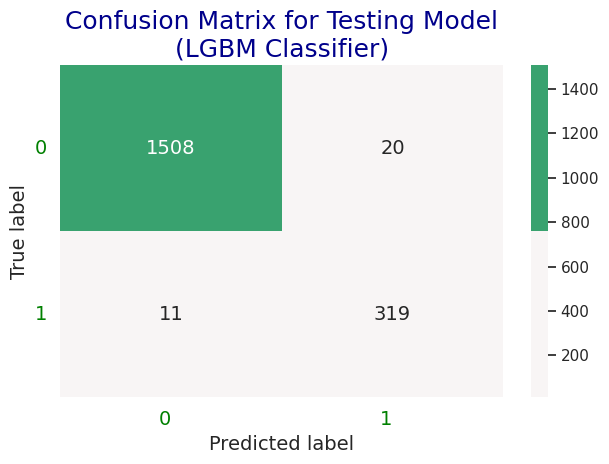

In [131]:
custom_palette = sns.color_palette(['#F8F5F5', '#39A26F'])

# Form confusion matrix as a DataFrame Logistic Regression
y_test_pred = lgbm_clf.predict(X_test)
cm_df_log = pd.DataFrame(confusion_matrix(y_test, y_test_pred))

# Plot Confusion Matrix Cat Boost Classifier
plt.figure()
heatmap = sns.heatmap(cm_df_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap=custom_palette)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14, color='green')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14, color='green')

plt.title('Confusion Matrix for Testing Model\n(LGBM Classifier)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [132]:
results_lgbm = lgbm_clf.evals_result_
results_lgbm

{'training': OrderedDict([('binary_logloss',
               [0.6064948422646291,
                0.5348045238574842,
                0.47518572277969795,
                0.42436773934749056,
                0.3805062200521576,
                0.3428046418365224,
                0.3098113613771484,
                0.2808057816072522,
                0.2550478681909631,
                0.2322485074941952,
                0.21156584253784683,
                0.19310863067369632,
                0.17713929002729728,
                0.1626976573137226,
                0.1497539461277938,
                0.1380488855945042,
                0.1273213391250778,
                0.117889244152203,
                0.10897014244562622,
                0.10094774459408774,
                0.09339234467793756,
                0.08657333210911226,
                0.08032579419973648,
                0.0745526120183164,
                0.06948994328975816,
                0.06479852230453614,
        

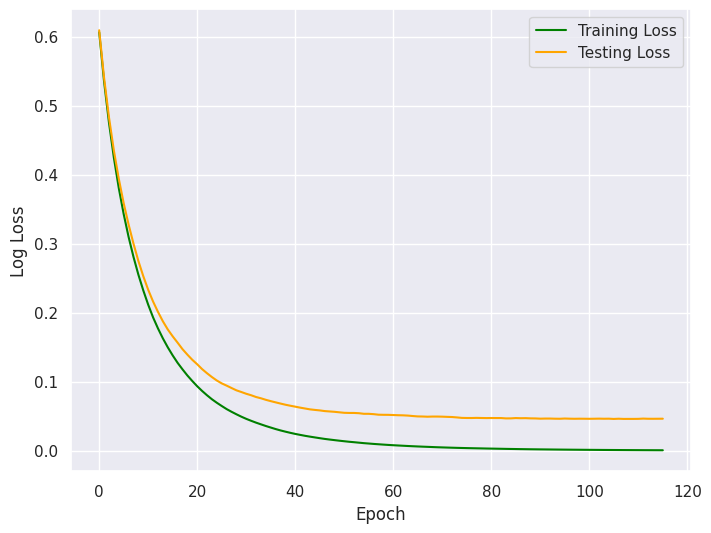

In [133]:
# Plot the training and validation loss over time
train_loss = results_lgbm['training']['binary_logloss']
test_loss = results_lgbm['valid_1']['binary_logloss']
epochs = len(train_loss)

fig, ax = plt.subplots(figsize=(8, 6), facecolor='none')
plt.plot(range(epochs), train_loss, label='Training Loss', color='green')
plt.plot(range(epochs), test_loss, label='Testing Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

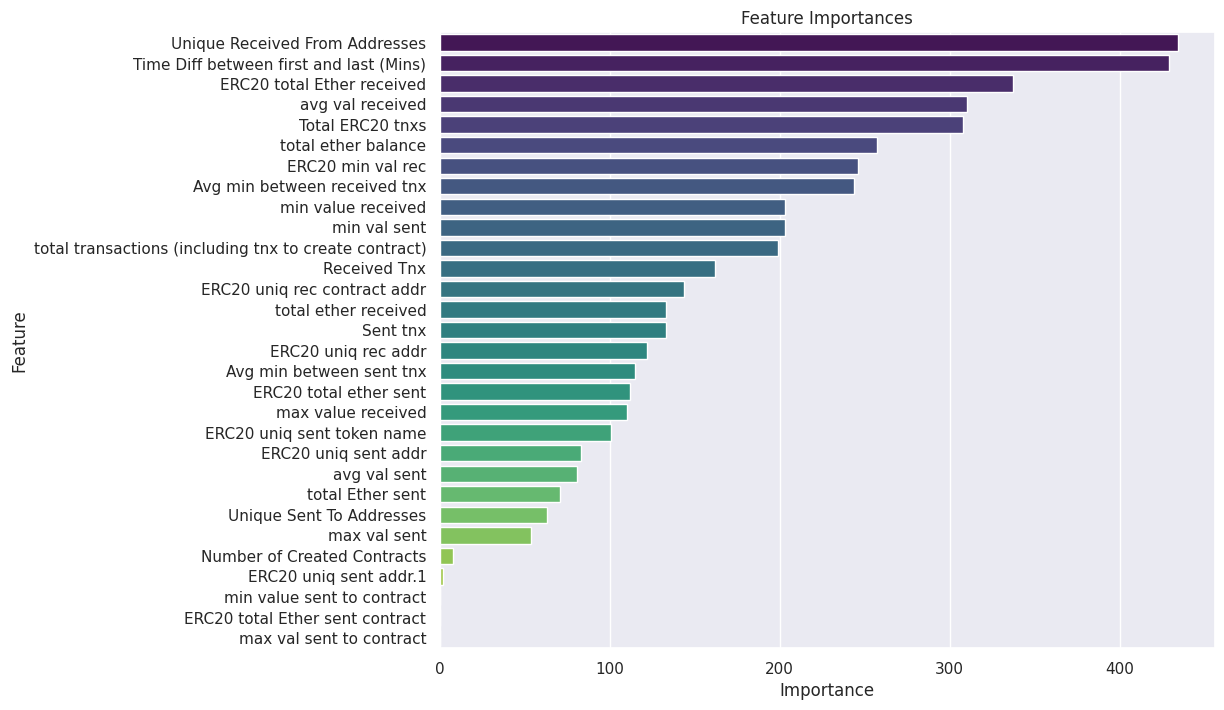

In [134]:
import lightgbm as lgb
# train model
#lgb_clf = lgb.LGBMClassifier(random_state=42)
#lgb_clf.fit(X_train, y_train)

# calculate feature importance
importances = lgbm_clf.feature_importances_

# plot feature importance
importances_df = pd.DataFrame({'feature': X.columns, 'importance': importances})
importances_df = importances_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=importances_df, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [135]:
importances_df

feature  importance
6                      Unique Received From Addresses         434
2             Time Diff between first and last (Mins)         429
21                         ERC20 total Ether received         337
10                                   avg val received         310
20                                   Total ERC20 tnxs         308
19                                total ether balance         257
28                                  ERC20 min val rec         246
1                        Avg min between received tnx         244
8                                  min value received         203
11                                       min val sent         203
16  total transactions (including tnx to create co...         199
4                                        Received Tnx         162
27                       ERC20 uniq rec contract addr         144
18                               total ether received         133
3                                            Sent tnx         133
25                                ERC20 uniq rec addr         122
0                            Avg min between sent tnx         115
22                             ERC20 total ether sent         112
9                                  max value received         110
29                         ERC20 uniq sent token name         101
24                               ERC20 uniq sent addr          83
13                                       avg val sent          81
17                                   total Ether sent          71
7                            Unique Sent To Addresses          63
12                                       max val sent          54
5                         Number of Created Contracts           8
26                             ERC20 uniq sent addr.1           2
14                         min value sent to contract           0
23                    ERC20 total Ether sent contract           0
15                           max val sent to contract           0

####Cat Boost Classifier

In [136]:
%%time
# Define the estimator/model (Cat Boosting Classifier) with parameters tuning
catboost_params = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 8], 'iterations': [500, 1000]}
catboost_grid = GridSearchCV(CatBoostClassifier(verbose=False), catboost_params, cv=skf, scoring='recall')

# Fit and train the classifier and get the training history
catboost_grid.fit(X_train_res, y_train_res, eval_set=(X_test, y_test), early_stopping_rounds=10)

# Catboost best estimator
cat_clf = catboost_grid.best_estimator_

# Print best parameters and score
print('Best parameters:', catboost_grid.best_params_)
print('Best score:', catboost_grid.best_score_)

# Instantiate the models
cb_score = cross_val_score(cat_clf, X, y, cv=skf, scoring='recall')

# Print the cross-validation scores (overfitting case)
print('Cat Boost cross-validation scores:', cb_score)
print('Mean score:', np.mean(cb_score))

# Evaluate the model on the test data
score = cat_clf.score(X_test, y_test)
print(f'Score: {score:.4f}')

Best parameters: {'depth': 8, 'iterations': 1000, 'learning_rate': 0.03}
Best score: 0.9931198518955757
Cat Boost cross-validation scores: [0.96969697 0.95757576 0.92771084 0.93975904 0.92771084 0.96385542
 0.95180723 0.91566265 0.96969697 0.94545455]
Mean score: 0.9468930266520627
Score: 0.9865
CPU times: user 22min 15s, sys: 1min 7s, total: 23min 22s
Wall time: 13min 33s


In [137]:
evaluate(cat_clf, X_test, y_test, X_train_res, y_train_res)

======= Data Train =======
Accuracy Data Train: 0.9999180865006553
AUC Data Train: 0.9999180865006554
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6104
           1       1.00      1.00      1.00      6104

    accuracy                           1.00     12208
   macro avg       1.00      1.00      1.00     12208
weighted avg       1.00      1.00      1.00     12208

------
Assuming 1 as positive, we get for Data Train:

True Positive: 6104
True Negative: 6103
False Positive: 1
False Negative: 0

Precision Data Train: 0.9998361998361999
Recall Data Train: 1.0
F1-Score Data Train: 0.9999180932099272

======= Data Test =======
Accuracy Data Test: 0.9865446716899893
AUC Data Test: 0.9799401078851341
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1528
           1       0.96      0.97      0.96       330

    accu

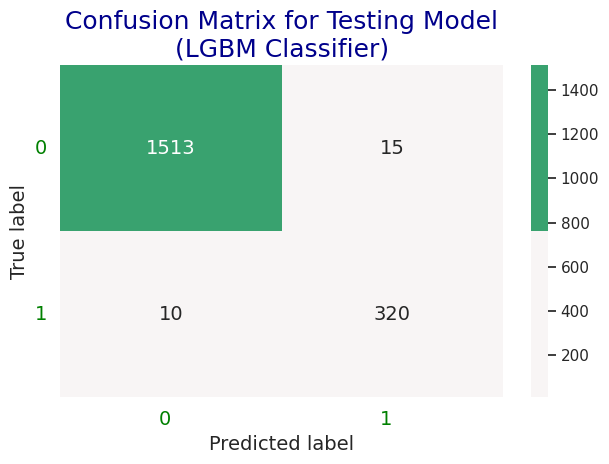

In [144]:
custom_palette = sns.color_palette(['#F8F5F5', '#39A26F'])

# Form confusion matrix as a DataFrame Logistic Regression
y_test_pred = cat_clf.predict(X_test)
cm_df_log = pd.DataFrame(confusion_matrix(y_test, y_test_pred))

# Plot Confusion Matrix Cat Boost Classifier
plt.figure()
heatmap = sns.heatmap(cm_df_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap=custom_palette)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14, color='green')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14, color='green')

plt.title('Confusion Matrix for Testing Model\n(LGBM Classifier)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [145]:
results_catboost = cat_clf.evals_result_
results_catboost

{'learn': {'Logloss': [0.6349459706877663,
   0.5816631792100979,
   0.5402887226869676,
   0.49627549557667106,
   0.45772745474919113,
   0.4226546981231569,
   0.3969987541788684,
   0.37037746684423123,
   0.34360702134678595,
   0.32138483489950237,
   0.30072792423193295,
   0.28348295279286634,
   0.2681623586352187,
   0.25576249268858026,
   0.2420017247431244,
   0.22855080220833673,
   0.21864840806233618,
   0.20857794725410592,
   0.19940940486962955,
   0.1908909908909629,
   0.18450283785478785,
   0.17738441277300235,
   0.17165454749511078,
   0.16448082680158502,
   0.15957904580692475,
   0.15446984127339655,
   0.1494522494694821,
   0.1451545555344728,
   0.14174722594014938,
   0.13735565445526243,
   0.1340763896977136,
   0.13057851728886796,
   0.1281971212764555,
   0.12445497825292585,
   0.12190168588220839,
   0.11892055246495638,
   0.11643861943116195,
   0.11343155307194822,
   0.11166443331057248,
   0.10946841758638035,
   0.10760060581592244,
   0.105

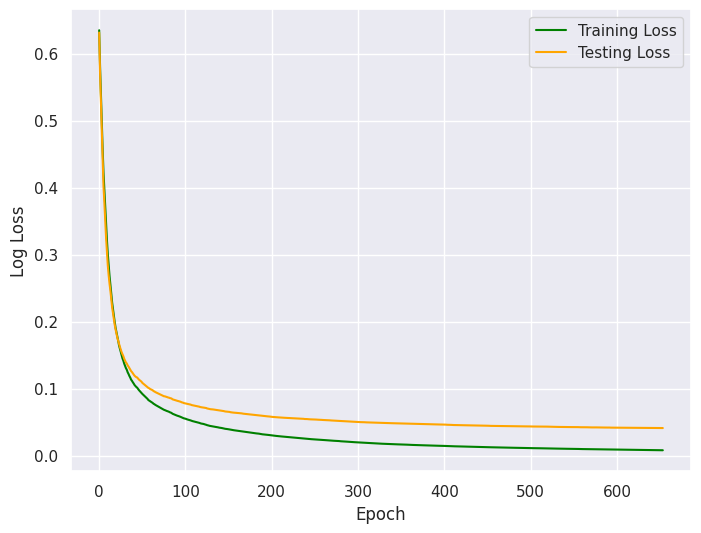

In [148]:
# Plot the training and validation loss over time
train_loss = results_catboost['learn']['Logloss']
test_loss = results_catboost['validation']['Logloss']
epochs = len(train_loss)

fig, ax = plt.subplots(figsize=(8, 6), facecolor='none')
plt.plot(range(epochs), train_loss, label='Training Loss', color='green')
plt.plot(range(epochs), test_loss, label='Testing Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

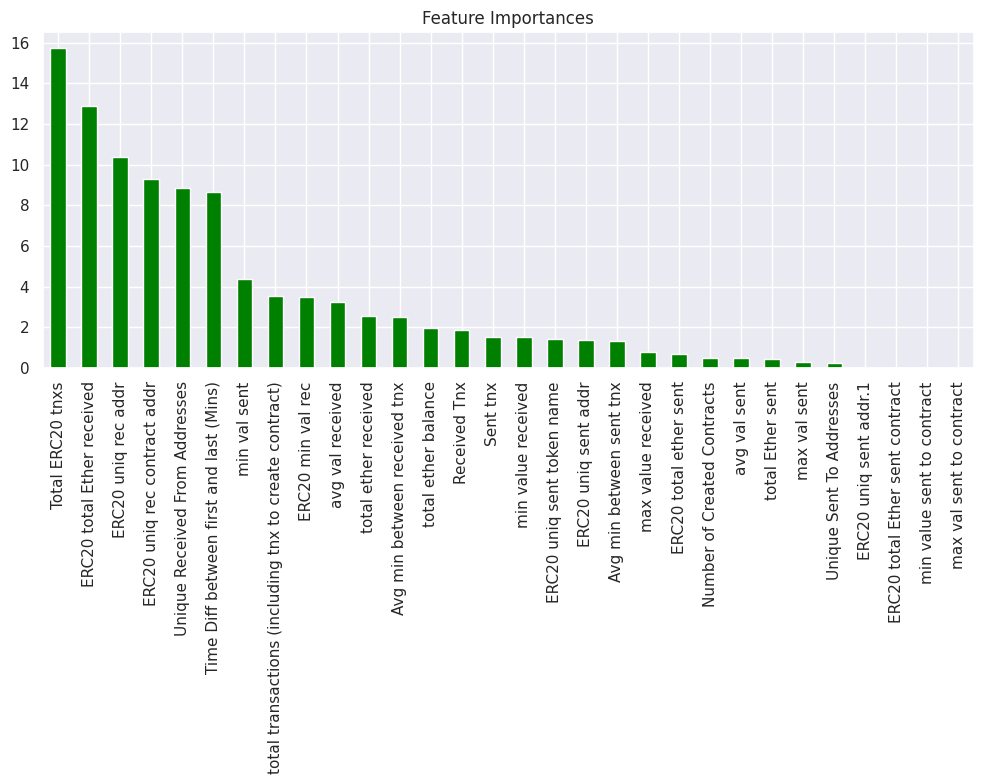

In [138]:
from sklearn.inspection import permutation_importance

importances = catboost_grid.best_estimator_.feature_importances_

fig, ax = plt.subplots(figsize=(10, 8))

list_independent_variables = X.columns
cat_importances = pd.Series(importances, index=list_independent_variables).sort_values(ascending=False)

cat_importances.plot.bar(ax=ax, color='green')
ax.set_title("Feature Importances")
fig.tight_layout()
plt.show()

In [139]:
cat_importances

Total ERC20 tnxs                                         15.717185
ERC20 total Ether received                               12.869034
ERC20 uniq rec addr                                      10.369836
ERC20 uniq rec contract addr                              9.315803
Unique Received From Addresses                            8.828536
Time Diff between first and last (Mins)                   8.675663
min val sent                                              4.365888
total transactions (including tnx to create contract)     3.548950
ERC20 min val rec                                         3.498737
avg val received                                          3.234101
total ether received                                      2.573648
Avg min between received tnx                              2.533968
total ether balance                                       1.971093
Received Tnx                                              1.860358
Sent tnx                                                  1.53

###After Normalization

####Logistic Regression

In [140]:
# Define the estimator/model (Logistic Regression) with parameters tuning
log_reg_params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg_normal = GridSearchCV(LogisticRegression(), log_reg_params, cv=skf)

# Fit and train the classifier and get the training history
grid_log_reg_normal.fit(X_train_res_normal, y_train_res_normal)

# We automatically get the logistic regression with the best parameters
log_reg_normal = grid_log_reg_normal.best_estimator_

# Instantiate the models
log_reg_score = cross_val_score(log_reg_normal, X_over_normal, y_over_normal, cv=skf,)

# Print the cross-validation scores (overfitting case)
print('Logistic Regression cross-validation scores:', log_reg_score)
print('Mean score:', np.mean(log_reg_score))

# Evaluate the model on the test data
score = log_reg_normal.score(X_test_normal, y_test_normal)
print(f'Score: {score:.4f}')

Logistic Regression cross-validation scores: [0.82238967 0.82238967 0.82131324 0.82131324 0.82131324 0.82131324
 0.82131324 0.82131324 0.82219828 0.82219828]
Mean score: 0.8217055324598197
Score: 0.8224


In [141]:
evaluate(grid_log_reg_normal, X_test_normal, y_test_normal, X_train_res_normal, y_train_res_normal)

======= Data Train =======
Accuracy Data Train: 0.5
AUC Data Train: 0.5
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      6104
           1       0.00      0.00      0.00      6104

    accuracy                           0.50     12208
   macro avg       0.25      0.50      0.33     12208
weighted avg       0.25      0.50      0.33     12208

------
Assuming 1 as positive, we get for Data Train:

True Positive: 0
True Negative: 6104
False Positive: 0
False Negative: 6104

Precision Data Train: nan
Recall Data Train: 0.0
F1-Score Data Train: nan

======= Data Test =======
Accuracy Data Test: 0.8223896663078579
AUC Data Test: 0.5
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1528
           1       0.00      0.00      0.00       330

    accuracy                           0.82      1858
   macro avg       0.41      

####K-NN

In [142]:
# Define the estimator/model (K-NN) with parameters tuning
knears_params = {'n_neighbors': list(range(2,8,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears_normal = GridSearchCV(KNeighborsClassifier(), knears_params, cv=skf)

# Fit and train the classifier and get the training history
grid_knears_normal.fit(X_train_res_normal, y_train_res_normal)

# KNears best estimator
knears_neighbors_normal = grid_knears_normal.best_estimator_

# Instantiate the models
knn_score = cross_val_score(knears_neighbors_normal, X_over_normal, y_over_normal, cv=skf)

# Print the cross-validation scores (overfitting case)
print('K-NN cross-validation scores:', knn_score)
print('Mean score:', np.mean(knn_score))

# Evaluate the model on the test data
score = knears_neighbors_normal.score(X_test_normal, y_test_normal)
print(f'Score: {score:.4f}')

K-NN cross-validation scores: [0.97416577 0.96878364 0.96555436 0.96447793 0.96555436 0.96770721
 0.96770721 0.96124865 0.96982759 0.96767241]
Mean score: 0.9672699138858988
Score: 0.9682


In [143]:
evaluate(grid_knears_normal, X_test_normal, y_test_normal, X_train_res_normal, y_train_res_normal)

======= Data Train =======
Accuracy Data Train: 0.9878768020969856
AUC Data Train: 0.9878768020969856
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6104
           1       1.00      0.98      0.99      6104

    accuracy                           0.99     12208
   macro avg       0.99      0.99      0.99     12208
weighted avg       0.99      0.99      0.99     12208

------
Assuming 1 as positive, we get for Data Train:

True Positive: 5956
True Negative: 6104
False Positive: 0
False Negative: 148

Precision Data Train: 1.0
Recall Data Train: 0.9757536041939712
F1-Score Data Train: 0.9877280265339967

======= Data Test =======
Accuracy Data Test: 0.9682454251883746
AUC Data Test: 0.9319887355227668
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1528
           1       0.94      0.88      0.91       330

    ac